<a href="https://colab.research.google.com/github/Kallikrates/DSP_AT2/blob/master/10930194_AT1B_Book.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **AT1B TF Keras Multi-Class CNN**

**Version Summary**



1.   Original model. Unoptimised and built with little research. Baseline hyperparameters.
2.   New block architecture, including more efficient maxpooling. Baseline hyperparameters.
3.   Including intermediate layer activation visualisations.
Baseline hyperparameters.
4. Introduced data cleansing to see difference in results.
5. Tuned train_datagen parameters.
5. Added Part B models.
7. Added enhanced combined model and tuned remaining parameters.



# **Preprocessing**

## **Set up environment**

In [ ]:
# Colab TensorFlow version
%tensorflow_version 2.x

# Data packages
import tensorflow as tf
import pandas as pd      
import numpy as np  
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from PIL import Image
import pickle
import os
import os, random

# sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Set Random seeds
np.random.seed(42)
RandomState = 42
tf.random.set_seed(42)

# TensorFlow packages
from tensorflow.keras.preprocessing.image import ImageDataGenerator, DirectoryIterator

## **Get data**

Download Data set using Kaggle API. Tried mounting G drive and other methods, but this was the fastest download time by far. 

In [ ]:
# Create data directory
if not os.path.exists('/content/kaggle'):
    os.makedirs('/content/kaggle')
    
# Download data from Kaggle API, unzip and place in data directory
os.environ['KAGGLE_USERNAME'] = "kallikrates"
os.environ['KAGGLE_KEY'] = "69527d340a19ff438eb94fd2563f82b6"
!kaggle datasets download -d kallikrates/at1b-smaller-fashion-dataset
!unzip -q at1b-smaller-fashion-dataset.zip -d /content/kaggle

 97% 252M/259M [00:04<00:00, 45.5MB/s]
100% 259M/259M [00:04<00:00, 62.7MB/s]


###**Look at uploaded file**

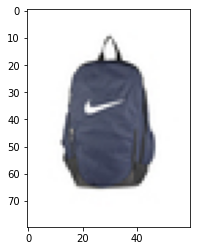

In [ ]:
file = '/content/kaggle/trn/trn/Accessories_Bags_Backpacks/15272.jpg'
image = mpimg.imread(file)
plt.imshow(image)
plt.show()

## **Cleanse Data**

From viewing the data, there were some misclassified images both in the training and test set. The following section places these back into their correct categories. Also, some imgages with no category and superflous categories are deleted.

### **Training Set**

In [ ]:
# Delete Files - no categories exist for them
!rm '/content/kaggle/trn/trn/Footwear_Shoes_Sports Shoes/5364.jpg' # No gumboot or boot category
!rm '/content/kaggle/trn/trn/Apparel_Topwear_Tops/58519.jpg' # No collar or non-earring jewellery category
!rm '/content/kaggle/trn/trn/Footwear_Shoes_Flats/15486.jpg' # No collar or non-earring jewellery category
!rm '/content/kaggle/trn/trn/Footwear_Shoes_Flats/15488.jpg' # No collar or non-earring jewellery category

# Move Files from incorrect to correct category
!mv '/content/kaggle/trn/trn/Apparel_Topwear_Tshirts/31225.jpg' '/content/kaggle/trn/trn/Apparel_Innerwear_Briefs'
!mv '/content/kaggle/trn/trn/Apparel_Topwear_Tshirts/31236.jpg' '/content/kaggle/trn/trn/Apparel_Innerwear_Briefs'
!mv '/content/kaggle/trn/trn/Apparel_Topwear_Tshirts/31284.jpg' '/content/kaggle/trn/trn/Apparel_Innerwear_Briefs'
!mv '/content/kaggle/trn/trn/Accessories_Headwear_Caps/4451.jpg' '/content/kaggle/trn/trn/Apparel_Topwear_Jackets'
!mv '/content/kaggle/trn/trn/Accessories_Wallets_Wallets/21810.jpg' '/content/kaggle/trn/trn/Footwear_Shoes_Formal Shoes'
!mv '/content/kaggle/trn/trn/Apparel_Topwear_Jackets/3323.jpg' '/content/kaggle/trn/trn/Apparel_Topwear_Tshirts'
!mv '/content/kaggle/trn/trn/Footwear_Shoes_Casual Shoes/3653.jpg' '/content/kaggle/trn/trn/Apparel_Topwear_Sweatshirts'
!mv '/content/kaggle/trn/trn/Footwear_Shoes_Casual Shoes/4282.jpg' '/content/kaggle/trn/trn/Apparel_Dress_Dresses'
!mv '/content/kaggle/trn/trn/Footwear_Shoes_Casual Shoes/5289.jpg' '/content/kaggle/trn/trn/Apparel_Topwear_Jackets'
!mv '/content/kaggle/trn/trn/Footwear_Shoes_Formal Shoes/7217.jpg' '/content/kaggle/trn/trn/Apparel_Topwear_Tops'
!mv '/content/kaggle/trn/trn/Footwear_Shoes_Sports Shoes/24459.jpg' '/content/kaggle/trn/trn/Apparel_Innerwear_Briefs'
!mv '/content/kaggle/trn/trn/Accessories_Bags_Backpacks/1790.jpg' '/content/kaggle/trn/trn/Apparel_Topwear_Tops'
!mv '/content/kaggle/trn/trn/Accessories_Bags_Backpacks/6125.jpg' '/content/kaggle/trn/trn/Apparel_Topwear_Tshirts'
!mv '/content/kaggle/trn/trn/Accessories_Bags_Backpacks/8217.jpg' '/content/kaggle/trn/trn/Apparel_Topwear_Tshirts'
!mv '/content/kaggle/trn/trn/Footwear_Flip Flops_Flip Flops/10804.jpg' '/content/kaggle/trn/trn/Apparel_Topwear_Shirts'
!mv '/content/kaggle/trn/trn/Apparel_Topwear_Tshirts/3440.jpg' '/content/kaggle/trn/trn/Apparel_Bottomwear_Track Pants'
!mv '/content/kaggle/trn/trn/Apparel_Topwear_Tshirts/1966.jpg' '/content/kaggle/trn/trn/Apparel_Innerwear_Innerwear Vests'
!mv '/content/kaggle/trn/trn/Apparel_Topwear_Tshirts/2179.jpg' '/content/kaggle/trn/trn/Apparel_Bottomwear_Jeans'
!mv '/content/kaggle/trn/trn/Apparel_Topwear_Tshirts/3446.jpg' '/content/kaggle/trn/trn/Apparel_Dress_Dresses'

# Move Files to better-suited, or more-specific category
!mv '/content/kaggle/trn/trn/Footwear_Flip Flops_Flip Flops/47091.jpg' '/content/kaggle/trn/trn/Footwear_Shoes_Casual Shoes'
!mv '/content/kaggle/trn/trn/Footwear_Flip Flops_Flip Flops/47095.jpg' '/content/kaggle/trn/trn/Footwear_Shoes_Casual Shoes'
!mv '/content/kaggle/trn/trn/Footwear_Shoes_Heels/2633.jpg' '/content/kaggle/trn/trn/Footwear_Shoes_Formal Shoes'
!mv '/content/kaggle/trn/trn/Footwear_Shoes_Heels/6302.jpg' '/content/kaggle/trn/trn/Footwear_Shoes_Formal Shoes'
!mv '/content/kaggle/trn/trn/Apparel_Topwear_Tshirts/1757.jpg' '/content/kaggle/trn/trn/Apparel_Topwear_Sweaters'
!mv '/content/kaggle/trn/trn/Apparel_Topwear_Tshirts/2154.jpg' '/content/kaggle/trn/trn/Apparel_Topwear_Sweatshirts'
!mv '/content/kaggle/trn/trn/Apparel_Topwear_Tshirts/2155.jpg' '/content/kaggle/trn/trn/Apparel_Topwear_Sweatshirts'
!mv '/content/kaggle/trn/trn/Apparel_Topwear_Tshirts/19167.jpg' '/content/kaggle/trn/trn/Apparel_Topwear_Sweatshirts'
!mv '/content/kaggle/trn/trn/Apparel_Topwear_Tshirts/19163.jpg' '/content/kaggle/trn/trn/Apparel_Topwear_Sweatshirts'
!mv '/content/kaggle/trn/trn/Apparel_Topwear_Tshirts/19161.jpg' '/content/kaggle/trn/trn/Apparel_Topwear_Sweatshirts'
!mv '/content/kaggle/trn/trn/Apparel_Topwear_Tshirts/19172.jpg' '/content/kaggle/trn/trn/Apparel_Topwear_Sweatshirts'
!mv '/content/kaggle/trn/trn/Apparel_Topwear_Tshirts/19558.jpg' '/content/kaggle/trn/trn/Apparel_Topwear_Sweatshirts'
!mv '/content/kaggle/trn/trn/Apparel_Topwear_Tshirts/19559.jpg' '/content/kaggle/trn/trn/Apparel_Topwear_Sweatshirts'
!mv '/content/kaggle/trn/trn/Apparel_Topwear_Tshirts/19584.jpg' '/content/kaggle/trn/trn/Apparel_Topwear_Sweatshirts'
!mv '/content/kaggle/trn/trn/Apparel_Topwear_Tshirts/19595.jpg' '/content/kaggle/trn/trn/Apparel_Topwear_Sweatshirts'
!mv '/content/kaggle/trn/trn/Apparel_Topwear_Tshirts/19603.jpg' '/content/kaggle/trn/trn/Apparel_Topwear_Sweatshirts'
!mv '/content/kaggle/trn/trn/Apparel_Topwear_Tshirts/19605.jpg' '/content/kaggle/trn/trn/Apparel_Topwear_Sweatshirts'
!mv '/content/kaggle/trn/trn/Apparel_Topwear_Tshirts/19630.jpg' '/content/kaggle/trn/trn/Apparel_Topwear_Sweatshirts'
!mv '/content/kaggle/trn/trn/Apparel_Topwear_Tshirts/19633.jpg' '/content/kaggle/trn/trn/Apparel_Topwear_Sweatshirts'
!mv '/content/kaggle/trn/trn/Apparel_Topwear_Tshirts/19664.jpg' '/content/kaggle/trn/trn/Apparel_Topwear_Sweatshirts'
!mv '/content/kaggle/trn/trn/Apparel_Topwear_Tshirts/19795.jpg' '/content/kaggle/trn/trn/Apparel_Topwear_Sweatshirts'
!mv '/content/kaggle/trn/trn/Apparel_Topwear_Tshirts/19796.jpg' '/content/kaggle/trn/trn/Apparel_Topwear_Sweatshirts'
!mv '/content/kaggle/trn/trn/Apparel_Topwear_Tshirts/19999.jpg' '/content/kaggle/trn/trn/Apparel_Topwear_Sweatshirts'
!mv '/content/kaggle/trn/trn/Apparel_Topwear_Tshirts/20000.jpg' '/content/kaggle/trn/trn/Apparel_Topwear_Sweatshirts'
!mv '/content/kaggle/trn/trn/Apparel_Topwear_Tshirts/20003.jpg' '/content/kaggle/trn/trn/Apparel_Topwear_Sweatshirts'
!mv '/content/kaggle/trn/trn/Apparel_Topwear_Tshirts/20190.jpg' '/content/kaggle/trn/trn/Apparel_Topwear_Sweatshirts'
!mv '/content/kaggle/trn/trn/Apparel_Topwear_Tshirts/20191.jpg' '/content/kaggle/trn/trn/Apparel_Topwear_Sweatshirts'
!mv '/content/kaggle/trn/trn/Apparel_Topwear_Tshirts/20192.jpg' '/content/kaggle/trn/trn/Apparel_Topwear_Sweatshirts'
!mv '/content/kaggle/trn/trn/Apparel_Topwear_Tshirts/20195.jpg' '/content/kaggle/trn/trn/Apparel_Topwear_Sweatshirts'
!mv '/content/kaggle/trn/trn/Apparel_Topwear_Tshirts/20200.jpg' '/content/kaggle/trn/trn/Apparel_Topwear_Sweatshirts'
!mv '/content/kaggle/trn/trn/Apparel_Topwear_Tshirts/20358.jpg' '/content/kaggle/trn/trn/Apparel_Topwear_Sweatshirts'
!mv '/content/kaggle/trn/trn/Apparel_Topwear_Tshirts/21375.jpg' '/content/kaggle/trn/trn/Apparel_Topwear_Sweatshirts'
!mv '/content/kaggle/trn/trn/Apparel_Topwear_Tshirts/21833.jpg' '/content/kaggle/trn/trn/Apparel_Topwear_Sweatshirts'
!mv '/content/kaggle/trn/trn/Apparel_Topwear_Tshirts/22324.jpg' '/content/kaggle/trn/trn/Apparel_Topwear_Sweatshirts'
!mv '/content/kaggle/trn/trn/Apparel_Topwear_Tshirts/22325.jpg' '/content/kaggle/trn/trn/Apparel_Topwear_Sweatshirts'
!mv '/content/kaggle/trn/trn/Apparel_Topwear_Tshirts/22344.jpg' '/content/kaggle/trn/trn/Apparel_Topwear_Sweatshirts'
!mv '/content/kaggle/trn/trn/Apparel_Topwear_Tshirts/22345.jpg' '/content/kaggle/trn/trn/Apparel_Topwear_Sweatshirts'
!mv '/content/kaggle/trn/trn/Apparel_Topwear_Tshirts/23129.jpg' '/content/kaggle/trn/trn/Apparel_Topwear_Sweatshirts'
!mv '/content/kaggle/trn/trn/Apparel_Topwear_Tshirts/24040.jpg' '/content/kaggle/trn/trn/Apparel_Topwear_Sweatshirts'
!mv '/content/kaggle/trn/trn/Apparel_Topwear_Tshirts/24053.jpg' '/content/kaggle/trn/trn/Apparel_Topwear_Sweatshirts'
!mv '/content/kaggle/trn/trn/Apparel_Topwear_Tshirts/24273.jpg' '/content/kaggle/trn/trn/Apparel_Topwear_Sweatshirts'
!mv '/content/kaggle/trn/trn/Apparel_Topwear_Tshirts/24275.jpg' '/content/kaggle/trn/trn/Apparel_Topwear_Sweatshirts'
!mv '/content/kaggle/trn/trn/Apparel_Topwear_Tshirts/24270.jpg' '/content/kaggle/trn/trn/Apparel_Topwear_Shirts'
!mv '/content/kaggle/trn/trn/Apparel_Topwear_Tshirts/1670.jpg' '/content/kaggle/trn/trn/Apparel_Topwear_Tops'
!mv '/content/kaggle/trn/trn/Apparel_Topwear_Tshirts/3445.jpg' '/content/kaggle/trn/trn/Apparel_Topwear_Tops'
!mv '/content/kaggle/trn/trn/Apparel_Topwear_Tshirts/3571.jpg' '/content/kaggle/trn/trn/Apparel_Topwear_Tops'
!mv '/content/kaggle/trn/trn/Apparel_Topwear_Tshirts/4265.jpg' '/content/kaggle/trn/trn/Apparel_Topwear_Tops'
!mv '/content/kaggle/trn/trn/Apparel_Dress_Dresses/58494.jpg' '/content/kaggle/trn/trn/Apparel_Saree_Sarees'
!mv '/content/kaggle/trn/trn/Footwear_Shoes_Heels/2882.jpg' '/content/kaggle/trn/trn/Footwear_Shoes_Flats'
!mv '/content/kaggle/trn/trn/Footwear_Shoes_Heels/11517.jpg' '/content/kaggle/trn/trn/Footwear_Shoes_Flats'
!mv '/content/kaggle/trn/trn/Footwear_Shoes_Heels/14368.jpg' '/content/kaggle/trn/trn/Footwear_Shoes_Flats'
!mv '/content/kaggle/trn/trn/Footwear_Shoes_Heels/14453.jpg' '/content/kaggle/trn/trn/Footwear_Shoes_Flats'
!mv '/content/kaggle/trn/trn/Footwear_Shoes_Heels/19041.jpg' '/content/kaggle/trn/trn/Footwear_Shoes_Flats'
!mv '/content/kaggle/trn/trn/Footwear_Shoes_Heels/19042.jpg' '/content/kaggle/trn/trn/Footwear_Shoes_Flats'
!mv '/content/kaggle/trn/trn/Footwear_Shoes_Heels/20900.jpg' '/content/kaggle/trn/trn/Footwear_Shoes_Flats'
!mv '/content/kaggle/trn/trn/Footwear_Shoes_Heels/21387.jpg' '/content/kaggle/trn/trn/Footwear_Shoes_Flats'
!mv '/content/kaggle/trn/trn/Footwear_Shoes_Heels/33520.jpg' '/content/kaggle/trn/trn/Footwear_Shoes_Flats'
!mv '/content/kaggle/trn/trn/Footwear_Shoes_Heels/33521.jpg' '/content/kaggle/trn/trn/Footwear_Shoes_Flats'
!mv '/content/kaggle/trn/trn/Footwear_Shoes_Heels/33522.jpg' '/content/kaggle/trn/trn/Footwear_Shoes_Flats'
!mv '/content/kaggle/trn/trn/Footwear_Shoes_Heels/34075.jpg' '/content/kaggle/trn/trn/Footwear_Shoes_Flats'
!mv '/content/kaggle/trn/trn/Footwear_Shoes_Heels/35819.jpg' '/content/kaggle/trn/trn/Footwear_Shoes_Flats'
!mv '/content/kaggle/trn/trn/Footwear_Shoes_Heels/35820.jpg' '/content/kaggle/trn/trn/Footwear_Shoes_Flats'
!mv '/content/kaggle/trn/trn/Footwear_Shoes_Heels/39204.jpg' '/content/kaggle/trn/trn/Footwear_Shoes_Flats'
!mv '/content/kaggle/trn/trn/Footwear_Shoes_Heels/39576.jpg' '/content/kaggle/trn/trn/Footwear_Shoes_Flats'
!mv '/content/kaggle/trn/trn/Footwear_Shoes_Heels/39579.jpg' '/content/kaggle/trn/trn/Footwear_Shoes_Flats'
!mv '/content/kaggle/trn/trn/Footwear_Shoes_Heels/39597.jpg' '/content/kaggle/trn/trn/Footwear_Shoes_Flats'
!mv '/content/kaggle/trn/trn/Footwear_Shoes_Heels/47580.jpg' '/content/kaggle/trn/trn/Footwear_Shoes_Flats'
!mv '/content/kaggle/trn/trn/Footwear_Shoes_Heels/49601.jpg' '/content/kaggle/trn/trn/Footwear_Shoes_Flats'
!mv '/content/kaggle/trn/trn/Footwear_Shoes_Heels/50145.jpg' '/content/kaggle/trn/trn/Footwear_Shoes_Flats'
!mv '/content/kaggle/trn/trn/Footwear_Shoes_Heels/50146.jpg' '/content/kaggle/trn/trn/Footwear_Shoes_Flats'
!mv '/content/kaggle/trn/trn/Footwear_Shoes_Heels/50151.jpg' '/content/kaggle/trn/trn/Footwear_Shoes_Flats'
!mv '/content/kaggle/trn/trn/Footwear_Shoes_Heels/51750.jpg' '/content/kaggle/trn/trn/Footwear_Shoes_Flats'
!mv '/content/kaggle/trn/trn/Footwear_Shoes_Heels/56865.jpg' '/content/kaggle/trn/trn/Footwear_Shoes_Flats'
!mv '/content/kaggle/trn/trn/Footwear_Shoes_Heels/2610.jpg' '/content/kaggle/trn/trn/Footwear_Sandal_Sandals'
!mv '/content/kaggle/trn/trn/Footwear_Shoes_Heels/2611.jpg' '/content/kaggle/trn/trn/Footwear_Sandal_Sandals'
!mv '/content/kaggle/trn/trn/Footwear_Shoes_Heels/2872.jpg' '/content/kaggle/trn/trn/Footwear_Sandal_Sandals'
!mv '/content/kaggle/trn/trn/Footwear_Shoes_Heels/2878.jpg' '/content/kaggle/trn/trn/Footwear_Sandal_Sandals'
!mv '/content/kaggle/trn/trn/Footwear_Shoes_Heels/2885.jpg' '/content/kaggle/trn/trn/Footwear_Sandal_Sandals'
!mv '/content/kaggle/trn/trn/Footwear_Shoes_Heels/2892.jpg' '/content/kaggle/trn/trn/Footwear_Sandal_Sandals'
!mv '/content/kaggle/trn/trn/Footwear_Shoes_Heels/2893.jpg' '/content/kaggle/trn/trn/Footwear_Sandal_Sandals'
!mv '/content/kaggle/trn/trn/Footwear_Shoes_Heels/2894.jpg' '/content/kaggle/trn/trn/Footwear_Sandal_Sandals'
!mv '/content/kaggle/trn/trn/Footwear_Shoes_Heels/3139.jpg' '/content/kaggle/trn/trn/Footwear_Sandal_Sandals'
!mv '/content/kaggle/trn/trn/Footwear_Shoes_Heels/3140.jpg' '/content/kaggle/trn/trn/Footwear_Sandal_Sandals'
!mv '/content/kaggle/trn/trn/Footwear_Shoes_Heels/3141.jpg' '/content/kaggle/trn/trn/Footwear_Sandal_Sandals'
!mv '/content/kaggle/trn/trn/Footwear_Shoes_Heels/6308.jpg' '/content/kaggle/trn/trn/Footwear_Sandal_Sandals'
!mv '/content/kaggle/trn/trn/Footwear_Shoes_Heels/6334.jpg' '/content/kaggle/trn/trn/Footwear_Sandal_Sandals'
!mv '/content/kaggle/trn/trn/Footwear_Shoes_Heels/8175.jpg' '/content/kaggle/trn/trn/Footwear_Sandal_Sandals'
!mv '/content/kaggle/trn/trn/Footwear_Shoes_Heels/11496.jpg' '/content/kaggle/trn/trn/Footwear_Sandal_Sandals'
!mv '/content/kaggle/trn/trn/Footwear_Shoes_Heels/11499.jpg' '/content/kaggle/trn/trn/Footwear_Sandal_Sandals'
!mv '/content/kaggle/trn/trn/Footwear_Shoes_Heels/11503.jpg' '/content/kaggle/trn/trn/Footwear_Sandal_Sandals'
!mv '/content/kaggle/trn/trn/Footwear_Shoes_Heels/11505.jpg' '/content/kaggle/trn/trn/Footwear_Sandal_Sandals'
!mv '/content/kaggle/trn/trn/Footwear_Shoes_Heels/11506.jpg' '/content/kaggle/trn/trn/Footwear_Sandal_Sandals'
!mv '/content/kaggle/trn/trn/Footwear_Shoes_Heels/11507.jpg' '/content/kaggle/trn/trn/Footwear_Sandal_Sandals'
!mv '/content/kaggle/trn/trn/Footwear_Shoes_Heels/11513.jpg' '/content/kaggle/trn/trn/Footwear_Sandal_Sandals'
!mv '/content/kaggle/trn/trn/Footwear_Shoes_Heels/12999.jpg' '/content/kaggle/trn/trn/Footwear_Sandal_Sandals'
!mv '/content/kaggle/trn/trn/Footwear_Shoes_Heels/13018.jpg' '/content/kaggle/trn/trn/Footwear_Sandal_Sandals'
!mv '/content/kaggle/trn/trn/Footwear_Shoes_Heels/13143.jpg' '/content/kaggle/trn/trn/Footwear_Sandal_Sandals'
!mv '/content/kaggle/trn/trn/Footwear_Shoes_Heels/13280.jpg' '/content/kaggle/trn/trn/Footwear_Sandal_Sandals'
!mv '/content/kaggle/trn/trn/Footwear_Shoes_Heels/13539.jpg' '/content/kaggle/trn/trn/Footwear_Sandal_Sandals'
!mv '/content/kaggle/trn/trn/Footwear_Shoes_Heels/13551.jpg' '/content/kaggle/trn/trn/Footwear_Sandal_Sandals'
!mv '/content/kaggle/trn/trn/Footwear_Shoes_Heels/13559.jpg' '/content/kaggle/trn/trn/Footwear_Sandal_Sandals'
!mv '/content/kaggle/trn/trn/Footwear_Shoes_Heels/13562.jpg' '/content/kaggle/trn/trn/Footwear_Sandal_Sandals'
!mv '/content/kaggle/trn/trn/Footwear_Shoes_Heels/13644.jpg' '/content/kaggle/trn/trn/Footwear_Sandal_Sandals'
!mv '/content/kaggle/trn/trn/Footwear_Shoes_Heels/14348.jpg' '/content/kaggle/trn/trn/Footwear_Sandal_Sandals'
!mv '/content/kaggle/trn/trn/Footwear_Shoes_Heels/14349.jpg' '/content/kaggle/trn/trn/Footwear_Sandal_Sandals'
!mv '/content/kaggle/trn/trn/Footwear_Shoes_Heels/14350.jpg' '/content/kaggle/trn/trn/Footwear_Sandal_Sandals'
!mv '/content/kaggle/trn/trn/Footwear_Shoes_Heels/14354.jpg' '/content/kaggle/trn/trn/Footwear_Sandal_Sandals'
!mv '/content/kaggle/trn/trn/Footwear_Shoes_Heels/14356.jpg' '/content/kaggle/trn/trn/Footwear_Sandal_Sandals'
!mv '/content/kaggle/trn/trn/Footwear_Shoes_Heels/14357.jpg' '/content/kaggle/trn/trn/Footwear_Sandal_Sandals'
!mv '/content/kaggle/trn/trn/Footwear_Shoes_Heels/14360.jpg' '/content/kaggle/trn/trn/Footwear_Sandal_Sandals'
!mv '/content/kaggle/trn/trn/Footwear_Shoes_Heels/14362.jpg' '/content/kaggle/trn/trn/Footwear_Sandal_Sandals'
!mv '/content/kaggle/trn/trn/Footwear_Shoes_Heels/14363.jpg' '/content/kaggle/trn/trn/Footwear_Sandal_Sandals'
!mv '/content/kaggle/trn/trn/Footwear_Shoes_Heels/14370.jpg' '/content/kaggle/trn/trn/Footwear_Sandal_Sandals'
!mv '/content/kaggle/trn/trn/Footwear_Shoes_Heels/14371.jpg' '/content/kaggle/trn/trn/Footwear_Sandal_Sandals'
!mv '/content/kaggle/trn/trn/Footwear_Shoes_Heels/14373.jpg' '/content/kaggle/trn/trn/Footwear_Sandal_Sandals'
!mv '/content/kaggle/trn/trn/Footwear_Shoes_Heels/14374.jpg' '/content/kaggle/trn/trn/Footwear_Sandal_Sandals'
!mv '/content/kaggle/trn/trn/Footwear_Shoes_Heels/14375.jpg' '/content/kaggle/trn/trn/Footwear_Sandal_Sandals'
!mv '/content/kaggle/trn/trn/Footwear_Shoes_Heels/14378.jpg' '/content/kaggle/trn/trn/Footwear_Sandal_Sandals'
!mv '/content/kaggle/trn/trn/Footwear_Shoes_Heels/14384.jpg' '/content/kaggle/trn/trn/Footwear_Sandal_Sandals'
!mv '/content/kaggle/trn/trn/Footwear_Shoes_Heels/14386.jpg' '/content/kaggle/trn/trn/Footwear_Sandal_Sandals'
!mv '/content/kaggle/trn/trn/Footwear_Shoes_Heels/14387.jpg' '/content/kaggle/trn/trn/Footwear_Sandal_Sandals'
!mv '/content/kaggle/trn/trn/Footwear_Shoes_Heels/14395.jpg' '/content/kaggle/trn/trn/Footwear_Sandal_Sandals'
!mv '/content/kaggle/trn/trn/Footwear_Shoes_Heels/14408.jpg' '/content/kaggle/trn/trn/Footwear_Sandal_Sandals'
!mv '/content/kaggle/trn/trn/Footwear_Shoes_Heels/14410.jpg' '/content/kaggle/trn/trn/Footwear_Sandal_Sandals'
!mv '/content/kaggle/trn/trn/Footwear_Shoes_Heels/14414.jpg' '/content/kaggle/trn/trn/Footwear_Sandal_Sandals'
!mv '/content/kaggle/trn/trn/Footwear_Shoes_Heels/14419.jpg' '/content/kaggle/trn/trn/Footwear_Sandal_Sandals'
!mv '/content/kaggle/trn/trn/Footwear_Shoes_Heels/14425.jpg' '/content/kaggle/trn/trn/Footwear_Sandal_Sandals'
!mv '/content/kaggle/trn/trn/Footwear_Shoes_Heels/14431.jpg' '/content/kaggle/trn/trn/Footwear_Sandal_Sandals'
!mv '/content/kaggle/trn/trn/Footwear_Shoes_Heels/14433.jpg' '/content/kaggle/trn/trn/Footwear_Sandal_Sandals'
!mv '/content/kaggle/trn/trn/Footwear_Shoes_Heels/14441.jpg' '/content/kaggle/trn/trn/Footwear_Sandal_Sandals'
!mv '/content/kaggle/trn/trn/Footwear_Shoes_Heels/14451.jpg' '/content/kaggle/trn/trn/Footwear_Sandal_Sandals'
!mv '/content/kaggle/trn/trn/Footwear_Shoes_Heels/14452.jpg' '/content/kaggle/trn/trn/Footwear_Sandal_Sandals'
!mv '/content/kaggle/trn/trn/Footwear_Shoes_Heels/14470.jpg' '/content/kaggle/trn/trn/Footwear_Sandal_Sandals'
!mv '/content/kaggle/trn/trn/Footwear_Shoes_Heels/14477.jpg' '/content/kaggle/trn/trn/Footwear_Sandal_Sandals'
!mv '/content/kaggle/trn/trn/Footwear_Shoes_Heels/14478.jpg' '/content/kaggle/trn/trn/Footwear_Sandal_Sandals'
!mv '/content/kaggle/trn/trn/Footwear_Shoes_Heels/15511.jpg' '/content/kaggle/trn/trn/Footwear_Sandal_Sandals'
!mv '/content/kaggle/trn/trn/Footwear_Shoes_Heels/15524.jpg' '/content/kaggle/trn/trn/Footwear_Sandal_Sandals'
!mv '/content/kaggle/trn/trn/Footwear_Shoes_Heels/15525.jpg' '/content/kaggle/trn/trn/Footwear_Sandal_Sandals'
!mv '/content/kaggle/trn/trn/Footwear_Shoes_Heels/15526.jpg' '/content/kaggle/trn/trn/Footwear_Sandal_Sandals'
!mv '/content/kaggle/trn/trn/Footwear_Shoes_Heels/15542.jpg' '/content/kaggle/trn/trn/Footwear_Sandal_Sandals'
!mv '/content/kaggle/trn/trn/Footwear_Shoes_Heels/15545.jpg' '/content/kaggle/trn/trn/Footwear_Sandal_Sandals'
!mv '/content/kaggle/trn/trn/Footwear_Shoes_Heels/15564.jpg' '/content/kaggle/trn/trn/Footwear_Sandal_Sandals'
!mv '/content/kaggle/trn/trn/Footwear_Shoes_Heels/15568.jpg' '/content/kaggle/trn/trn/Footwear_Sandal_Sandals'
!mv '/content/kaggle/trn/trn/Footwear_Shoes_Heels/15569.jpg' '/content/kaggle/trn/trn/Footwear_Sandal_Sandals'
!mv '/content/kaggle/trn/trn/Footwear_Shoes_Heels/15700.jpg' '/content/kaggle/trn/trn/Footwear_Sandal_Sandals'
!mv '/content/kaggle/trn/trn/Footwear_Shoes_Heels/17490.jpg' '/content/kaggle/trn/trn/Footwear_Sandal_Sandals'
!mv '/content/kaggle/trn/trn/Footwear_Shoes_Heels/17677.jpg' '/content/kaggle/trn/trn/Footwear_Sandal_Sandals'
!mv '/content/kaggle/trn/trn/Footwear_Shoes_Heels/17679.jpg' '/content/kaggle/trn/trn/Footwear_Sandal_Sandals'
!mv '/content/kaggle/trn/trn/Footwear_Shoes_Heels/17689.jpg' '/content/kaggle/trn/trn/Footwear_Sandal_Sandals'
!mv '/content/kaggle/trn/trn/Footwear_Shoes_Heels/18559.jpg' '/content/kaggle/trn/trn/Footwear_Sandal_Sandals'
!mv '/content/kaggle/trn/trn/Footwear_Shoes_Heels/18560.jpg' '/content/kaggle/trn/trn/Footwear_Sandal_Sandals'
!mv '/content/kaggle/trn/trn/Footwear_Shoes_Heels/18765.jpg' '/content/kaggle/trn/trn/Footwear_Sandal_Sandals'
!mv '/content/kaggle/trn/trn/Footwear_Shoes_Heels/19018.jpg' '/content/kaggle/trn/trn/Footwear_Sandal_Sandals'
!mv '/content/kaggle/trn/trn/Footwear_Shoes_Heels/19022.jpg' '/content/kaggle/trn/trn/Footwear_Sandal_Sandals'
!mv '/content/kaggle/trn/trn/Footwear_Shoes_Heels/19034.jpg' '/content/kaggle/trn/trn/Footwear_Sandal_Sandals'
!mv '/content/kaggle/trn/trn/Footwear_Shoes_Heels/19035.jpg' '/content/kaggle/trn/trn/Footwear_Sandal_Sandals'
!mv '/content/kaggle/trn/trn/Footwear_Shoes_Heels/19043.jpg' '/content/kaggle/trn/trn/Footwear_Sandal_Sandals'
!mv '/content/kaggle/trn/trn/Footwear_Shoes_Heels/19049.jpg' '/content/kaggle/trn/trn/Footwear_Sandal_Sandals'
!mv '/content/kaggle/trn/trn/Footwear_Shoes_Heels/19052.jpg' '/content/kaggle/trn/trn/Footwear_Sandal_Sandals'
!mv '/content/kaggle/trn/trn/Footwear_Shoes_Heels/20265.jpg' '/content/kaggle/trn/trn/Footwear_Sandal_Sandals'
!mv '/content/kaggle/trn/trn/Footwear_Shoes_Heels/20272.jpg' '/content/kaggle/trn/trn/Footwear_Sandal_Sandals'
!mv '/content/kaggle/trn/trn/Footwear_Shoes_Heels/20274.jpg' '/content/kaggle/trn/trn/Footwear_Sandal_Sandals'
!mv '/content/kaggle/trn/trn/Footwear_Shoes_Heels/20275.jpg' '/content/kaggle/trn/trn/Footwear_Sandal_Sandals'
!mv '/content/kaggle/trn/trn/Footwear_Shoes_Heels/20276.jpg' '/content/kaggle/trn/trn/Footwear_Sandal_Sandals'
!mv '/content/kaggle/trn/trn/Footwear_Shoes_Heels/20277.jpg' '/content/kaggle/trn/trn/Footwear_Sandal_Sandals'
!mv '/content/kaggle/trn/trn/Footwear_Shoes_Heels/20278.jpg' '/content/kaggle/trn/trn/Footwear_Sandal_Sandals'
!mv '/content/kaggle/trn/trn/Footwear_Shoes_Heels/20281.jpg' '/content/kaggle/trn/trn/Footwear_Sandal_Sandals'
!mv '/content/kaggle/trn/trn/Footwear_Shoes_Heels/20898.jpg' '/content/kaggle/trn/trn/Footwear_Sandal_Sandals'
!mv '/content/kaggle/trn/trn/Footwear_Shoes_Heels/21047.jpg' '/content/kaggle/trn/trn/Footwear_Sandal_Sandals'
!mv '/content/kaggle/trn/trn/Footwear_Shoes_Heels/21721.jpg' '/content/kaggle/trn/trn/Footwear_Sandal_Sandals'
!mv '/content/kaggle/trn/trn/Footwear_Shoes_Heels/22255.jpg' '/content/kaggle/trn/trn/Footwear_Sandal_Sandals'
!mv '/content/kaggle/trn/trn/Footwear_Shoes_Heels/22260.jpg' '/content/kaggle/trn/trn/Footwear_Sandal_Sandals'
!mv '/content/kaggle/trn/trn/Footwear_Shoes_Heels/22262.jpg' '/content/kaggle/trn/trn/Footwear_Sandal_Sandals'
!mv '/content/kaggle/trn/trn/Footwear_Shoes_Heels/22263.jpg' '/content/kaggle/trn/trn/Footwear_Sandal_Sandals'
!mv '/content/kaggle/trn/trn/Footwear_Shoes_Heels/22264.jpg' '/content/kaggle/trn/trn/Footwear_Sandal_Sandals'
!mv '/content/kaggle/trn/trn/Footwear_Shoes_Heels/22273.jpg' '/content/kaggle/trn/trn/Footwear_Sandal_Sandals'
!mv '/content/kaggle/trn/trn/Footwear_Shoes_Heels/22274.jpg' '/content/kaggle/trn/trn/Footwear_Sandal_Sandals'
!mv '/content/kaggle/trn/trn/Footwear_Shoes_Heels/22294.jpg' '/content/kaggle/trn/trn/Footwear_Sandal_Sandals'
!mv '/content/kaggle/trn/trn/Footwear_Shoes_Heels/22295.jpg' '/content/kaggle/trn/trn/Footwear_Sandal_Sandals'
!mv '/content/kaggle/trn/trn/Footwear_Shoes_Heels/22306.jpg' '/content/kaggle/trn/trn/Footwear_Sandal_Sandals'
!mv '/content/kaggle/trn/trn/Footwear_Shoes_Heels/22307.jpg' '/content/kaggle/trn/trn/Footwear_Sandal_Sandals'
!mv '/content/kaggle/trn/trn/Footwear_Shoes_Heels/22310.jpg' '/content/kaggle/trn/trn/Footwear_Sandal_Sandals'
!mv '/content/kaggle/trn/trn/Footwear_Shoes_Heels/22502.jpg' '/content/kaggle/trn/trn/Footwear_Sandal_Sandals'
!mv '/content/kaggle/trn/trn/Footwear_Shoes_Heels/22539.jpg' '/content/kaggle/trn/trn/Footwear_Sandal_Sandals'
!mv '/content/kaggle/trn/trn/Footwear_Shoes_Heels/22540.jpg' '/content/kaggle/trn/trn/Footwear_Sandal_Sandals'
!mv '/content/kaggle/trn/trn/Footwear_Shoes_Heels/22544.jpg' '/content/kaggle/trn/trn/Footwear_Sandal_Sandals'
!mv '/content/kaggle/trn/trn/Footwear_Shoes_Heels/23832.jpg' '/content/kaggle/trn/trn/Footwear_Sandal_Sandals'
!mv '/content/kaggle/trn/trn/Footwear_Shoes_Heels/24084.jpg' '/content/kaggle/trn/trn/Footwear_Sandal_Sandals'
!mv '/content/kaggle/trn/trn/Footwear_Shoes_Heels/27080.jpg' '/content/kaggle/trn/trn/Footwear_Sandal_Sandals'
!mv '/content/kaggle/trn/trn/Footwear_Shoes_Heels/27081.jpg' '/content/kaggle/trn/trn/Footwear_Sandal_Sandals'
!mv '/content/kaggle/trn/trn/Footwear_Shoes_Heels/27084.jpg' '/content/kaggle/trn/trn/Footwear_Sandal_Sandals'
!mv '/content/kaggle/trn/trn/Footwear_Shoes_Heels/27193.jpg' '/content/kaggle/trn/trn/Footwear_Sandal_Sandals'
!mv '/content/kaggle/trn/trn/Footwear_Shoes_Heels/27194.jpg' '/content/kaggle/trn/trn/Footwear_Sandal_Sandals'
!mv '/content/kaggle/trn/trn/Footwear_Shoes_Heels/29121.jpg' '/content/kaggle/trn/trn/Footwear_Sandal_Sandals'
!mv '/content/kaggle/trn/trn/Footwear_Shoes_Heels/32824.jpg' '/content/kaggle/trn/trn/Footwear_Sandal_Sandals'
!mv '/content/kaggle/trn/trn/Footwear_Shoes_Heels/32826.jpg' '/content/kaggle/trn/trn/Footwear_Sandal_Sandals'
!mv '/content/kaggle/trn/trn/Footwear_Shoes_Heels/32828.jpg' '/content/kaggle/trn/trn/Footwear_Sandal_Sandals'
!mv '/content/kaggle/trn/trn/Footwear_Shoes_Heels/32840.jpg' '/content/kaggle/trn/trn/Footwear_Sandal_Sandals'
!mv '/content/kaggle/trn/trn/Footwear_Shoes_Heels/32841.jpg' '/content/kaggle/trn/trn/Footwear_Sandal_Sandals'
!mv '/content/kaggle/trn/trn/Footwear_Shoes_Heels/32844.jpg' '/content/kaggle/trn/trn/Footwear_Sandal_Sandals'
!mv '/content/kaggle/trn/trn/Footwear_Shoes_Heels/32846.jpg' '/content/kaggle/trn/trn/Footwear_Sandal_Sandals'
!mv '/content/kaggle/trn/trn/Footwear_Shoes_Heels/32849.jpg' '/content/kaggle/trn/trn/Footwear_Sandal_Sandals'
!mv '/content/kaggle/trn/trn/Footwear_Shoes_Heels/32850.jpg' '/content/kaggle/trn/trn/Footwear_Sandal_Sandals'
!mv '/content/kaggle/trn/trn/Footwear_Shoes_Heels/32857.jpg' '/content/kaggle/trn/trn/Footwear_Sandal_Sandals'
!mv '/content/kaggle/trn/trn/Footwear_Shoes_Heels/32859.jpg' '/content/kaggle/trn/trn/Footwear_Sandal_Sandals'
!mv '/content/kaggle/trn/trn/Footwear_Shoes_Heels/33087.jpg' '/content/kaggle/trn/trn/Footwear_Sandal_Sandals'
!mv '/content/kaggle/trn/trn/Footwear_Shoes_Heels/33088.jpg' '/content/kaggle/trn/trn/Footwear_Sandal_Sandals'
!mv '/content/kaggle/trn/trn/Footwear_Shoes_Heels/33090.jpg' '/content/kaggle/trn/trn/Footwear_Sandal_Sandals'
!mv '/content/kaggle/trn/trn/Footwear_Shoes_Heels/33091.jpg' '/content/kaggle/trn/trn/Footwear_Sandal_Sandals'
!mv '/content/kaggle/trn/trn/Footwear_Shoes_Heels/33092.jpg' '/content/kaggle/trn/trn/Footwear_Sandal_Sandals'
!mv '/content/kaggle/trn/trn/Footwear_Shoes_Heels/33094.jpg' '/content/kaggle/trn/trn/Footwear_Sandal_Sandals'
!mv '/content/kaggle/trn/trn/Footwear_Shoes_Heels/33098.jpg' '/content/kaggle/trn/trn/Footwear_Sandal_Sandals'
!mv '/content/kaggle/trn/trn/Footwear_Shoes_Heels/33099.jpg' '/content/kaggle/trn/trn/Footwear_Sandal_Sandals'
!mv '/content/kaggle/trn/trn/Footwear_Shoes_Heels/33102.jpg' '/content/kaggle/trn/trn/Footwear_Sandal_Sandals'
!mv '/content/kaggle/trn/trn/Footwear_Shoes_Heels/33104.jpg' '/content/kaggle/trn/trn/Footwear_Sandal_Sandals'
!mv '/content/kaggle/trn/trn/Footwear_Shoes_Heels/33105.jpg' '/content/kaggle/trn/trn/Footwear_Sandal_Sandals'
!mv '/content/kaggle/trn/trn/Footwear_Shoes_Heels/33116.jpg' '/content/kaggle/trn/trn/Footwear_Sandal_Sandals'
!mv '/content/kaggle/trn/trn/Footwear_Shoes_Heels/35360.jpg' '/content/kaggle/trn/trn/Footwear_Sandal_Sandals'
!mv '/content/kaggle/trn/trn/Footwear_Shoes_Heels/35362.jpg' '/content/kaggle/trn/trn/Footwear_Sandal_Sandals'
!mv '/content/kaggle/trn/trn/Footwear_Shoes_Heels/35363.jpg' '/content/kaggle/trn/trn/Footwear_Sandal_Sandals'
!mv '/content/kaggle/trn/trn/Footwear_Shoes_Heels/35378.jpg' '/content/kaggle/trn/trn/Footwear_Sandal_Sandals'
!mv '/content/kaggle/trn/trn/Footwear_Shoes_Heels/35468.jpg' '/content/kaggle/trn/trn/Footwear_Sandal_Sandals'
!mv '/content/kaggle/trn/trn/Footwear_Shoes_Heels/35469.jpg' '/content/kaggle/trn/trn/Footwear_Sandal_Sandals'
!mv '/content/kaggle/trn/trn/Footwear_Shoes_Heels/35474.jpg' '/content/kaggle/trn/trn/Footwear_Sandal_Sandals'
!mv '/content/kaggle/trn/trn/Footwear_Shoes_Heels/35783.jpg' '/content/kaggle/trn/trn/Footwear_Sandal_Sandals'
!mv '/content/kaggle/trn/trn/Footwear_Shoes_Heels/35797.jpg' '/content/kaggle/trn/trn/Footwear_Sandal_Sandals'
!mv '/content/kaggle/trn/trn/Footwear_Shoes_Heels/35798.jpg' '/content/kaggle/trn/trn/Footwear_Sandal_Sandals'
!mv '/content/kaggle/trn/trn/Footwear_Shoes_Heels/35801.jpg' '/content/kaggle/trn/trn/Footwear_Sandal_Sandals'
!mv '/content/kaggle/trn/trn/Footwear_Shoes_Heels/35803.jpg' '/content/kaggle/trn/trn/Footwear_Sandal_Sandals'
!mv '/content/kaggle/trn/trn/Footwear_Shoes_Heels/35808.jpg' '/content/kaggle/trn/trn/Footwear_Sandal_Sandals'
!mv '/content/kaggle/trn/trn/Footwear_Shoes_Heels/35809.jpg' '/content/kaggle/trn/trn/Footwear_Sandal_Sandals'
!mv '/content/kaggle/trn/trn/Footwear_Shoes_Heels/35811.jpg' '/content/kaggle/trn/trn/Footwear_Sandal_Sandals'
!mv '/content/kaggle/trn/trn/Footwear_Shoes_Heels/36617.jpg' '/content/kaggle/trn/trn/Footwear_Sandal_Sandals'
!mv '/content/kaggle/trn/trn/Footwear_Shoes_Heels/36619.jpg' '/content/kaggle/trn/trn/Footwear_Sandal_Sandals'
!mv '/content/kaggle/trn/trn/Footwear_Shoes_Heels/36620.jpg' '/content/kaggle/trn/trn/Footwear_Sandal_Sandals'
!mv '/content/kaggle/trn/trn/Footwear_Shoes_Heels/36621.jpg' '/content/kaggle/trn/trn/Footwear_Sandal_Sandals'
!mv '/content/kaggle/trn/trn/Footwear_Shoes_Heels/37963.jpg' '/content/kaggle/trn/trn/Footwear_Sandal_Sandals'
!mv '/content/kaggle/trn/trn/Footwear_Shoes_Heels/37964.jpg' '/content/kaggle/trn/trn/Footwear_Sandal_Sandals'
!mv '/content/kaggle/trn/trn/Footwear_Shoes_Heels/37966.jpg' '/content/kaggle/trn/trn/Footwear_Sandal_Sandals'
!mv '/content/kaggle/trn/trn/Footwear_Shoes_Heels/37967.jpg' '/content/kaggle/trn/trn/Footwear_Sandal_Sandals'
!mv '/content/kaggle/trn/trn/Footwear_Shoes_Heels/37968.jpg' '/content/kaggle/trn/trn/Footwear_Sandal_Sandals'
!mv '/content/kaggle/trn/trn/Footwear_Shoes_Heels/39192.jpg' '/content/kaggle/trn/trn/Footwear_Sandal_Sandals'
!mv '/content/kaggle/trn/trn/Footwear_Shoes_Heels/39193.jpg' '/content/kaggle/trn/trn/Footwear_Sandal_Sandals'
!mv '/content/kaggle/trn/trn/Footwear_Shoes_Heels/39196.jpg' '/content/kaggle/trn/trn/Footwear_Sandal_Sandals'
!mv '/content/kaggle/trn/trn/Footwear_Shoes_Heels/39197.jpg' '/content/kaggle/trn/trn/Footwear_Sandal_Sandals'
!mv '/content/kaggle/trn/trn/Footwear_Shoes_Heels/39198.jpg' '/content/kaggle/trn/trn/Footwear_Sandal_Sandals'
!mv '/content/kaggle/trn/trn/Footwear_Shoes_Heels/39201.jpg' '/content/kaggle/trn/trn/Footwear_Sandal_Sandals'
!mv '/content/kaggle/trn/trn/Footwear_Shoes_Heels/39205.jpg' '/content/kaggle/trn/trn/Footwear_Sandal_Sandals'
!mv '/content/kaggle/trn/trn/Footwear_Shoes_Heels/39565.jpg' '/content/kaggle/trn/trn/Footwear_Sandal_Sandals'
!mv '/content/kaggle/trn/trn/Footwear_Shoes_Heels/39566.jpg' '/content/kaggle/trn/trn/Footwear_Sandal_Sandals'
!mv '/content/kaggle/trn/trn/Footwear_Shoes_Heels/39567.jpg' '/content/kaggle/trn/trn/Footwear_Sandal_Sandals'
!mv '/content/kaggle/trn/trn/Footwear_Shoes_Heels/39569.jpg' '/content/kaggle/trn/trn/Footwear_Sandal_Sandals'
!mv '/content/kaggle/trn/trn/Footwear_Shoes_Heels/39571.jpg' '/content/kaggle/trn/trn/Footwear_Sandal_Sandals'
!mv '/content/kaggle/trn/trn/Footwear_Shoes_Heels/39580.jpg' '/content/kaggle/trn/trn/Footwear_Sandal_Sandals'
!mv '/content/kaggle/trn/trn/Footwear_Shoes_Heels/39581.jpg' '/content/kaggle/trn/trn/Footwear_Sandal_Sandals'
!mv '/content/kaggle/trn/trn/Footwear_Shoes_Heels/39583.jpg' '/content/kaggle/trn/trn/Footwear_Sandal_Sandals'
!mv '/content/kaggle/trn/trn/Footwear_Shoes_Heels/39587.jpg' '/content/kaggle/trn/trn/Footwear_Sandal_Sandals'
!mv '/content/kaggle/trn/trn/Footwear_Shoes_Heels/39598.jpg' '/content/kaggle/trn/trn/Footwear_Sandal_Sandals'
!mv '/content/kaggle/trn/trn/Footwear_Shoes_Heels/39868.jpg' '/content/kaggle/trn/trn/Footwear_Sandal_Sandals'
!mv '/content/kaggle/trn/trn/Footwear_Shoes_Heels/39869.jpg' '/content/kaggle/trn/trn/Footwear_Sandal_Sandals'
!mv '/content/kaggle/trn/trn/Footwear_Shoes_Heels/39870.jpg' '/content/kaggle/trn/trn/Footwear_Sandal_Sandals'
!mv '/content/kaggle/trn/trn/Footwear_Shoes_Heels/41675.jpg' '/content/kaggle/trn/trn/Footwear_Sandal_Sandals'
!mv '/content/kaggle/trn/trn/Footwear_Shoes_Heels/41718.jpg' '/content/kaggle/trn/trn/Footwear_Sandal_Sandals'
!mv '/content/kaggle/trn/trn/Footwear_Shoes_Heels/41719.jpg' '/content/kaggle/trn/trn/Footwear_Sandal_Sandals'
!mv '/content/kaggle/trn/trn/Footwear_Shoes_Heels/45800.jpg' '/content/kaggle/trn/trn/Footwear_Sandal_Sandals'
!mv '/content/kaggle/trn/trn/Footwear_Shoes_Heels/45802.jpg' '/content/kaggle/trn/trn/Footwear_Sandal_Sandals'
!mv '/content/kaggle/trn/trn/Footwear_Shoes_Heels/45803.jpg' '/content/kaggle/trn/trn/Footwear_Sandal_Sandals'
!mv '/content/kaggle/trn/trn/Footwear_Shoes_Heels/45809.jpg' '/content/kaggle/trn/trn/Footwear_Sandal_Sandals'
!mv '/content/kaggle/trn/trn/Footwear_Shoes_Heels/45810.jpg' '/content/kaggle/trn/trn/Footwear_Sandal_Sandals'
!mv '/content/kaggle/trn/trn/Footwear_Shoes_Heels/45815.jpg' '/content/kaggle/trn/trn/Footwear_Sandal_Sandals'
!mv '/content/kaggle/trn/trn/Footwear_Shoes_Heels/45816.jpg' '/content/kaggle/trn/trn/Footwear_Sandal_Sandals'
!mv '/content/kaggle/trn/trn/Footwear_Shoes_Heels/45817.jpg' '/content/kaggle/trn/trn/Footwear_Sandal_Sandals'
!mv '/content/kaggle/trn/trn/Footwear_Shoes_Heels/45821.jpg' '/content/kaggle/trn/trn/Footwear_Sandal_Sandals'
!mv '/content/kaggle/trn/trn/Footwear_Shoes_Heels/45822.jpg' '/content/kaggle/trn/trn/Footwear_Sandal_Sandals'
!mv '/content/kaggle/trn/trn/Footwear_Shoes_Heels/45825.jpg' '/content/kaggle/trn/trn/Footwear_Sandal_Sandals'
!mv '/content/kaggle/trn/trn/Footwear_Shoes_Heels/45826.jpg' '/content/kaggle/trn/trn/Footwear_Sandal_Sandals'
!mv '/content/kaggle/trn/trn/Footwear_Shoes_Heels/45829.jpg' '/content/kaggle/trn/trn/Footwear_Sandal_Sandals'
!mv '/content/kaggle/trn/trn/Footwear_Shoes_Heels/46582.jpg' '/content/kaggle/trn/trn/Footwear_Sandal_Sandals'
!mv '/content/kaggle/trn/trn/Footwear_Shoes_Heels/46584.jpg' '/content/kaggle/trn/trn/Footwear_Sandal_Sandals'
!mv '/content/kaggle/trn/trn/Footwear_Shoes_Heels/46585.jpg' '/content/kaggle/trn/trn/Footwear_Sandal_Sandals'
!mv '/content/kaggle/trn/trn/Footwear_Shoes_Heels/46586.jpg' '/content/kaggle/trn/trn/Footwear_Sandal_Sandals'
!mv '/content/kaggle/trn/trn/Footwear_Shoes_Heels/46587.jpg' '/content/kaggle/trn/trn/Footwear_Sandal_Sandals'
!mv '/content/kaggle/trn/trn/Footwear_Shoes_Heels/46589.jpg' '/content/kaggle/trn/trn/Footwear_Sandal_Sandals'
!mv '/content/kaggle/trn/trn/Footwear_Shoes_Heels/46594.jpg' '/content/kaggle/trn/trn/Footwear_Sandal_Sandals'
!mv '/content/kaggle/trn/trn/Footwear_Shoes_Heels/46595.jpg' '/content/kaggle/trn/trn/Footwear_Sandal_Sandals'
!mv '/content/kaggle/trn/trn/Footwear_Shoes_Heels/46596.jpg' '/content/kaggle/trn/trn/Footwear_Sandal_Sandals'
!mv '/content/kaggle/trn/trn/Footwear_Shoes_Heels/46600.jpg' '/content/kaggle/trn/trn/Footwear_Sandal_Sandals'
!mv '/content/kaggle/trn/trn/Footwear_Shoes_Heels/46610.jpg' '/content/kaggle/trn/trn/Footwear_Sandal_Sandals'
!mv '/content/kaggle/trn/trn/Footwear_Shoes_Heels/46619.jpg' '/content/kaggle/trn/trn/Footwear_Sandal_Sandals'
!mv '/content/kaggle/trn/trn/Footwear_Shoes_Heels/46620.jpg' '/content/kaggle/trn/trn/Footwear_Sandal_Sandals'
!mv '/content/kaggle/trn/trn/Footwear_Shoes_Heels/46819.jpg' '/content/kaggle/trn/trn/Footwear_Sandal_Sandals'
!mv '/content/kaggle/trn/trn/Footwear_Shoes_Heels/46828.jpg' '/content/kaggle/trn/trn/Footwear_Sandal_Sandals'
!mv '/content/kaggle/trn/trn/Footwear_Shoes_Heels/47548.jpg' '/content/kaggle/trn/trn/Footwear_Sandal_Sandals'
!mv '/content/kaggle/trn/trn/Footwear_Shoes_Heels/47549.jpg' '/content/kaggle/trn/trn/Footwear_Sandal_Sandals'
!mv '/content/kaggle/trn/trn/Footwear_Shoes_Heels/47550.jpg' '/content/kaggle/trn/trn/Footwear_Sandal_Sandals'
!mv '/content/kaggle/trn/trn/Footwear_Shoes_Heels/47559.jpg' '/content/kaggle/trn/trn/Footwear_Sandal_Sandals'
!mv '/content/kaggle/trn/trn/Footwear_Shoes_Heels/47567.jpg' '/content/kaggle/trn/trn/Footwear_Sandal_Sandals'
!mv '/content/kaggle/trn/trn/Footwear_Shoes_Heels/47569.jpg' '/content/kaggle/trn/trn/Footwear_Sandal_Sandals'
!mv '/content/kaggle/trn/trn/Footwear_Shoes_Heels/47570.jpg' '/content/kaggle/trn/trn/Footwear_Sandal_Sandals'
!mv '/content/kaggle/trn/trn/Footwear_Shoes_Heels/47589.jpg' '/content/kaggle/trn/trn/Footwear_Sandal_Sandals'
!mv '/content/kaggle/trn/trn/Footwear_Shoes_Heels/47590.jpg' '/content/kaggle/trn/trn/Footwear_Sandal_Sandals'
!mv '/content/kaggle/trn/trn/Footwear_Shoes_Heels/47608.jpg' '/content/kaggle/trn/trn/Footwear_Sandal_Sandals'
!mv '/content/kaggle/trn/trn/Footwear_Shoes_Heels/47609.jpg' '/content/kaggle/trn/trn/Footwear_Sandal_Sandals'
!mv '/content/kaggle/trn/trn/Footwear_Shoes_Heels/47610.jpg' '/content/kaggle/trn/trn/Footwear_Sandal_Sandals'
!mv '/content/kaggle/trn/trn/Footwear_Shoes_Heels/47615.jpg' '/content/kaggle/trn/trn/Footwear_Sandal_Sandals'
!mv '/content/kaggle/trn/trn/Footwear_Shoes_Heels/47618.jpg' '/content/kaggle/trn/trn/Footwear_Sandal_Sandals'
!mv '/content/kaggle/trn/trn/Footwear_Shoes_Heels/47620.jpg' '/content/kaggle/trn/trn/Footwear_Sandal_Sandals'
!mv '/content/kaggle/trn/trn/Footwear_Shoes_Heels/47622.jpg' '/content/kaggle/trn/trn/Footwear_Sandal_Sandals'
!mv '/content/kaggle/trn/trn/Footwear_Shoes_Heels/47623.jpg' '/content/kaggle/trn/trn/Footwear_Sandal_Sandals'
!mv '/content/kaggle/trn/trn/Footwear_Shoes_Heels/47625.jpg' '/content/kaggle/trn/trn/Footwear_Sandal_Sandals'
!mv '/content/kaggle/trn/trn/Footwear_Shoes_Heels/47627.jpg' '/content/kaggle/trn/trn/Footwear_Sandal_Sandals'
!mv '/content/kaggle/trn/trn/Footwear_Shoes_Heels/49576.jpg' '/content/kaggle/trn/trn/Footwear_Sandal_Sandals'
!mv '/content/kaggle/trn/trn/Footwear_Shoes_Heels/49578.jpg' '/content/kaggle/trn/trn/Footwear_Sandal_Sandals'
!mv '/content/kaggle/trn/trn/Footwear_Shoes_Heels/49582.jpg' '/content/kaggle/trn/trn/Footwear_Sandal_Sandals'
!mv '/content/kaggle/trn/trn/Footwear_Shoes_Heels/49593.jpg' '/content/kaggle/trn/trn/Footwear_Sandal_Sandals'
!mv '/content/kaggle/trn/trn/Footwear_Shoes_Heels/49597.jpg' '/content/kaggle/trn/trn/Footwear_Sandal_Sandals'
!mv '/content/kaggle/trn/trn/Footwear_Shoes_Heels/49600.jpg' '/content/kaggle/trn/trn/Footwear_Sandal_Sandals'
!mv '/content/kaggle/trn/trn/Footwear_Shoes_Heels/49603.jpg' '/content/kaggle/trn/trn/Footwear_Sandal_Sandals'
!mv '/content/kaggle/trn/trn/Footwear_Shoes_Heels/49611.jpg' '/content/kaggle/trn/trn/Footwear_Sandal_Sandals'
!mv '/content/kaggle/trn/trn/Footwear_Shoes_Heels/49612.jpg' '/content/kaggle/trn/trn/Footwear_Sandal_Sandals'
!mv '/content/kaggle/trn/trn/Footwear_Shoes_Heels/49622.jpg' '/content/kaggle/trn/trn/Footwear_Sandal_Sandals'
!mv '/content/kaggle/trn/trn/Footwear_Shoes_Heels/49623.jpg' '/content/kaggle/trn/trn/Footwear_Sandal_Sandals'
!mv '/content/kaggle/trn/trn/Footwear_Shoes_Heels/49624.jpg' '/content/kaggle/trn/trn/Footwear_Sandal_Sandals'
!mv '/content/kaggle/trn/trn/Footwear_Shoes_Heels/50147.jpg' '/content/kaggle/trn/trn/Footwear_Sandal_Sandals'
!mv '/content/kaggle/trn/trn/Footwear_Shoes_Heels/53132.jpg' '/content/kaggle/trn/trn/Footwear_Sandal_Sandals'
!mv '/content/kaggle/trn/trn/Footwear_Shoes_Heels/53133.jpg' '/content/kaggle/trn/trn/Footwear_Sandal_Sandals'
!mv '/content/kaggle/trn/trn/Footwear_Shoes_Heels/53382.jpg' '/content/kaggle/trn/trn/Footwear_Sandal_Sandals'
!mv '/content/kaggle/trn/trn/Footwear_Shoes_Heels/53383.jpg' '/content/kaggle/trn/trn/Footwear_Sandal_Sandals'
!mv '/content/kaggle/trn/trn/Footwear_Shoes_Heels/54105.jpg' '/content/kaggle/trn/trn/Footwear_Sandal_Sandals'
!mv '/content/kaggle/trn/trn/Footwear_Shoes_Heels/54110.jpg' '/content/kaggle/trn/trn/Footwear_Sandal_Sandals'
!mv '/content/kaggle/trn/trn/Footwear_Shoes_Heels/54111.jpg' '/content/kaggle/trn/trn/Footwear_Sandal_Sandals'
!mv '/content/kaggle/trn/trn/Footwear_Shoes_Heels/54113.jpg' '/content/kaggle/trn/trn/Footwear_Sandal_Sandals'
!mv '/content/kaggle/trn/trn/Footwear_Shoes_Heels/54114.jpg' '/content/kaggle/trn/trn/Footwear_Sandal_Sandals'
!mv '/content/kaggle/trn/trn/Footwear_Shoes_Heels/54117.jpg' '/content/kaggle/trn/trn/Footwear_Sandal_Sandals'
!mv '/content/kaggle/trn/trn/Footwear_Shoes_Heels/54118.jpg' '/content/kaggle/trn/trn/Footwear_Sandal_Sandals'
!mv '/content/kaggle/trn/trn/Footwear_Shoes_Heels/54119.jpg' '/content/kaggle/trn/trn/Footwear_Sandal_Sandals'
!mv '/content/kaggle/trn/trn/Footwear_Shoes_Heels/54121.jpg' '/content/kaggle/trn/trn/Footwear_Sandal_Sandals'
!mv '/content/kaggle/trn/trn/Footwear_Shoes_Heels/55647.jpg' '/content/kaggle/trn/trn/Footwear_Sandal_Sandals'
!mv '/content/kaggle/trn/trn/Footwear_Shoes_Heels/56869.jpg' '/content/kaggle/trn/trn/Footwear_Sandal_Sandals'
!mv '/content/kaggle/trn/trn/Footwear_Shoes_Heels/56873.jpg' '/content/kaggle/trn/trn/Footwear_Sandal_Sandals'
!mv '/content/kaggle/trn/trn/Footwear_Shoes_Heels/56874.jpg' '/content/kaggle/trn/trn/Footwear_Sandal_Sandals'
!mv '/content/kaggle/trn/trn/Footwear_Shoes_Heels/56910.jpg' '/content/kaggle/trn/trn/Footwear_Sandal_Sandals'
!mv '/content/kaggle/trn/trn/Footwear_Shoes_Heels/56912.jpg' '/content/kaggle/trn/trn/Footwear_Sandal_Sandals'
!mv '/content/kaggle/trn/trn/Footwear_Shoes_Heels/56913.jpg' '/content/kaggle/trn/trn/Footwear_Sandal_Sandals'
!mv '/content/kaggle/trn/trn/Footwear_Shoes_Heels/56923.jpg' '/content/kaggle/trn/trn/Footwear_Sandal_Sandals'
!mv '/content/kaggle/trn/trn/Footwear_Shoes_Heels/56924.jpg' '/content/kaggle/trn/trn/Footwear_Sandal_Sandals'
!mv '/content/kaggle/trn/trn/Footwear_Shoes_Heels/56927.jpg' '/content/kaggle/trn/trn/Footwear_Sandal_Sandals'
!mv '/content/kaggle/trn/trn/Footwear_Shoes_Heels/56935.jpg' '/content/kaggle/trn/trn/Footwear_Sandal_Sandals'
!mv '/content/kaggle/trn/trn/Footwear_Shoes_Heels/56936.jpg' '/content/kaggle/trn/trn/Footwear_Sandal_Sandals'
!mv '/content/kaggle/trn/trn/Footwear_Shoes_Heels/56940.jpg' '/content/kaggle/trn/trn/Footwear_Sandal_Sandals'
!mv '/content/kaggle/trn/trn/Footwear_Shoes_Heels/56944.jpg' '/content/kaggle/trn/trn/Footwear_Sandal_Sandals'
!mv '/content/kaggle/trn/trn/Footwear_Shoes_Heels/56958.jpg' '/content/kaggle/trn/trn/Footwear_Sandal_Sandals'
!mv '/content/kaggle/trn/trn/Footwear_Shoes_Heels/56959.jpg' '/content/kaggle/trn/trn/Footwear_Sandal_Sandals'
!mv '/content/kaggle/trn/trn/Footwear_Shoes_Heels/56960.jpg' '/content/kaggle/trn/trn/Footwear_Sandal_Sandals'
!mv '/content/kaggle/trn/trn/Footwear_Shoes_Heels/56961.jpg' '/content/kaggle/trn/trn/Footwear_Sandal_Sandals'
!mv '/content/kaggle/trn/trn/Footwear_Shoes_Heels/56966.jpg' '/content/kaggle/trn/trn/Footwear_Sandal_Sandals'
!mv '/content/kaggle/trn/trn/Footwear_Shoes_Heels/56989.jpg' '/content/kaggle/trn/trn/Footwear_Sandal_Sandals'
!mv '/content/kaggle/trn/trn/Footwear_Shoes_Heels/57307.jpg' '/content/kaggle/trn/trn/Footwear_Sandal_Sandals'
!mv '/content/kaggle/trn/trn/Footwear_Shoes_Heels/57308.jpg' '/content/kaggle/trn/trn/Footwear_Sandal_Sandals'
!mv '/content/kaggle/trn/trn/Footwear_Shoes_Heels/57309.jpg' '/content/kaggle/trn/trn/Footwear_Sandal_Sandals'
!mv '/content/kaggle/trn/trn/Footwear_Shoes_Heels/57853.jpg' '/content/kaggle/trn/trn/Footwear_Sandal_Sandals'
!mv '/content/kaggle/trn/trn/Footwear_Shoes_Heels/57855.jpg' '/content/kaggle/trn/trn/Footwear_Sandal_Sandals'
!mv '/content/kaggle/trn/trn/Footwear_Shoes_Heels/57856.jpg' '/content/kaggle/trn/trn/Footwear_Sandal_Sandals'
!mv '/content/kaggle/trn/trn/Footwear_Shoes_Heels/57857.jpg' '/content/kaggle/trn/trn/Footwear_Sandal_Sandals'
!mv '/content/kaggle/trn/trn/Footwear_Shoes_Heels/57858.jpg' '/content/kaggle/trn/trn/Footwear_Sandal_Sandals'
!mv '/content/kaggle/trn/trn/Footwear_Shoes_Heels/59023.jpg' '/content/kaggle/trn/trn/Footwear_Sandal_Sandals'
!mv '/content/kaggle/trn/trn/Footwear_Shoes_Heels/59024.jpg' '/content/kaggle/trn/trn/Footwear_Sandal_Sandals'
!mv '/content/kaggle/trn/trn/Footwear_Shoes_Heels/59145.jpg' '/content/kaggle/trn/trn/Footwear_Sandal_Sandals'
!mv '/content/kaggle/trn/trn/Footwear_Shoes_Heels/59212.jpg' '/content/kaggle/trn/trn/Footwear_Sandal_Sandals'
!mv '/content/kaggle/trn/trn/Footwear_Shoes_Heels/59757.jpg' '/content/kaggle/trn/trn/Footwear_Sandal_Sandals'
!mv '/content/kaggle/trn/trn/Footwear_Shoes_Heels/59758.jpg' '/content/kaggle/trn/trn/Footwear_Sandal_Sandals'
!mv '/content/kaggle/trn/trn/Footwear_Shoes_Heels/59759.jpg' '/content/kaggle/trn/trn/Footwear_Sandal_Sandals'
!mv '/content/kaggle/trn/trn/Footwear_Shoes_Heels/59760.jpg' '/content/kaggle/trn/trn/Footwear_Sandal_Sandals'
!mv '/content/kaggle/trn/trn/Footwear_Shoes_Heels/10624.jpg' '/content/kaggle/trn/trn/Footwear_Flip Flops_Flip Flops'
!mv '/content/kaggle/trn/trn/Footwear_Shoes_Heels/11502.jpg' '/content/kaggle/trn/trn/Footwear_Flip Flops_Flip Flops'
!mv '/content/kaggle/trn/trn/Footwear_Shoes_Heels/13025.jpg' '/content/kaggle/trn/trn/Footwear_Flip Flops_Flip Flops'
!mv '/content/kaggle/trn/trn/Footwear_Shoes_Heels/13543.jpg' '/content/kaggle/trn/trn/Footwear_Flip Flops_Flip Flops'
!mv '/content/kaggle/trn/trn/Footwear_Shoes_Heels/14438.jpg' '/content/kaggle/trn/trn/Footwear_Flip Flops_Flip Flops'
!mv '/content/kaggle/trn/trn/Footwear_Shoes_Heels/32807.jpg' '/content/kaggle/trn/trn/Footwear_Flip Flops_Flip Flops'
!mv '/content/kaggle/trn/trn/Footwear_Shoes_Heels/32808.jpg' '/content/kaggle/trn/trn/Footwear_Flip Flops_Flip Flops'
!mv '/content/kaggle/trn/trn/Footwear_Shoes_Heels/32809.jpg' '/content/kaggle/trn/trn/Footwear_Flip Flops_Flip Flops'
!mv '/content/kaggle/trn/trn/Footwear_Shoes_Heels/32810.jpg' '/content/kaggle/trn/trn/Footwear_Flip Flops_Flip Flops'
!mv '/content/kaggle/trn/trn/Footwear_Shoes_Heels/32812.jpg' '/content/kaggle/trn/trn/Footwear_Flip Flops_Flip Flops'
!mv '/content/kaggle/trn/trn/Footwear_Shoes_Heels/32813.jpg' '/content/kaggle/trn/trn/Footwear_Flip Flops_Flip Flops'
!mv '/content/kaggle/trn/trn/Footwear_Shoes_Heels/32830.jpg' '/content/kaggle/trn/trn/Footwear_Flip Flops_Flip Flops'
!mv '/content/kaggle/trn/trn/Footwear_Shoes_Heels/32831.jpg' '/content/kaggle/trn/trn/Footwear_Flip Flops_Flip Flops'
!mv '/content/kaggle/trn/trn/Footwear_Shoes_Heels/32837.jpg' '/content/kaggle/trn/trn/Footwear_Flip Flops_Flip Flops'
!mv '/content/kaggle/trn/trn/Footwear_Shoes_Heels/32851.jpg' '/content/kaggle/trn/trn/Footwear_Flip Flops_Flip Flops'
!mv '/content/kaggle/trn/trn/Footwear_Shoes_Heels/32853.jpg' '/content/kaggle/trn/trn/Footwear_Flip Flops_Flip Flops'
!mv '/content/kaggle/trn/trn/Footwear_Shoes_Heels/32854.jpg' '/content/kaggle/trn/trn/Footwear_Flip Flops_Flip Flops'
!mv '/content/kaggle/trn/trn/Footwear_Shoes_Heels/32855.jpg' '/content/kaggle/trn/trn/Footwear_Flip Flops_Flip Flops'
!mv '/content/kaggle/trn/trn/Footwear_Shoes_Heels/32856.jpg' '/content/kaggle/trn/trn/Footwear_Flip Flops_Flip Flops'
!mv '/content/kaggle/trn/trn/Footwear_Shoes_Heels/33100.jpg' '/content/kaggle/trn/trn/Footwear_Flip Flops_Flip Flops'
!mv '/content/kaggle/trn/trn/Footwear_Shoes_Heels/33107.jpg' '/content/kaggle/trn/trn/Footwear_Flip Flops_Flip Flops'
!mv '/content/kaggle/trn/trn/Footwear_Shoes_Heels/33108.jpg' '/content/kaggle/trn/trn/Footwear_Flip Flops_Flip Flops'
!mv '/content/kaggle/trn/trn/Footwear_Shoes_Heels/35358.jpg' '/content/kaggle/trn/trn/Footwear_Flip Flops_Flip Flops'
!mv '/content/kaggle/trn/trn/Footwear_Shoes_Heels/36618.jpg' '/content/kaggle/trn/trn/Footwear_Flip Flops_Flip Flops'
!mv '/content/kaggle/trn/trn/Footwear_Shoes_Heels/39191.jpg' '/content/kaggle/trn/trn/Footwear_Flip Flops_Flip Flops'
!mv '/content/kaggle/trn/trn/Footwear_Shoes_Heels/39573.jpg' '/content/kaggle/trn/trn/Footwear_Flip Flops_Flip Flops'
!mv '/content/kaggle/trn/trn/Footwear_Shoes_Heels/39574.jpg' '/content/kaggle/trn/trn/Footwear_Flip Flops_Flip Flops'
!mv '/content/kaggle/trn/trn/Footwear_Shoes_Heels/39586.jpg' '/content/kaggle/trn/trn/Footwear_Flip Flops_Flip Flops'
!mv '/content/kaggle/trn/trn/Footwear_Shoes_Heels/39871.jpg' '/content/kaggle/trn/trn/Footwear_Flip Flops_Flip Flops'
!mv '/content/kaggle/trn/trn/Footwear_Shoes_Heels/39873.jpg' '/content/kaggle/trn/trn/Footwear_Flip Flops_Flip Flops'
!mv '/content/kaggle/trn/trn/Footwear_Shoes_Heels/41710.jpg' '/content/kaggle/trn/trn/Footwear_Flip Flops_Flip Flops'
!mv '/content/kaggle/trn/trn/Footwear_Shoes_Heels/41731.jpg' '/content/kaggle/trn/trn/Footwear_Flip Flops_Flip Flops'
!mv '/content/kaggle/trn/trn/Footwear_Shoes_Heels/41733.jpg' '/content/kaggle/trn/trn/Footwear_Flip Flops_Flip Flops'
!mv '/content/kaggle/trn/trn/Footwear_Shoes_Heels/41734.jpg' '/content/kaggle/trn/trn/Footwear_Flip Flops_Flip Flops'
!mv '/content/kaggle/trn/trn/Footwear_Shoes_Heels/41735.jpg' '/content/kaggle/trn/trn/Footwear_Flip Flops_Flip Flops'
!mv '/content/kaggle/trn/trn/Footwear_Shoes_Heels/46609.jpg' '/content/kaggle/trn/trn/Footwear_Flip Flops_Flip Flops'
!mv '/content/kaggle/trn/trn/Footwear_Shoes_Heels/46615.jpg' '/content/kaggle/trn/trn/Footwear_Flip Flops_Flip Flops'
!mv '/content/kaggle/trn/trn/Footwear_Shoes_Heels/47547.jpg' '/content/kaggle/trn/trn/Footwear_Flip Flops_Flip Flops'
!mv '/content/kaggle/trn/trn/Footwear_Shoes_Heels/47556.jpg' '/content/kaggle/trn/trn/Footwear_Flip Flops_Flip Flops'
!mv '/content/kaggle/trn/trn/Footwear_Shoes_Heels/47557.jpg' '/content/kaggle/trn/trn/Footwear_Flip Flops_Flip Flops'
!mv '/content/kaggle/trn/trn/Footwear_Shoes_Heels/47558.jpg' '/content/kaggle/trn/trn/Footwear_Flip Flops_Flip Flops'
!mv '/content/kaggle/trn/trn/Footwear_Shoes_Heels/47564.jpg' '/content/kaggle/trn/trn/Footwear_Flip Flops_Flip Flops'
!mv '/content/kaggle/trn/trn/Footwear_Shoes_Heels/49827.jpg' '/content/kaggle/trn/trn/Footwear_Flip Flops_Flip Flops'
!mv '/content/kaggle/trn/trn/Footwear_Shoes_Heels/53141.jpg' '/content/kaggle/trn/trn/Footwear_Flip Flops_Flip Flops'
!mv '/content/kaggle/trn/trn/Footwear_Shoes_Heels/53142.jpg' '/content/kaggle/trn/trn/Footwear_Flip Flops_Flip Flops'
!mv '/content/kaggle/trn/trn/Footwear_Shoes_Heels/53145.jpg' '/content/kaggle/trn/trn/Footwear_Flip Flops_Flip Flops'
!mv '/content/kaggle/trn/trn/Footwear_Shoes_Heels/56860.jpg' '/content/kaggle/trn/trn/Footwear_Flip Flops_Flip Flops'
!mv '/content/kaggle/trn/trn/Footwear_Shoes_Heels/56888.jpg' '/content/kaggle/trn/trn/Footwear_Flip Flops_Flip Flops'
!mv '/content/kaggle/trn/trn/Footwear_Shoes_Heels/56889.jpg' '/content/kaggle/trn/trn/Footwear_Flip Flops_Flip Flops'
!mv '/content/kaggle/trn/trn/Footwear_Shoes_Heels/56890.jpg' '/content/kaggle/trn/trn/Footwear_Flip Flops_Flip Flops'
!mv '/content/kaggle/trn/trn/Footwear_Shoes_Heels/56891.jpg' '/content/kaggle/trn/trn/Footwear_Flip Flops_Flip Flops'
!mv '/content/kaggle/trn/trn/Footwear_Shoes_Heels/56904.jpg' '/content/kaggle/trn/trn/Footwear_Flip Flops_Flip Flops'
!mv '/content/kaggle/trn/trn/Footwear_Shoes_Heels/56905.jpg' '/content/kaggle/trn/trn/Footwear_Flip Flops_Flip Flops'
!mv '/content/kaggle/trn/trn/Footwear_Shoes_Heels/56933.jpg' '/content/kaggle/trn/trn/Footwear_Flip Flops_Flip Flops'
!mv '/content/kaggle/trn/trn/Footwear_Shoes_Heels/56934.jpg' '/content/kaggle/trn/trn/Footwear_Flip Flops_Flip Flops'
!mv '/content/kaggle/trn/trn/Footwear_Shoes_Flats/2609.jpg' '/content/kaggle/trn/trn/Footwear_Sandal_Sandals'
!mv '/content/kaggle/trn/trn/Footwear_Shoes_Flats/2612.jpg' '/content/kaggle/trn/trn/Footwear_Sandal_Sandals'
!mv '/content/kaggle/trn/trn/Footwear_Shoes_Flats/2613.jpg' '/content/kaggle/trn/trn/Footwear_Sandal_Sandals'
!mv '/content/kaggle/trn/trn/Footwear_Shoes_Flats/2614.jpg' '/content/kaggle/trn/trn/Footwear_Sandal_Sandals'
!mv '/content/kaggle/trn/trn/Footwear_Shoes_Flats/3487.jpg' '/content/kaggle/trn/trn/Footwear_Sandal_Sandals'
!mv '/content/kaggle/trn/trn/Footwear_Shoes_Flats/3575.jpg' '/content/kaggle/trn/trn/Footwear_Sandal_Sandals'
!mv '/content/kaggle/trn/trn/Footwear_Shoes_Flats/3576.jpg' '/content/kaggle/trn/trn/Footwear_Sandal_Sandals'
!mv '/content/kaggle/trn/trn/Footwear_Shoes_Flats/4631.jpg' '/content/kaggle/trn/trn/Footwear_Sandal_Sandals'
!mv '/content/kaggle/trn/trn/Footwear_Shoes_Flats/4658.jpg' '/content/kaggle/trn/trn/Footwear_Sandal_Sandals'
!mv '/content/kaggle/trn/trn/Footwear_Shoes_Flats/6392.jpg' '/content/kaggle/trn/trn/Footwear_Sandal_Sandals'
!mv '/content/kaggle/trn/trn/Footwear_Shoes_Flats/6825.jpg' '/content/kaggle/trn/trn/Footwear_Sandal_Sandals'
!mv '/content/kaggle/trn/trn/Footwear_Shoes_Flats/6912.jpg' '/content/kaggle/trn/trn/Footwear_Sandal_Sandals'
!mv '/content/kaggle/trn/trn/Footwear_Shoes_Flats/8169.jpg' '/content/kaggle/trn/trn/Footwear_Sandal_Sandals'
!mv '/content/kaggle/trn/trn/Footwear_Shoes_Flats/10269.jpg' '/content/kaggle/trn/trn/Footwear_Sandal_Sandals'
!mv '/content/kaggle/trn/trn/Footwear_Shoes_Flats/10280.jpg' '/content/kaggle/trn/trn/Footwear_Sandal_Sandals'
!mv '/content/kaggle/trn/trn/Footwear_Shoes_Flats/10284.jpg' '/content/kaggle/trn/trn/Footwear_Sandal_Sandals'
!mv '/content/kaggle/trn/trn/Footwear_Shoes_Flats/10287.jpg' '/content/kaggle/trn/trn/Footwear_Sandal_Sandals'
!mv '/content/kaggle/trn/trn/Footwear_Shoes_Flats/10288.jpg' '/content/kaggle/trn/trn/Footwear_Sandal_Sandals'
!mv '/content/kaggle/trn/trn/Footwear_Shoes_Flats/10309.jpg' '/content/kaggle/trn/trn/Footwear_Sandal_Sandals'
!mv '/content/kaggle/trn/trn/Footwear_Shoes_Flats/11504.jpg' '/content/kaggle/trn/trn/Footwear_Sandal_Sandals'
!mv '/content/kaggle/trn/trn/Footwear_Shoes_Flats/11509.jpg' '/content/kaggle/trn/trn/Footwear_Sandal_Sandals'
!mv '/content/kaggle/trn/trn/Footwear_Shoes_Flats/11925.jpg' '/content/kaggle/trn/trn/Footwear_Sandal_Sandals'
!mv '/content/kaggle/trn/trn/Footwear_Shoes_Flats/11932.jpg' '/content/kaggle/trn/trn/Footwear_Sandal_Sandals'
!mv '/content/kaggle/trn/trn/Footwear_Shoes_Flats/13015.jpg' '/content/kaggle/trn/trn/Footwear_Sandal_Sandals'
!mv '/content/kaggle/trn/trn/Footwear_Shoes_Flats/13174.jpg' '/content/kaggle/trn/trn/Footwear_Sandal_Sandals'
!mv '/content/kaggle/trn/trn/Footwear_Shoes_Flats/13474.jpg' '/content/kaggle/trn/trn/Footwear_Sandal_Sandals'
!mv '/content/kaggle/trn/trn/Footwear_Shoes_Flats/13482.jpg' '/content/kaggle/trn/trn/Footwear_Sandal_Sandals'
!mv '/content/kaggle/trn/trn/Footwear_Shoes_Flats/13541.jpg' '/content/kaggle/trn/trn/Footwear_Sandal_Sandals'
!mv '/content/kaggle/trn/trn/Footwear_Shoes_Flats/13545.jpg' '/content/kaggle/trn/trn/Footwear_Sandal_Sandals'
!mv '/content/kaggle/trn/trn/Footwear_Shoes_Flats/13546.jpg' '/content/kaggle/trn/trn/Footwear_Sandal_Sandals'
!mv '/content/kaggle/trn/trn/Footwear_Shoes_Flats/13550.jpg' '/content/kaggle/trn/trn/Footwear_Sandal_Sandals'
!mv '/content/kaggle/trn/trn/Footwear_Shoes_Flats/13557.jpg' '/content/kaggle/trn/trn/Footwear_Sandal_Sandals'
!mv '/content/kaggle/trn/trn/Footwear_Shoes_Flats/14352.jpg' '/content/kaggle/trn/trn/Footwear_Sandal_Sandals'
!mv '/content/kaggle/trn/trn/Footwear_Shoes_Flats/16996.jpg' '/content/kaggle/trn/trn/Footwear_Sandal_Sandals'
!mv '/content/kaggle/trn/trn/Footwear_Shoes_Flats/16999.jpg' '/content/kaggle/trn/trn/Footwear_Sandal_Sandals'
!mv '/content/kaggle/trn/trn/Footwear_Shoes_Flats/17016.jpg' '/content/kaggle/trn/trn/Footwear_Sandal_Sandals'
!mv '/content/kaggle/trn/trn/Footwear_Shoes_Flats/17022.jpg' '/content/kaggle/trn/trn/Footwear_Sandal_Sandals'
!mv '/content/kaggle/trn/trn/Footwear_Shoes_Flats/17023.jpg' '/content/kaggle/trn/trn/Footwear_Sandal_Sandals'
!mv '/content/kaggle/trn/trn/Footwear_Shoes_Flats/18410.jpg' '/content/kaggle/trn/trn/Footwear_Sandal_Sandals'
!mv '/content/kaggle/trn/trn/Footwear_Shoes_Flats/18564.jpg' '/content/kaggle/trn/trn/Footwear_Sandal_Sandals'
!mv '/content/kaggle/trn/trn/Footwear_Shoes_Flats/18600.jpg' '/content/kaggle/trn/trn/Footwear_Sandal_Sandals'
!mv '/content/kaggle/trn/trn/Footwear_Shoes_Flats/19024.jpg' '/content/kaggle/trn/trn/Footwear_Sandal_Sandals'
!mv '/content/kaggle/trn/trn/Footwear_Shoes_Flats/19051.jpg' '/content/kaggle/trn/trn/Footwear_Sandal_Sandals'
!mv '/content/kaggle/trn/trn/Footwear_Shoes_Flats/19901.jpg' '/content/kaggle/trn/trn/Footwear_Sandal_Sandals'
!mv '/content/kaggle/trn/trn/Footwear_Shoes_Flats/19904.jpg' '/content/kaggle/trn/trn/Footwear_Sandal_Sandals'
!mv '/content/kaggle/trn/trn/Footwear_Shoes_Flats/23833.jpg' '/content/kaggle/trn/trn/Footwear_Sandal_Sandals'
!mv '/content/kaggle/trn/trn/Footwear_Shoes_Flats/23894.jpg' '/content/kaggle/trn/trn/Footwear_Sandal_Sandals'
!mv '/content/kaggle/trn/trn/Footwear_Shoes_Flats/26171.jpg' '/content/kaggle/trn/trn/Footwear_Sandal_Sandals'
!mv '/content/kaggle/trn/trn/Footwear_Shoes_Flats/26172.jpg' '/content/kaggle/trn/trn/Footwear_Sandal_Sandals'
!mv '/content/kaggle/trn/trn/Footwear_Shoes_Flats/26174.jpg' '/content/kaggle/trn/trn/Footwear_Sandal_Sandals'
!mv '/content/kaggle/trn/trn/Footwear_Shoes_Flats/26175.jpg' '/content/kaggle/trn/trn/Footwear_Sandal_Sandals'
!mv '/content/kaggle/trn/trn/Footwear_Shoes_Flats/26176.jpg' '/content/kaggle/trn/trn/Footwear_Sandal_Sandals'
!mv '/content/kaggle/trn/trn/Footwear_Shoes_Flats/26177.jpg' '/content/kaggle/trn/trn/Footwear_Sandal_Sandals'
!mv '/content/kaggle/trn/trn/Footwear_Shoes_Flats/26181.jpg' '/content/kaggle/trn/trn/Footwear_Sandal_Sandals'
!mv '/content/kaggle/trn/trn/Footwear_Shoes_Flats/26680.jpg' '/content/kaggle/trn/trn/Footwear_Sandal_Sandals'
!mv '/content/kaggle/trn/trn/Footwear_Shoes_Flats/27035.jpg' '/content/kaggle/trn/trn/Footwear_Sandal_Sandals'
!mv '/content/kaggle/trn/trn/Footwear_Shoes_Flats/27074.jpg' '/content/kaggle/trn/trn/Footwear_Sandal_Sandals'
!mv '/content/kaggle/trn/trn/Footwear_Shoes_Flats/27086.jpg' '/content/kaggle/trn/trn/Footwear_Sandal_Sandals'
!mv '/content/kaggle/trn/trn/Footwear_Shoes_Flats/29231.jpg' '/content/kaggle/trn/trn/Footwear_Sandal_Sandals'
!mv '/content/kaggle/trn/trn/Footwear_Shoes_Flats/29234.jpg' '/content/kaggle/trn/trn/Footwear_Sandal_Sandals'
!mv '/content/kaggle/trn/trn/Footwear_Shoes_Flats/29235.jpg' '/content/kaggle/trn/trn/Footwear_Sandal_Sandals'
!mv '/content/kaggle/trn/trn/Footwear_Shoes_Flats/29237.jpg' '/content/kaggle/trn/trn/Footwear_Sandal_Sandals'
!mv '/content/kaggle/trn/trn/Footwear_Shoes_Flats/29582.jpg' '/content/kaggle/trn/trn/Footwear_Sandal_Sandals'
!mv '/content/kaggle/trn/trn/Footwear_Shoes_Flats/30695.jpg' '/content/kaggle/trn/trn/Footwear_Sandal_Sandals'
!mv '/content/kaggle/trn/trn/Footwear_Shoes_Flats/32848.jpg' '/content/kaggle/trn/trn/Footwear_Sandal_Sandals'
!mv '/content/kaggle/trn/trn/Footwear_Shoes_Flats/34448.jpg' '/content/kaggle/trn/trn/Footwear_Sandal_Sandals'
!mv '/content/kaggle/trn/trn/Footwear_Shoes_Flats/34449.jpg' '/content/kaggle/trn/trn/Footwear_Sandal_Sandals'
!mv '/content/kaggle/trn/trn/Footwear_Shoes_Flats/34833.jpg' '/content/kaggle/trn/trn/Footwear_Sandal_Sandals'
!mv '/content/kaggle/trn/trn/Footwear_Shoes_Flats/36294.jpg' '/content/kaggle/trn/trn/Footwear_Sandal_Sandals'
!mv '/content/kaggle/trn/trn/Footwear_Shoes_Flats/37237.jpg' '/content/kaggle/trn/trn/Footwear_Sandal_Sandals'
!mv '/content/kaggle/trn/trn/Footwear_Shoes_Flats/39190.jpg' '/content/kaggle/trn/trn/Footwear_Sandal_Sandals'
!mv '/content/kaggle/trn/trn/Footwear_Shoes_Flats/41741.jpg' '/content/kaggle/trn/trn/Footwear_Sandal_Sandals'
!mv '/content/kaggle/trn/trn/Footwear_Shoes_Flats/41742.jpg' '/content/kaggle/trn/trn/Footwear_Sandal_Sandals'
!mv '/content/kaggle/trn/trn/Footwear_Shoes_Flats/42688.jpg' '/content/kaggle/trn/trn/Footwear_Sandal_Sandals'
!mv '/content/kaggle/trn/trn/Footwear_Shoes_Flats/42689.jpg' '/content/kaggle/trn/trn/Footwear_Sandal_Sandals'
!mv '/content/kaggle/trn/trn/Footwear_Shoes_Flats/42699.jpg' '/content/kaggle/trn/trn/Footwear_Sandal_Sandals'
!mv '/content/kaggle/trn/trn/Footwear_Shoes_Flats/42701.jpg' '/content/kaggle/trn/trn/Footwear_Sandal_Sandals'
!mv '/content/kaggle/trn/trn/Footwear_Shoes_Flats/42705.jpg' '/content/kaggle/trn/trn/Footwear_Sandal_Sandals'
!mv '/content/kaggle/trn/trn/Footwear_Shoes_Flats/42717.jpg' '/content/kaggle/trn/trn/Footwear_Sandal_Sandals'
!mv '/content/kaggle/trn/trn/Footwear_Shoes_Flats/42718.jpg' '/content/kaggle/trn/trn/Footwear_Sandal_Sandals'
!mv '/content/kaggle/trn/trn/Footwear_Shoes_Flats/42724.jpg' '/content/kaggle/trn/trn/Footwear_Sandal_Sandals'
!mv '/content/kaggle/trn/trn/Footwear_Shoes_Flats/42730.jpg' '/content/kaggle/trn/trn/Footwear_Sandal_Sandals'
!mv '/content/kaggle/trn/trn/Footwear_Shoes_Flats/42731.jpg' '/content/kaggle/trn/trn/Footwear_Sandal_Sandals'
!mv '/content/kaggle/trn/trn/Footwear_Shoes_Flats/45378.jpg' '/content/kaggle/trn/trn/Footwear_Sandal_Sandals'
!mv '/content/kaggle/trn/trn/Footwear_Shoes_Flats/45379.jpg' '/content/kaggle/trn/trn/Footwear_Sandal_Sandals'
!mv '/content/kaggle/trn/trn/Footwear_Shoes_Flats/45382.jpg' '/content/kaggle/trn/trn/Footwear_Sandal_Sandals'
!mv '/content/kaggle/trn/trn/Footwear_Shoes_Flats/45383.jpg' '/content/kaggle/trn/trn/Footwear_Sandal_Sandals'
!mv '/content/kaggle/trn/trn/Footwear_Shoes_Flats/45404.jpg' '/content/kaggle/trn/trn/Footwear_Sandal_Sandals'
!mv '/content/kaggle/trn/trn/Footwear_Shoes_Flats/45405.jpg' '/content/kaggle/trn/trn/Footwear_Sandal_Sandals'
!mv '/content/kaggle/trn/trn/Footwear_Shoes_Flats/45406.jpg' '/content/kaggle/trn/trn/Footwear_Sandal_Sandals'
!mv '/content/kaggle/trn/trn/Footwear_Shoes_Flats/45421.jpg' '/content/kaggle/trn/trn/Footwear_Sandal_Sandals'
!mv '/content/kaggle/trn/trn/Footwear_Shoes_Flats/45425.jpg' '/content/kaggle/trn/trn/Footwear_Sandal_Sandals'
!mv '/content/kaggle/trn/trn/Footwear_Shoes_Flats/45426.jpg' '/content/kaggle/trn/trn/Footwear_Sandal_Sandals'
!mv '/content/kaggle/trn/trn/Footwear_Shoes_Flats/46076.jpg' '/content/kaggle/trn/trn/Footwear_Sandal_Sandals'
!mv '/content/kaggle/trn/trn/Footwear_Shoes_Flats/46096.jpg' '/content/kaggle/trn/trn/Footwear_Sandal_Sandals'
!mv '/content/kaggle/trn/trn/Footwear_Shoes_Flats/46583.jpg' '/content/kaggle/trn/trn/Footwear_Sandal_Sandals'
!mv '/content/kaggle/trn/trn/Footwear_Shoes_Flats/47463.jpg' '/content/kaggle/trn/trn/Footwear_Sandal_Sandals'
!mv '/content/kaggle/trn/trn/Footwear_Shoes_Flats/47475.jpg' '/content/kaggle/trn/trn/Footwear_Sandal_Sandals'
!mv '/content/kaggle/trn/trn/Footwear_Shoes_Flats/47476.jpg' '/content/kaggle/trn/trn/Footwear_Sandal_Sandals'
!mv '/content/kaggle/trn/trn/Footwear_Shoes_Flats/47477.jpg' '/content/kaggle/trn/trn/Footwear_Sandal_Sandals'
!mv '/content/kaggle/trn/trn/Footwear_Shoes_Flats/47528.jpg' '/content/kaggle/trn/trn/Footwear_Sandal_Sandals'
!mv '/content/kaggle/trn/trn/Footwear_Shoes_Flats/47530.jpg' '/content/kaggle/trn/trn/Footwear_Sandal_Sandals'
!mv '/content/kaggle/trn/trn/Footwear_Shoes_Flats/47533.jpg' '/content/kaggle/trn/trn/Footwear_Sandal_Sandals'
!mv '/content/kaggle/trn/trn/Footwear_Shoes_Flats/47534.jpg' '/content/kaggle/trn/trn/Footwear_Sandal_Sandals'
!mv '/content/kaggle/trn/trn/Footwear_Shoes_Flats/47535.jpg' '/content/kaggle/trn/trn/Footwear_Sandal_Sandals'
!mv '/content/kaggle/trn/trn/Footwear_Shoes_Flats/47536.jpg' '/content/kaggle/trn/trn/Footwear_Sandal_Sandals'
!mv '/content/kaggle/trn/trn/Footwear_Shoes_Flats/47537.jpg' '/content/kaggle/trn/trn/Footwear_Sandal_Sandals'
!mv '/content/kaggle/trn/trn/Footwear_Shoes_Flats/47539.jpg' '/content/kaggle/trn/trn/Footwear_Sandal_Sandals'
!mv '/content/kaggle/trn/trn/Footwear_Shoes_Flats/47540.jpg' '/content/kaggle/trn/trn/Footwear_Sandal_Sandals'
!mv '/content/kaggle/trn/trn/Footwear_Shoes_Flats/47541.jpg' '/content/kaggle/trn/trn/Footwear_Sandal_Sandals'
!mv '/content/kaggle/trn/trn/Footwear_Shoes_Flats/47581.jpg' '/content/kaggle/trn/trn/Footwear_Sandal_Sandals'
!mv '/content/kaggle/trn/trn/Footwear_Shoes_Flats/47582.jpg' '/content/kaggle/trn/trn/Footwear_Sandal_Sandals'
!mv '/content/kaggle/trn/trn/Footwear_Shoes_Flats/47583.jpg' '/content/kaggle/trn/trn/Footwear_Sandal_Sandals'
!mv '/content/kaggle/trn/trn/Footwear_Shoes_Flats/47584.jpg' '/content/kaggle/trn/trn/Footwear_Sandal_Sandals'
!mv '/content/kaggle/trn/trn/Footwear_Shoes_Flats/47585.jpg' '/content/kaggle/trn/trn/Footwear_Sandal_Sandals'
!mv '/content/kaggle/trn/trn/Footwear_Shoes_Flats/47586.jpg' '/content/kaggle/trn/trn/Footwear_Sandal_Sandals'
!mv '/content/kaggle/trn/trn/Footwear_Shoes_Flats/47587.jpg' '/content/kaggle/trn/trn/Footwear_Sandal_Sandals'
!mv '/content/kaggle/trn/trn/Footwear_Shoes_Flats/47588.jpg' '/content/kaggle/trn/trn/Footwear_Sandal_Sandals'
!mv '/content/kaggle/trn/trn/Footwear_Shoes_Flats/47600.jpg' '/content/kaggle/trn/trn/Footwear_Sandal_Sandals'
!mv '/content/kaggle/trn/trn/Footwear_Shoes_Flats/47601.jpg' '/content/kaggle/trn/trn/Footwear_Sandal_Sandals'
!mv '/content/kaggle/trn/trn/Footwear_Shoes_Flats/47602.jpg' '/content/kaggle/trn/trn/Footwear_Sandal_Sandals'
!mv '/content/kaggle/trn/trn/Footwear_Shoes_Flats/47607.jpg' '/content/kaggle/trn/trn/Footwear_Sandal_Sandals'
!mv '/content/kaggle/trn/trn/Footwear_Shoes_Flats/47617.jpg' '/content/kaggle/trn/trn/Footwear_Sandal_Sandals'
!mv '/content/kaggle/trn/trn/Footwear_Shoes_Flats/47619.jpg' '/content/kaggle/trn/trn/Footwear_Sandal_Sandals'
!mv '/content/kaggle/trn/trn/Footwear_Shoes_Flats/49594.jpg' '/content/kaggle/trn/trn/Footwear_Sandal_Sandals'
!mv '/content/kaggle/trn/trn/Footwear_Shoes_Flats/50175.jpg' '/content/kaggle/trn/trn/Footwear_Sandal_Sandals'
!mv '/content/kaggle/trn/trn/Footwear_Shoes_Flats/50176.jpg' '/content/kaggle/trn/trn/Footwear_Sandal_Sandals'
!mv '/content/kaggle/trn/trn/Footwear_Shoes_Flats/51245.jpg' '/content/kaggle/trn/trn/Footwear_Sandal_Sandals'
!mv '/content/kaggle/trn/trn/Footwear_Shoes_Flats/51763.jpg' '/content/kaggle/trn/trn/Footwear_Sandal_Sandals'
!mv '/content/kaggle/trn/trn/Footwear_Shoes_Flats/53130.jpg' '/content/kaggle/trn/trn/Footwear_Sandal_Sandals'
!mv '/content/kaggle/trn/trn/Footwear_Shoes_Flats/53134.jpg' '/content/kaggle/trn/trn/Footwear_Sandal_Sandals'
!mv '/content/kaggle/trn/trn/Footwear_Shoes_Flats/53454.jpg' '/content/kaggle/trn/trn/Footwear_Sandal_Sandals'
!mv '/content/kaggle/trn/trn/Footwear_Shoes_Flats/54120.jpg' '/content/kaggle/trn/trn/Footwear_Sandal_Sandals'
!mv '/content/kaggle/trn/trn/Footwear_Shoes_Flats/55648.jpg' '/content/kaggle/trn/trn/Footwear_Sandal_Sandals'
!mv '/content/kaggle/trn/trn/Footwear_Shoes_Flats/56402.jpg' '/content/kaggle/trn/trn/Footwear_Sandal_Sandals'
!mv '/content/kaggle/trn/trn/Footwear_Shoes_Flats/56403.jpg' '/content/kaggle/trn/trn/Footwear_Sandal_Sandals'
!mv '/content/kaggle/trn/trn/Footwear_Shoes_Flats/56404.jpg' '/content/kaggle/trn/trn/Footwear_Sandal_Sandals'
!mv '/content/kaggle/trn/trn/Footwear_Shoes_Flats/56867.jpg' '/content/kaggle/trn/trn/Footwear_Sandal_Sandals'
!mv '/content/kaggle/trn/trn/Footwear_Shoes_Flats/56929.jpg' '/content/kaggle/trn/trn/Footwear_Sandal_Sandals'
!mv '/content/kaggle/trn/trn/Footwear_Shoes_Flats/56939.jpg' '/content/kaggle/trn/trn/Footwear_Sandal_Sandals'
!mv '/content/kaggle/trn/trn/Footwear_Shoes_Flats/56943.jpg' '/content/kaggle/trn/trn/Footwear_Sandal_Sandals'
!mv '/content/kaggle/trn/trn/Footwear_Shoes_Flats/56964.jpg' '/content/kaggle/trn/trn/Footwear_Sandal_Sandals'
!mv '/content/kaggle/trn/trn/Footwear_Shoes_Flats/56967.jpg' '/content/kaggle/trn/trn/Footwear_Sandal_Sandals'
!mv '/content/kaggle/trn/trn/Footwear_Shoes_Flats/56978.jpg' '/content/kaggle/trn/trn/Footwear_Sandal_Sandals'
!mv '/content/kaggle/trn/trn/Footwear_Shoes_Flats/56979.jpg' '/content/kaggle/trn/trn/Footwear_Sandal_Sandals'
!mv '/content/kaggle/trn/trn/Footwear_Shoes_Flats/56980.jpg' '/content/kaggle/trn/trn/Footwear_Sandal_Sandals'
!mv '/content/kaggle/trn/trn/Footwear_Shoes_Flats/56981.jpg' '/content/kaggle/trn/trn/Footwear_Sandal_Sandals'
!mv '/content/kaggle/trn/trn/Footwear_Shoes_Flats/56982.jpg' '/content/kaggle/trn/trn/Footwear_Sandal_Sandals'
!mv '/content/kaggle/trn/trn/Footwear_Shoes_Flats/56983.jpg' '/content/kaggle/trn/trn/Footwear_Sandal_Sandals'
!mv '/content/kaggle/trn/trn/Footwear_Shoes_Flats/56984.jpg' '/content/kaggle/trn/trn/Footwear_Sandal_Sandals'
!mv '/content/kaggle/trn/trn/Footwear_Shoes_Flats/56988.jpg' '/content/kaggle/trn/trn/Footwear_Sandal_Sandals'
!mv '/content/kaggle/trn/trn/Footwear_Shoes_Flats/56991.jpg' '/content/kaggle/trn/trn/Footwear_Sandal_Sandals'
!mv '/content/kaggle/trn/trn/Footwear_Shoes_Flats/57001.jpg' '/content/kaggle/trn/trn/Footwear_Sandal_Sandals'
!mv '/content/kaggle/trn/trn/Footwear_Shoes_Flats/57002.jpg' '/content/kaggle/trn/trn/Footwear_Sandal_Sandals'
!mv '/content/kaggle/trn/trn/Footwear_Shoes_Flats/57003.jpg' '/content/kaggle/trn/trn/Footwear_Sandal_Sandals'
!mv '/content/kaggle/trn/trn/Footwear_Shoes_Flats/57005.jpg' '/content/kaggle/trn/trn/Footwear_Sandal_Sandals'
!mv '/content/kaggle/trn/trn/Footwear_Shoes_Flats/57006.jpg' '/content/kaggle/trn/trn/Footwear_Sandal_Sandals'
!mv '/content/kaggle/trn/trn/Footwear_Shoes_Flats/57007.jpg' '/content/kaggle/trn/trn/Footwear_Sandal_Sandals'
!mv '/content/kaggle/trn/trn/Footwear_Shoes_Flats/59022.jpg' '/content/kaggle/trn/trn/Footwear_Sandal_Sandals'
!mv '/content/kaggle/trn/trn/Footwear_Shoes_Flats/59038.jpg' '/content/kaggle/trn/trn/Footwear_Sandal_Sandals'
!mv '/content/kaggle/trn/trn/Footwear_Shoes_Flats/59039.jpg' '/content/kaggle/trn/trn/Footwear_Sandal_Sandals'
!mv '/content/kaggle/trn/trn/Footwear_Shoes_Flats/59051.jpg' '/content/kaggle/trn/trn/Footwear_Sandal_Sandals'
!mv '/content/kaggle/trn/trn/Footwear_Shoes_Flats/59052.jpg' '/content/kaggle/trn/trn/Footwear_Sandal_Sandals'
!mv '/content/kaggle/trn/trn/Footwear_Shoes_Flats/59437.jpg' '/content/kaggle/trn/trn/Footwear_Sandal_Sandals'
!mv '/content/kaggle/trn/trn/Footwear_Shoes_Flats/59675.jpg' '/content/kaggle/trn/trn/Footwear_Sandal_Sandals'
!mv '/content/kaggle/trn/trn/Footwear_Shoes_Sandals/12488.jpg' '/content/kaggle/trn/trn/Footwear_Sandal_Sandals'
!mv '/content/kaggle/trn/trn/Apparel_Loungewear and Nightwear_Shorts/27424.jpg' '/content/kaggle/trn/trn/Apparel_Bottomwear_Shorts'
!mv '/content/kaggle/trn/trn/Personal Care_Perfumes_Perfume and Body Mist/27330.jpg' '/content/kaggle/trn/trn/Personal Care_Fragrance_Perfume and Body Mist'
!mv '/content/kaggle/trn/trn/Personal Care_Perfumes_Perfume and Body Mist/27331.jpg' '/content/kaggle/trn/trn/Personal Care_Fragrance_Perfume and Body Mist'
!mv '/content/kaggle/trn/trn/Personal Care_Perfumes_Perfume and Body Mist/44017.jpg' '/content/kaggle/trn/trn/Personal Care_Fragrance_Perfume and Body Mist'
!mv '/content/kaggle/trn/trn/Personal Care_Perfumes_Perfume and Body Mist/44030.jpg' '/content/kaggle/trn/trn/Personal Care_Fragrance_Perfume and Body Mist'

### **Testing Set**

In [ ]:
# Delete Files - no categories exist for them
!rm '/content/kaggle/tst/tst/Apparel_Topwear_Tshirts/3089.jpg'

# Move Files from incorrect to correct category
!mv '/content/kaggle/tst/tst/Accessories_Bags_Handbags/5852.jpg' '/content/kaggle/tst/tst/Apparel_Topwear_Tops'
!mv '/content/kaggle/tst/tst/Accessories_Watches_Watches/5062.jpg' '/content/kaggle/tst/tst/Apparel_Topwear_Jackets'
!mv '/content/kaggle/tst/tst/Apparel_Bottomwear_Trousers/12344.jpg' '/content/kaggle/tst/tst/Apparel_Dress_Dresses'
!mv '/content/kaggle/tst/tst/Apparel_Topwear_Belts/24504.jpg' '/content/kaggle/tst/tst/Apparel_Topwear_Kurtas'
!mv '/content/kaggle/tst/tst/Footwear_Flip Flops_Flip Flops/5623.jpg' '/content/kaggle/tst/tst/Apparel_Topwear_Shirts'
!mv '/content/kaggle/tst/tst/Footwear_Shoes_Heels/35467.jpg' '/content/kaggle/tst/tst/Apparel_Innerwear_Bra'

# Move Files to better-suited, or more-specific category
!mv '/content/kaggle/tst/tst/Apparel_Topwear_Kurtas/56701.jpg' '/content/kaggle/tst/tst/Apparel_Topwear_Shirts'
!mv '/content/kaggle/tst/tst/Apparel_Topwear_Kurtas/56702.jpg' '/content/kaggle/tst/tst/Apparel_Topwear_Shirts'
!mv '/content/kaggle/tst/tst/Apparel_Topwear_Kurtas/56703.jpg' '/content/kaggle/tst/tst/Apparel_Topwear_Shirts'
!mv '/content/kaggle/tst/tst/Apparel_Topwear_Kurtas/56704.jpg' '/content/kaggle/tst/tst/Apparel_Topwear_Shirts'
!mv '/content/kaggle/tst/tst/Apparel_Topwear_Tshirts/31241.jpg' '/content/kaggle/tst/tst/Apparel_Innerwear_Briefs'
!mv '/content/kaggle/tst/tst/Apparel_Topwear_Tshirts/31244.jpg' '/content/kaggle/tst/tst/Apparel_Innerwear_Briefs'
!mv '/content/kaggle/tst/tst/Apparel_Topwear_Tshirts/31252.jpg' '/content/kaggle/tst/tst/Apparel_Innerwear_Briefs'
!mv '/content/kaggle/tst/tst/Footwear_Sandal_Sandals/11964.jpg' '/content/kaggle/tst/tst/Footwear_Flip Flops_Flip Flops'
!mv '/content/kaggle/tst/tst/Footwear_Sandal_Sandals/11965.jpg' '/content/kaggle/tst/tst/Footwear_Flip Flops_Flip Flops'
!mv '/content/kaggle/tst/tst/Footwear_Sandal_Sandals/15070.jpg' '/content/kaggle/tst/tst/Footwear_Flip Flops_Flip Flops'
!mv '/content/kaggle/tst/tst/Footwear_Sandal_Sandals/16117.jpg' '/content/kaggle/tst/tst/Footwear_Flip Flops_Flip Flops'
!mv '/content/kaggle/tst/tst/Footwear_Sandal_Sandals/16118.jpg' '/content/kaggle/tst/tst/Footwear_Flip Flops_Flip Flops'
!mv '/content/kaggle/tst/tst/Footwear_Sandal_Sandals/16119.jpg' '/content/kaggle/tst/tst/Footwear_Flip Flops_Flip Flops'
!mv '/content/kaggle/tst/tst/Footwear_Sandal_Sandals/16120.jpg' '/content/kaggle/tst/tst/Footwear_Flip Flops_Flip Flops'
!mv '/content/kaggle/tst/tst/Footwear_Sandal_Sandals/16981.jpg' '/content/kaggle/tst/tst/Footwear_Flip Flops_Flip Flops'
!mv '/content/kaggle/tst/tst/Footwear_Sandal_Sandals/17967.jpg' '/content/kaggle/tst/tst/Footwear_Flip Flops_Flip Flops'
!mv '/content/kaggle/tst/tst/Footwear_Sandal_Sandals/20840.jpg' '/content/kaggle/tst/tst/Footwear_Flip Flops_Flip Flops'
!mv '/content/kaggle/tst/tst/Footwear_Sandal_Sandals/20951.jpg' '/content/kaggle/tst/tst/Footwear_Flip Flops_Flip Flops'
!mv '/content/kaggle/tst/tst/Footwear_Sandal_Sandals/42011.jpg' '/content/kaggle/tst/tst/Footwear_Flip Flops_Flip Flops'
!mv '/content/kaggle/tst/tst/Footwear_Sandal_Sandals/46845.jpg' '/content/kaggle/tst/tst/Footwear_Flip Flops_Flip Flops'
!mv '/content/kaggle/tst/tst/Footwear_Sandal_Sandals/26180.jpg' '/content/kaggle/tst/tst/Footwear_Shoes_Heels'
!mv '/content/kaggle/tst/tst/Footwear_Shoes_Heels/2887.jpg' '/content/kaggle/tst/tst/Footwear_Shoes_Flats'
!mv '/content/kaggle/tst/tst/Footwear_Shoes_Heels/2889.jpg' '/content/kaggle/tst/tst/Footwear_Shoes_Flats'
!mv '/content/kaggle/tst/tst/Footwear_Shoes_Heels/14417.jpg' '/content/kaggle/tst/tst/Footwear_Shoes_Flats'
!mv '/content/kaggle/tst/tst/Footwear_Shoes_Heels/25017.jpg' '/content/kaggle/tst/tst/Footwear_Shoes_Flats'
!mv '/content/kaggle/tst/tst/Footwear_Shoes_Heels/27079.jpg' '/content/kaggle/tst/tst/Footwear_Shoes_Flats'
!mv '/content/kaggle/tst/tst/Footwear_Shoes_Heels/39585.jpg' '/content/kaggle/tst/tst/Footwear_Shoes_Flats'
!mv '/content/kaggle/tst/tst/Footwear_Shoes_Heels/39872.jpg' '/content/kaggle/tst/tst/Footwear_Shoes_Flats'
!mv '/content/kaggle/tst/tst/Footwear_Shoes_Heels/41674.jpg' '/content/kaggle/tst/tst/Footwear_Shoes_Flats'
!mv '/content/kaggle/tst/tst/Footwear_Shoes_Heels/46824.jpg' '/content/kaggle/tst/tst/Footwear_Shoes_Flats'
!mv '/content/kaggle/tst/tst/Footwear_Shoes_Heels/49583.jpg' '/content/kaggle/tst/tst/Footwear_Shoes_Flats'
!mv '/content/kaggle/tst/tst/Footwear_Shoes_Heels/2890.jpg' '/content/kaggle/tst/tst/Footwear_Sandal_Sandals'
!mv '/content/kaggle/tst/tst/Footwear_Shoes_Heels/3043.jpg' '/content/kaggle/tst/tst/Footwear_Sandal_Sandals'
!mv '/content/kaggle/tst/tst/Footwear_Shoes_Heels/3134.jpg' '/content/kaggle/tst/tst/Footwear_Sandal_Sandals'
!mv '/content/kaggle/tst/tst/Footwear_Shoes_Heels/3137.jpg' '/content/kaggle/tst/tst/Footwear_Sandal_Sandals'
!mv '/content/kaggle/tst/tst/Footwear_Shoes_Heels/6298.jpg' '/content/kaggle/tst/tst/Footwear_Sandal_Sandals'
!mv '/content/kaggle/tst/tst/Footwear_Shoes_Heels/11497.jpg' '/content/kaggle/tst/tst/Footwear_Sandal_Sandals'
!mv '/content/kaggle/tst/tst/Footwear_Shoes_Heels/11510.jpg' '/content/kaggle/tst/tst/Footwear_Sandal_Sandals'
!mv '/content/kaggle/tst/tst/Footwear_Shoes_Heels/13002.jpg' '/content/kaggle/tst/tst/Footwear_Sandal_Sandals'
!mv '/content/kaggle/tst/tst/Footwear_Shoes_Heels/13027.jpg' '/content/kaggle/tst/tst/Footwear_Sandal_Sandals'
!mv '/content/kaggle/tst/tst/Footwear_Shoes_Heels/13039.jpg' '/content/kaggle/tst/tst/Footwear_Sandal_Sandals'
!mv '/content/kaggle/tst/tst/Footwear_Shoes_Heels/13040.jpg' '/content/kaggle/tst/tst/Footwear_Sandal_Sandals'
!mv '/content/kaggle/tst/tst/Footwear_Shoes_Heels/13641.jpg' '/content/kaggle/tst/tst/Footwear_Sandal_Sandals'
!mv '/content/kaggle/tst/tst/Footwear_Shoes_Heels/14365.jpg' '/content/kaggle/tst/tst/Footwear_Sandal_Sandals'
!mv '/content/kaggle/tst/tst/Footwear_Shoes_Heels/14367.jpg' '/content/kaggle/tst/tst/Footwear_Sandal_Sandals'
!mv '/content/kaggle/tst/tst/Footwear_Shoes_Heels/14372.jpg' '/content/kaggle/tst/tst/Footwear_Sandal_Sandals'
!mv '/content/kaggle/tst/tst/Footwear_Shoes_Heels/14396.jpg' '/content/kaggle/tst/tst/Footwear_Sandal_Sandals'
!mv '/content/kaggle/tst/tst/Footwear_Shoes_Heels/14420.jpg' '/content/kaggle/tst/tst/Footwear_Sandal_Sandals'
!mv '/content/kaggle/tst/tst/Footwear_Shoes_Heels/14440.jpg' '/content/kaggle/tst/tst/Footwear_Sandal_Sandals'
!mv '/content/kaggle/tst/tst/Footwear_Shoes_Heels/15523.jpg' '/content/kaggle/tst/tst/Footwear_Sandal_Sandals'
!mv '/content/kaggle/tst/tst/Footwear_Shoes_Heels/15563.jpg' '/content/kaggle/tst/tst/Footwear_Sandal_Sandals'
!mv '/content/kaggle/tst/tst/Footwear_Shoes_Heels/15565.jpg' '/content/kaggle/tst/tst/Footwear_Sandal_Sandals'
!mv '/content/kaggle/tst/tst/Footwear_Shoes_Heels/15567.jpg' '/content/kaggle/tst/tst/Footwear_Sandal_Sandals'
!mv '/content/kaggle/tst/tst/Footwear_Shoes_Heels/17654.jpg' '/content/kaggle/tst/tst/Footwear_Sandal_Sandals'
!mv '/content/kaggle/tst/tst/Footwear_Shoes_Heels/17678.jpg' '/content/kaggle/tst/tst/Footwear_Sandal_Sandals'
!mv '/content/kaggle/tst/tst/Footwear_Shoes_Heels/17680.jpg' '/content/kaggle/tst/tst/Footwear_Sandal_Sandals'
!mv '/content/kaggle/tst/tst/Footwear_Shoes_Heels/18555.jpg' '/content/kaggle/tst/tst/Footwear_Sandal_Sandals'
!mv '/content/kaggle/tst/tst/Footwear_Shoes_Heels/19044.jpg' '/content/kaggle/tst/tst/Footwear_Sandal_Sandals'
!mv '/content/kaggle/tst/tst/Footwear_Shoes_Heels/19047.jpg' '/content/kaggle/tst/tst/Footwear_Sandal_Sandals'
!mv '/content/kaggle/tst/tst/Footwear_Shoes_Heels/20280.jpg' '/content/kaggle/tst/tst/Footwear_Sandal_Sandals'
!mv '/content/kaggle/tst/tst/Footwear_Shoes_Heels/21050.jpg' '/content/kaggle/tst/tst/Footwear_Sandal_Sandals'
!mv '/content/kaggle/tst/tst/Footwear_Shoes_Heels/21732.jpg' '/content/kaggle/tst/tst/Footwear_Sandal_Sandals'
!mv '/content/kaggle/tst/tst/Footwear_Shoes_Heels/21733.jpg' '/content/kaggle/tst/tst/Footwear_Sandal_Sandals'
!mv '/content/kaggle/tst/tst/Footwear_Shoes_Heels/22289.jpg' '/content/kaggle/tst/tst/Footwear_Sandal_Sandals'
!mv '/content/kaggle/tst/tst/Footwear_Shoes_Heels/22290.jpg' '/content/kaggle/tst/tst/Footwear_Sandal_Sandals'
!mv '/content/kaggle/tst/tst/Footwear_Shoes_Heels/27082.jpg' '/content/kaggle/tst/tst/Footwear_Sandal_Sandals'
!mv '/content/kaggle/tst/tst/Footwear_Shoes_Heels/27085.jpg' '/content/kaggle/tst/tst/Footwear_Sandal_Sandals'
!mv '/content/kaggle/tst/tst/Footwear_Shoes_Heels/32811.jpg' '/content/kaggle/tst/tst/Footwear_Sandal_Sandals'
!mv '/content/kaggle/tst/tst/Footwear_Shoes_Heels/32843.jpg' '/content/kaggle/tst/tst/Footwear_Sandal_Sandals'
!mv '/content/kaggle/tst/tst/Footwear_Shoes_Heels/32847.jpg' '/content/kaggle/tst/tst/Footwear_Sandal_Sandals'
!mv '/content/kaggle/tst/tst/Footwear_Shoes_Heels/32858.jpg' '/content/kaggle/tst/tst/Footwear_Sandal_Sandals'
!mv '/content/kaggle/tst/tst/Footwear_Shoes_Heels/33086.jpg' '/content/kaggle/tst/tst/Footwear_Sandal_Sandals'
!mv '/content/kaggle/tst/tst/Footwear_Shoes_Heels/33095.jpg' '/content/kaggle/tst/tst/Footwear_Sandal_Sandals'
!mv '/content/kaggle/tst/tst/Footwear_Shoes_Heels/33097.jpg' '/content/kaggle/tst/tst/Footwear_Sandal_Sandals'
!mv '/content/kaggle/tst/tst/Footwear_Shoes_Heels/33106.jpg' '/content/kaggle/tst/tst/Footwear_Sandal_Sandals'
!mv '/content/kaggle/tst/tst/Footwear_Shoes_Heels/33121.jpg' '/content/kaggle/tst/tst/Footwear_Sandal_Sandals'
!mv '/content/kaggle/tst/tst/Footwear_Shoes_Heels/35471.jpg' '/content/kaggle/tst/tst/Footwear_Sandal_Sandals'
!mv '/content/kaggle/tst/tst/Footwear_Shoes_Heels/35473.jpg' '/content/kaggle/tst/tst/Footwear_Sandal_Sandals'
!mv '/content/kaggle/tst/tst/Footwear_Shoes_Heels/35782.jpg' '/content/kaggle/tst/tst/Footwear_Sandal_Sandals'
!mv '/content/kaggle/tst/tst/Footwear_Shoes_Heels/35796.jpg' '/content/kaggle/tst/tst/Footwear_Sandal_Sandals'
!mv '/content/kaggle/tst/tst/Footwear_Shoes_Heels/35802.jpg' '/content/kaggle/tst/tst/Footwear_Sandal_Sandals'
!mv '/content/kaggle/tst/tst/Footwear_Shoes_Heels/35806.jpg' '/content/kaggle/tst/tst/Footwear_Sandal_Sandals'
!mv '/content/kaggle/tst/tst/Footwear_Shoes_Heels/35807.jpg' '/content/kaggle/tst/tst/Footwear_Sandal_Sandals'
!mv '/content/kaggle/tst/tst/Footwear_Shoes_Heels/35810.jpg' '/content/kaggle/tst/tst/Footwear_Sandal_Sandals'
!mv '/content/kaggle/tst/tst/Footwear_Shoes_Heels/37965.jpg' '/content/kaggle/tst/tst/Footwear_Sandal_Sandals'
!mv '/content/kaggle/tst/tst/Footwear_Shoes_Heels/39203.jpg' '/content/kaggle/tst/tst/Footwear_Sandal_Sandals'
!mv '/content/kaggle/tst/tst/Footwear_Shoes_Heels/39206.jpg' '/content/kaggle/tst/tst/Footwear_Sandal_Sandals'
!mv '/content/kaggle/tst/tst/Footwear_Shoes_Heels/39568.jpg' '/content/kaggle/tst/tst/Footwear_Sandal_Sandals'
!mv '/content/kaggle/tst/tst/Footwear_Shoes_Heels/39572.jpg' '/content/kaggle/tst/tst/Footwear_Sandal_Sandals'
!mv '/content/kaggle/tst/tst/Footwear_Shoes_Heels/39575.jpg' '/content/kaggle/tst/tst/Footwear_Sandal_Sandals'
!mv '/content/kaggle/tst/tst/Footwear_Shoes_Heels/39577.jpg' '/content/kaggle/tst/tst/Footwear_Sandal_Sandals'
!mv '/content/kaggle/tst/tst/Footwear_Shoes_Heels/39582.jpg' '/content/kaggle/tst/tst/Footwear_Sandal_Sandals'
!mv '/content/kaggle/tst/tst/Footwear_Shoes_Heels/43952.jpg' '/content/kaggle/tst/tst/Footwear_Sandal_Sandals'
!mv '/content/kaggle/tst/tst/Footwear_Shoes_Heels/43953.jpg' '/content/kaggle/tst/tst/Footwear_Sandal_Sandals'
!mv '/content/kaggle/tst/tst/Footwear_Shoes_Heels/45804.jpg' '/content/kaggle/tst/tst/Footwear_Sandal_Sandals'
!mv '/content/kaggle/tst/tst/Footwear_Shoes_Heels/45811.jpg' '/content/kaggle/tst/tst/Footwear_Sandal_Sandals'
!mv '/content/kaggle/tst/tst/Footwear_Shoes_Heels/46618.jpg' '/content/kaggle/tst/tst/Footwear_Sandal_Sandals'
!mv '/content/kaggle/tst/tst/Footwear_Shoes_Heels/46818.jpg' '/content/kaggle/tst/tst/Footwear_Sandal_Sandals'
!mv '/content/kaggle/tst/tst/Footwear_Shoes_Heels/47568.jpg' '/content/kaggle/tst/tst/Footwear_Sandal_Sandals'
!mv '/content/kaggle/tst/tst/Footwear_Shoes_Heels/47578.jpg' '/content/kaggle/tst/tst/Footwear_Sandal_Sandals'
!mv '/content/kaggle/tst/tst/Footwear_Shoes_Heels/47596.jpg' '/content/kaggle/tst/tst/Footwear_Sandal_Sandals'
!mv '/content/kaggle/tst/tst/Footwear_Shoes_Heels/47598.jpg' '/content/kaggle/tst/tst/Footwear_Sandal_Sandals'
!mv '/content/kaggle/tst/tst/Footwear_Shoes_Heels/47604.jpg' '/content/kaggle/tst/tst/Footwear_Sandal_Sandals'
!mv '/content/kaggle/tst/tst/Footwear_Shoes_Heels/47626.jpg' '/content/kaggle/tst/tst/Footwear_Sandal_Sandals'
!mv '/content/kaggle/tst/tst/Footwear_Shoes_Heels/49595.jpg' '/content/kaggle/tst/tst/Footwear_Sandal_Sandals'
!mv '/content/kaggle/tst/tst/Footwear_Shoes_Heels/49610.jpg' '/content/kaggle/tst/tst/Footwear_Sandal_Sandals'
!mv '/content/kaggle/tst/tst/Footwear_Shoes_Heels/53131.jpg' '/content/kaggle/tst/tst/Footwear_Sandal_Sandals'
!mv '/content/kaggle/tst/tst/Footwear_Shoes_Heels/53135.jpg' '/content/kaggle/tst/tst/Footwear_Sandal_Sandals'
!mv '/content/kaggle/tst/tst/Footwear_Shoes_Heels/53140.jpg' '/content/kaggle/tst/tst/Footwear_Sandal_Sandals'
!mv '/content/kaggle/tst/tst/Footwear_Shoes_Heels/53146.jpg' '/content/kaggle/tst/tst/Footwear_Sandal_Sandals'
!mv '/content/kaggle/tst/tst/Footwear_Shoes_Heels/53867.jpg' '/content/kaggle/tst/tst/Footwear_Sandal_Sandals'
!mv '/content/kaggle/tst/tst/Footwear_Shoes_Heels/53868.jpg' '/content/kaggle/tst/tst/Footwear_Sandal_Sandals'
!mv '/content/kaggle/tst/tst/Footwear_Shoes_Heels/54103.jpg' '/content/kaggle/tst/tst/Footwear_Sandal_Sandals'
!mv '/content/kaggle/tst/tst/Footwear_Shoes_Heels/54106.jpg' '/content/kaggle/tst/tst/Footwear_Sandal_Sandals'
!mv '/content/kaggle/tst/tst/Footwear_Shoes_Heels/54108.jpg' '/content/kaggle/tst/tst/Footwear_Sandal_Sandals'
!mv '/content/kaggle/tst/tst/Footwear_Shoes_Heels/55651.jpg' '/content/kaggle/tst/tst/Footwear_Sandal_Sandals'
!mv '/content/kaggle/tst/tst/Footwear_Shoes_Heels/55652.jpg' '/content/kaggle/tst/tst/Footwear_Sandal_Sandals'
!mv '/content/kaggle/tst/tst/Footwear_Shoes_Heels/56859.jpg' '/content/kaggle/tst/tst/Footwear_Sandal_Sandals'
!mv '/content/kaggle/tst/tst/Footwear_Shoes_Heels/56861.jpg' '/content/kaggle/tst/tst/Footwear_Sandal_Sandals'
!mv '/content/kaggle/tst/tst/Footwear_Shoes_Heels/56866.jpg' '/content/kaggle/tst/tst/Footwear_Sandal_Sandals'
!mv '/content/kaggle/tst/tst/Footwear_Shoes_Heels/56909.jpg' '/content/kaggle/tst/tst/Footwear_Sandal_Sandals'
!mv '/content/kaggle/tst/tst/Footwear_Shoes_Heels/56911.jpg' '/content/kaggle/tst/tst/Footwear_Sandal_Sandals'
!mv '/content/kaggle/tst/tst/Footwear_Shoes_Heels/56915.jpg' '/content/kaggle/tst/tst/Footwear_Sandal_Sandals'
!mv '/content/kaggle/tst/tst/Footwear_Shoes_Heels/56925.jpg' '/content/kaggle/tst/tst/Footwear_Sandal_Sandals'
!mv '/content/kaggle/tst/tst/Footwear_Shoes_Heels/56926.jpg' '/content/kaggle/tst/tst/Footwear_Sandal_Sandals'
!mv '/content/kaggle/tst/tst/Footwear_Shoes_Heels/56928.jpg' '/content/kaggle/tst/tst/Footwear_Sandal_Sandals'
!mv '/content/kaggle/tst/tst/Footwear_Shoes_Heels/56941.jpg' '/content/kaggle/tst/tst/Footwear_Sandal_Sandals'
!mv '/content/kaggle/tst/tst/Footwear_Shoes_Heels/56942.jpg' '/content/kaggle/tst/tst/Footwear_Sandal_Sandals'
!mv '/content/kaggle/tst/tst/Footwear_Shoes_Heels/56962.jpg' '/content/kaggle/tst/tst/Footwear_Sandal_Sandals'
!mv '/content/kaggle/tst/tst/Footwear_Shoes_Heels/56965.jpg' '/content/kaggle/tst/tst/Footwear_Sandal_Sandals'
!mv '/content/kaggle/tst/tst/Footwear_Shoes_Heels/57854.jpg' '/content/kaggle/tst/tst/Footwear_Sandal_Sandals'
!mv '/content/kaggle/tst/tst/Footwear_Shoes_Heels/59144.jpg' '/content/kaggle/tst/tst/Footwear_Sandal_Sandals'
!mv '/content/kaggle/tst/tst/Footwear_Shoes_Heels/59762.jpg' '/content/kaggle/tst/tst/Footwear_Sandal_Sandals'
!mv '/content/kaggle/tst/tst/Footwear_Shoes_Heels/2877.jpg' '/content/kaggle/tst/tst/Footwear_Flip Flops_Flip Flops'
!mv '/content/kaggle/tst/tst/Footwear_Shoes_Heels/13003.jpg' '/content/kaggle/tst/tst/Footwear_Flip Flops_Flip Flops'
!mv '/content/kaggle/tst/tst/Footwear_Shoes_Heels/13012.jpg' '/content/kaggle/tst/tst/Footwear_Flip Flops_Flip Flops'
!mv '/content/kaggle/tst/tst/Footwear_Shoes_Heels/13037.jpg' '/content/kaggle/tst/tst/Footwear_Flip Flops_Flip Flops'
!mv '/content/kaggle/tst/tst/Footwear_Shoes_Heels/13548.jpg' '/content/kaggle/tst/tst/Footwear_Flip Flops_Flip Flops'
!mv '/content/kaggle/tst/tst/Footwear_Shoes_Heels/13553.jpg' '/content/kaggle/tst/tst/Footwear_Flip Flops_Flip Flops'
!mv '/content/kaggle/tst/tst/Footwear_Shoes_Heels/14383.jpg' '/content/kaggle/tst/tst/Footwear_Flip Flops_Flip Flops'
!mv '/content/kaggle/tst/tst/Footwear_Shoes_Heels/22261.jpg' '/content/kaggle/tst/tst/Footwear_Flip Flops_Flip Flops'
!mv '/content/kaggle/tst/tst/Footwear_Shoes_Heels/22275.jpg' '/content/kaggle/tst/tst/Footwear_Flip Flops_Flip Flops'
!mv '/content/kaggle/tst/tst/Footwear_Shoes_Heels/22311.jpg' '/content/kaggle/tst/tst/Footwear_Flip Flops_Flip Flops'
!mv '/content/kaggle/tst/tst/Footwear_Shoes_Heels/32832.jpg' '/content/kaggle/tst/tst/Footwear_Flip Flops_Flip Flops'
!mv '/content/kaggle/tst/tst/Footwear_Shoes_Heels/32833.jpg' '/content/kaggle/tst/tst/Footwear_Flip Flops_Flip Flops'
!mv '/content/kaggle/tst/tst/Footwear_Shoes_Heels/32835.jpg' '/content/kaggle/tst/tst/Footwear_Flip Flops_Flip Flops'
!mv '/content/kaggle/tst/tst/Footwear_Shoes_Heels/32839.jpg' '/content/kaggle/tst/tst/Footwear_Flip Flops_Flip Flops'
!mv '/content/kaggle/tst/tst/Footwear_Shoes_Heels/32852.jpg' '/content/kaggle/tst/tst/Footwear_Flip Flops_Flip Flops'
!mv '/content/kaggle/tst/tst/Footwear_Shoes_Heels/45797.jpg' '/content/kaggle/tst/tst/Footwear_Flip Flops_Flip Flops'
!mv '/content/kaggle/tst/tst/Footwear_Shoes_Heels/45823.jpg' '/content/kaggle/tst/tst/Footwear_Flip Flops_Flip Flops'
!mv '/content/kaggle/tst/tst/Footwear_Shoes_Heels/47546.jpg' '/content/kaggle/tst/tst/Footwear_Flip Flops_Flip Flops'
!mv '/content/kaggle/tst/tst/Footwear_Shoes_Heels/47612.jpg' '/content/kaggle/tst/tst/Footwear_Flip Flops_Flip Flops'
!mv '/content/kaggle/tst/tst/Footwear_Shoes_Heels/47621.jpg' '/content/kaggle/tst/tst/Footwear_Flip Flops_Flip Flops'
!mv '/content/kaggle/tst/tst/Footwear_Shoes_Heels/47624.jpg' '/content/kaggle/tst/tst/Footwear_Flip Flops_Flip Flops'
!mv '/content/kaggle/tst/tst/Footwear_Shoes_Heels/50148.jpg' '/content/kaggle/tst/tst/Footwear_Flip Flops_Flip Flops'
!mv '/content/kaggle/tst/tst/Footwear_Shoes_Heels/50149.jpg' '/content/kaggle/tst/tst/Footwear_Flip Flops_Flip Flops'
!mv '/content/kaggle/tst/tst/Footwear_Shoes_Heels/50150.jpg' '/content/kaggle/tst/tst/Footwear_Flip Flops_Flip Flops'
!mv '/content/kaggle/tst/tst/Footwear_Shoes_Heels/54109.jpg' '/content/kaggle/tst/tst/Footwear_Flip Flops_Flip Flops'
!mv '/content/kaggle/tst/tst/Footwear_Shoes_Heels/54122.jpg' '/content/kaggle/tst/tst/Footwear_Flip Flops_Flip Flops'
!mv '/content/kaggle/tst/tst/Footwear_Shoes_Heels/54136.jpg' '/content/kaggle/tst/tst/Footwear_Flip Flops_Flip Flops'
!mv '/content/kaggle/tst/tst/Footwear_Shoes_Heels/56906.jpg' '/content/kaggle/tst/tst/Footwear_Flip Flops_Flip Flops'
!mv '/content/kaggle/tst/tst/Footwear_Shoes_Heels/56931.jpg' '/content/kaggle/tst/tst/Footwear_Flip Flops_Flip Flops'
!mv '/content/kaggle/tst/tst/Footwear_Shoes_Heels/56932.jpg' '/content/kaggle/tst/tst/Footwear_Flip Flops_Flip Flops'
!mv '/content/kaggle/tst/tst/Footwear_Shoes_Flats/2618.jpg' '/content/kaggle/tst/tst/Footwear_Sandal_Sandals'
!mv '/content/kaggle/tst/tst/Footwear_Shoes_Flats/2623.jpg' '/content/kaggle/tst/tst/Footwear_Sandal_Sandals'
!mv '/content/kaggle/tst/tst/Footwear_Shoes_Flats/2626.jpg' '/content/kaggle/tst/tst/Footwear_Sandal_Sandals'
!mv '/content/kaggle/tst/tst/Footwear_Shoes_Flats/2629.jpg' '/content/kaggle/tst/tst/Footwear_Sandal_Sandals'
!mv '/content/kaggle/tst/tst/Footwear_Shoes_Flats/5341.jpg' '/content/kaggle/tst/tst/Footwear_Sandal_Sandals'
!mv '/content/kaggle/tst/tst/Footwear_Shoes_Flats/6390.jpg' '/content/kaggle/tst/tst/Footwear_Sandal_Sandals'
!mv '/content/kaggle/tst/tst/Footwear_Shoes_Flats/6391.jpg' '/content/kaggle/tst/tst/Footwear_Sandal_Sandals'
!mv '/content/kaggle/tst/tst/Footwear_Shoes_Flats/9428.jpg' '/content/kaggle/tst/tst/Footwear_Sandal_Sandals'
!mv '/content/kaggle/tst/tst/Footwear_Shoes_Flats/10619.jpg' '/content/kaggle/tst/tst/Footwear_Sandal_Sandals'
!mv '/content/kaggle/tst/tst/Footwear_Shoes_Flats/10621.jpg' '/content/kaggle/tst/tst/Footwear_Sandal_Sandals'
!mv '/content/kaggle/tst/tst/Footwear_Shoes_Flats/13169.jpg' '/content/kaggle/tst/tst/Footwear_Sandal_Sandals'
!mv '/content/kaggle/tst/tst/Footwear_Shoes_Flats/13542.jpg' '/content/kaggle/tst/tst/Footwear_Sandal_Sandals'
!mv '/content/kaggle/tst/tst/Footwear_Shoes_Flats/13643.jpg' '/content/kaggle/tst/tst/Footwear_Sandal_Sandals'
!mv '/content/kaggle/tst/tst/Footwear_Shoes_Flats/16998.jpg' '/content/kaggle/tst/tst/Footwear_Sandal_Sandals'
!mv '/content/kaggle/tst/tst/Footwear_Shoes_Flats/17013.jpg' '/content/kaggle/tst/tst/Footwear_Sandal_Sandals'
!mv '/content/kaggle/tst/tst/Footwear_Shoes_Flats/17015.jpg' '/content/kaggle/tst/tst/Footwear_Sandal_Sandals'
!mv '/content/kaggle/tst/tst/Footwear_Shoes_Flats/17018.jpg' '/content/kaggle/tst/tst/Footwear_Sandal_Sandals'
!mv '/content/kaggle/tst/tst/Footwear_Shoes_Flats/17019.jpg' '/content/kaggle/tst/tst/Footwear_Sandal_Sandals'
!mv '/content/kaggle/tst/tst/Footwear_Shoes_Flats/17489.jpg' '/content/kaggle/tst/tst/Footwear_Sandal_Sandals'
!mv '/content/kaggle/tst/tst/Footwear_Shoes_Flats/19048.jpg' '/content/kaggle/tst/tst/Footwear_Sandal_Sandals'
!mv '/content/kaggle/tst/tst/Footwear_Shoes_Flats/26173.jpg' '/content/kaggle/tst/tst/Footwear_Sandal_Sandals'
!mv '/content/kaggle/tst/tst/Footwear_Shoes_Flats/26185.jpg' '/content/kaggle/tst/tst/Footwear_Sandal_Sandals'
!mv '/content/kaggle/tst/tst/Footwear_Shoes_Flats/27519.jpg' '/content/kaggle/tst/tst/Footwear_Sandal_Sandals'
!mv '/content/kaggle/tst/tst/Footwear_Shoes_Flats/32845.jpg' '/content/kaggle/tst/tst/Footwear_Sandal_Sandals'
!mv '/content/kaggle/tst/tst/Footwear_Shoes_Flats/33861.jpg' '/content/kaggle/tst/tst/Footwear_Sandal_Sandals'
!mv '/content/kaggle/tst/tst/Footwear_Shoes_Flats/36295.jpg' '/content/kaggle/tst/tst/Footwear_Sandal_Sandals'
!mv '/content/kaggle/tst/tst/Footwear_Shoes_Flats/39902.jpg' '/content/kaggle/tst/tst/Footwear_Sandal_Sandals'
!mv '/content/kaggle/tst/tst/Footwear_Shoes_Flats/42728.jpg' '/content/kaggle/tst/tst/Footwear_Sandal_Sandals'
!mv '/content/kaggle/tst/tst/Footwear_Shoes_Flats/42732.jpg' '/content/kaggle/tst/tst/Footwear_Sandal_Sandals'
!mv '/content/kaggle/tst/tst/Footwear_Shoes_Flats/43411.jpg' '/content/kaggle/tst/tst/Footwear_Sandal_Sandals'
!mv '/content/kaggle/tst/tst/Footwear_Shoes_Flats/45380.jpg' '/content/kaggle/tst/tst/Footwear_Sandal_Sandals'
!mv '/content/kaggle/tst/tst/Footwear_Shoes_Flats/45384.jpg' '/content/kaggle/tst/tst/Footwear_Sandal_Sandals'
!mv '/content/kaggle/tst/tst/Footwear_Shoes_Flats/45422.jpg' '/content/kaggle/tst/tst/Footwear_Sandal_Sandals'
!mv '/content/kaggle/tst/tst/Footwear_Shoes_Flats/46093.jpg' '/content/kaggle/tst/tst/Footwear_Sandal_Sandals'
!mv '/content/kaggle/tst/tst/Footwear_Shoes_Flats/47464.jpg' '/content/kaggle/tst/tst/Footwear_Sandal_Sandals'
!mv '/content/kaggle/tst/tst/Footwear_Shoes_Flats/47529.jpg' '/content/kaggle/tst/tst/Footwear_Sandal_Sandals'
!mv '/content/kaggle/tst/tst/Footwear_Shoes_Flats/47531.jpg' '/content/kaggle/tst/tst/Footwear_Sandal_Sandals'
!mv '/content/kaggle/tst/tst/Footwear_Shoes_Flats/47538.jpg' '/content/kaggle/tst/tst/Footwear_Sandal_Sandals'
!mv '/content/kaggle/tst/tst/Footwear_Shoes_Flats/47542.jpg' '/content/kaggle/tst/tst/Footwear_Sandal_Sandals'
!mv '/content/kaggle/tst/tst/Footwear_Shoes_Flats/47543.jpg' '/content/kaggle/tst/tst/Footwear_Sandal_Sandals'
!mv '/content/kaggle/tst/tst/Footwear_Shoes_Flats/47560.jpg' '/content/kaggle/tst/tst/Footwear_Sandal_Sandals'
!mv '/content/kaggle/tst/tst/Footwear_Shoes_Flats/47599.jpg' '/content/kaggle/tst/tst/Footwear_Sandal_Sandals'
!mv '/content/kaggle/tst/tst/Footwear_Shoes_Flats/53129.jpg' '/content/kaggle/tst/tst/Footwear_Sandal_Sandals'
!mv '/content/kaggle/tst/tst/Footwear_Shoes_Flats/53137.jpg' '/content/kaggle/tst/tst/Footwear_Sandal_Sandals'
!mv '/content/kaggle/tst/tst/Footwear_Shoes_Flats/54104.jpg' '/content/kaggle/tst/tst/Footwear_Sandal_Sandals'
!mv '/content/kaggle/tst/tst/Footwear_Shoes_Flats/54107.jpg' '/content/kaggle/tst/tst/Footwear_Sandal_Sandals'
!mv '/content/kaggle/tst/tst/Footwear_Shoes_Flats/54112.jpg' '/content/kaggle/tst/tst/Footwear_Sandal_Sandals'
!mv '/content/kaggle/tst/tst/Footwear_Shoes_Flats/56868.jpg' '/content/kaggle/tst/tst/Footwear_Sandal_Sandals'
!mv '/content/kaggle/tst/tst/Footwear_Shoes_Flats/56957.jpg' '/content/kaggle/tst/tst/Footwear_Sandal_Sandals'
!mv '/content/kaggle/tst/tst/Footwear_Shoes_Flats/56974.jpg' '/content/kaggle/tst/tst/Footwear_Sandal_Sandals'
!mv '/content/kaggle/tst/tst/Footwear_Shoes_Flats/56975.jpg' '/content/kaggle/tst/tst/Footwear_Sandal_Sandals'
!mv '/content/kaggle/tst/tst/Footwear_Shoes_Flats/56990.jpg' '/content/kaggle/tst/tst/Footwear_Sandal_Sandals'
!mv '/content/kaggle/tst/tst/Footwear_Shoes_Flats/56997.jpg' '/content/kaggle/tst/tst/Footwear_Sandal_Sandals'
!mv '/content/kaggle/tst/tst/Footwear_Shoes_Flats/57000.jpg' '/content/kaggle/tst/tst/Footwear_Sandal_Sandals'
!mv '/content/kaggle/tst/tst/Footwear_Shoes_Flats/57004.jpg' '/content/kaggle/tst/tst/Footwear_Sandal_Sandals'
!mv '/content/kaggle/tst/tst/Footwear_Shoes_Flats/57010.jpg' '/content/kaggle/tst/tst/Footwear_Sandal_Sandals'
!mv '/content/kaggle/tst/tst/Footwear_Shoes_Flats/59019.jpg' '/content/kaggle/tst/tst/Footwear_Sandal_Sandals'
!mv '/content/kaggle/tst/tst/Footwear_Shoes_Flats/59436.jpg' '/content/kaggle/tst/tst/Footwear_Sandal_Sandals'
!mv '/content/kaggle/tst/tst/Footwear_Shoes_Flats/59761.jpg' '/content/kaggle/tst/tst/Footwear_Sandal_Sandals'
!mv '/content/kaggle/tst/tst/Footwear_Shoes_Flats/13045.jpg' '/content/kaggle/tst/tst/Footwear_Shoes_Heels'
!mv '/content/kaggle/tst/tst/Footwear_Shoes_Flats/13480.jpg' '/content/kaggle/tst/tst/Footwear_Shoes_Heels'
!mv '/content/kaggle/tst/tst/Footwear_Shoes_Flats/17017.jpg' '/content/kaggle/tst/tst/Footwear_Shoes_Heels'
!mv '/content/kaggle/tst/tst/Footwear_Shoes_Flats/17020.jpg' '/content/kaggle/tst/tst/Footwear_Shoes_Heels'
!mv '/content/kaggle/tst/tst/Footwear_Shoes_Flats/20776.jpg' '/content/kaggle/tst/tst/Footwear_Shoes_Heels'
!mv '/content/kaggle/tst/tst/Footwear_Shoes_Flats/20777.jpg' '/content/kaggle/tst/tst/Footwear_Shoes_Heels'
!mv '/content/kaggle/tst/tst/Footwear_Shoes_Flats/20901.jpg' '/content/kaggle/tst/tst/Footwear_Shoes_Heels'
!mv '/content/kaggle/tst/tst/Footwear_Shoes_Flats/29583.jpg' '/content/kaggle/tst/tst/Footwear_Shoes_Heels'
!mv '/content/kaggle/tst/tst/Footwear_Shoes_Flats/32836.jpg' '/content/kaggle/tst/tst/Footwear_Shoes_Heels'
!mv '/content/kaggle/tst/tst/Footwear_Shoes_Flats/34450.jpg' '/content/kaggle/tst/tst/Footwear_Shoes_Heels'
!mv '/content/kaggle/tst/tst/Footwear_Shoes_Flats/42696.jpg' '/content/kaggle/tst/tst/Footwear_Shoes_Heels'
!mv '/content/kaggle/tst/tst/Footwear_Shoes_Flats/42697.jpg' '/content/kaggle/tst/tst/Footwear_Shoes_Heels'
!mv '/content/kaggle/tst/tst/Footwear_Shoes_Flats/42698.jpg' '/content/kaggle/tst/tst/Footwear_Shoes_Heels'
!mv '/content/kaggle/tst/tst/Footwear_Shoes_Flats/42700.jpg' '/content/kaggle/tst/tst/Footwear_Shoes_Heels'
!mv '/content/kaggle/tst/tst/Footwear_Shoes_Flats/42725.jpg' '/content/kaggle/tst/tst/Footwear_Shoes_Heels'
!mv '/content/kaggle/tst/tst/Footwear_Shoes_Flats/44463.jpg' '/content/kaggle/tst/tst/Footwear_Shoes_Heels'
!mv '/content/kaggle/tst/tst/Footwear_Shoes_Flats/45391.jpg' '/content/kaggle/tst/tst/Footwear_Shoes_Heels'
!mv '/content/kaggle/tst/tst/Footwear_Shoes_Flats/45394.jpg' '/content/kaggle/tst/tst/Footwear_Shoes_Heels'
!mv '/content/kaggle/tst/tst/Footwear_Shoes_Flats/45395.jpg' '/content/kaggle/tst/tst/Footwear_Shoes_Heels'
!mv '/content/kaggle/tst/tst/Footwear_Shoes_Flats/45401.jpg' '/content/kaggle/tst/tst/Footwear_Shoes_Heels'
!mv '/content/kaggle/tst/tst/Footwear_Shoes_Flats/45403.jpg' '/content/kaggle/tst/tst/Footwear_Shoes_Heels'
!mv '/content/kaggle/tst/tst/Footwear_Shoes_Flats/45407.jpg' '/content/kaggle/tst/tst/Footwear_Shoes_Heels'
!mv '/content/kaggle/tst/tst/Footwear_Shoes_Flats/45414.jpg' '/content/kaggle/tst/tst/Footwear_Shoes_Heels'
!mv '/content/kaggle/tst/tst/Footwear_Shoes_Flats/45417.jpg' '/content/kaggle/tst/tst/Footwear_Shoes_Heels'
!mv '/content/kaggle/tst/tst/Footwear_Shoes_Flats/45786.jpg' '/content/kaggle/tst/tst/Footwear_Shoes_Heels'
!mv '/content/kaggle/tst/tst/Footwear_Shoes_Flats/45799.jpg' '/content/kaggle/tst/tst/Footwear_Shoes_Heels'
!mv '/content/kaggle/tst/tst/Footwear_Shoes_Flats/47532.jpg' '/content/kaggle/tst/tst/Footwear_Shoes_Heels'
!mv '/content/kaggle/tst/tst/Footwear_Shoes_Flats/10282.jpg' '/content/kaggle/tst/tst/Footwear_Flip Flops_Flip Flops'
!mv '/content/kaggle/tst/tst/Footwear_Shoes_Flats/22256.jpg' '/content/kaggle/tst/tst/Footwear_Flip Flops_Flip Flops'
!mv '/content/kaggle/tst/tst/Footwear_Shoes_Flats/42691.jpg' '/content/kaggle/tst/tst/Footwear_Flip Flops_Flip Flops'
!mv '/content/kaggle/tst/tst/Footwear_Shoes_Flats/42692.jpg' '/content/kaggle/tst/tst/Footwear_Flip Flops_Flip Flops'
!mv '/content/kaggle/tst/tst/Footwear_Shoes_Flats/42693.jpg' '/content/kaggle/tst/tst/Footwear_Flip Flops_Flip Flops'
!mv '/content/kaggle/tst/tst/Footwear_Shoes_Flats/42720.jpg' '/content/kaggle/tst/tst/Footwear_Flip Flops_Flip Flops'
!mv '/content/kaggle/tst/tst/Footwear_Shoes_Flats/42723.jpg' '/content/kaggle/tst/tst/Footwear_Flip Flops_Flip Flops'
!mv '/content/kaggle/tst/tst/Footwear_Shoes_Flats/45423.jpg' '/content/kaggle/tst/tst/Footwear_Flip Flops_Flip Flops'
!mv '/content/kaggle/tst/tst/Footwear_Shoes_Flats/45424.jpg' '/content/kaggle/tst/tst/Footwear_Flip Flops_Flip Flops'
!mv '/content/kaggle/tst/tst/Footwear_Shoes_Flats/47453.jpg' '/content/kaggle/tst/tst/Footwear_Flip Flops_Flip Flops'
!mv '/content/kaggle/tst/tst/Footwear_Shoes_Flats/47454.jpg' '/content/kaggle/tst/tst/Footwear_Flip Flops_Flip Flops'
!mv '/content/kaggle/tst/tst/Footwear_Shoes_Flats/47616.jpg' '/content/kaggle/tst/tst/Footwear_Flip Flops_Flip Flops'
!mv '/content/kaggle/tst/tst/Footwear_Shoes_Flats/56930.jpg' '/content/kaggle/tst/tst/Footwear_Flip Flops_Flip Flops'
!mv '/content/kaggle/tst/tst/Footwear_Shoes_Flats/59036.jpg' '/content/kaggle/tst/tst/Footwear_Flip Flops_Flip Flops'
!mv '/content/kaggle/tst/tst/Footwear_Shoes_Flats/59037.jpg' '/content/kaggle/tst/tst/Footwear_Flip Flops_Flip Flops'
!mv '/content/kaggle/tst/tst/Footwear_Shoes_Flats/59040.jpg' '/content/kaggle/tst/tst/Footwear_Flip Flops_Flip Flops'
!mv '/content/kaggle/tst/tst/Footwear_Shoes_Flats/13552.jpg' '/content/kaggle/tst/tst/Footwear_Shoes_Casual Shoes'
!mv '/content/kaggle/tst/tst/Footwear_Shoes_Sandals/10303.jpg' '/content/kaggle/tst/tst/Footwear_Sandal_Sandals'
!mv '/content/kaggle/tst/tst/Apparel_Loungewear and Nightwear_Shorts/50663.jpg' '/content/kaggle/tst/tst/Apparel_Bottomwear_Shorts'
!mv '/content/kaggle/tst/tst/Personal Care_Perfumes_Perfume and Body Mist/27329.jpg' '/content/kaggle/tst/tst/Personal Care_Fragrance_Perfume and Body Mist'

###**Delete Discarded Categories**

**Merging categories**

As a result of data cleaning, 3 categories are being merged (files moved from one to the other), resulting in the following deletions.

Personal Care_Perfumes_Perfume and Body Mist - moving files to Personal Care_Fragrance_Perfume and Body Mist.

Footwear_Shoes_Sandals and Footwear_Sandal_Sandals - moving files to Footwear_Sandal_Sandals.

Apparel_Loungewear and Nightwear_Shorts and Apparel_Bottomwear_Shorts - moving files to Apparel_Bottomwear_Shorts.

In [ ]:
# Training data set
!rm -rf '/content/kaggle/trn/trn/Apparel_Loungewear and Nightwear_Shorts/'
!rm -rf '/content/kaggle/trn/trn/Footwear_Shoes_Sandals/'
!rm -rf '/content/kaggle/trn/trn/Personal Care_Perfumes_Perfume and Body Mist'

# Test data set
!rm -rf '/content/kaggle/tst/tst/Apparel_Loungewear and Nightwear_Shorts/'
!rm -rf '/content/kaggle/tst/tst/Footwear_Shoes_Sandals/'
!rm -rf '/content/kaggle/tst/tst/Personal Care_Perfumes_Perfume and Body Mist'

# **Part 1: Initial Model**

## **Define Data Sources**

###**Create Directory Variables**

In [ ]:
train_dir = '/content/kaggle/trn/trn'
test_dir = '/content/kaggle/tst/tst'

### **Define Data Generator**

In [ ]:
# Make train generator
train_datagen_base = ImageDataGenerator(
        rescale = 1./255,
        width_shift_range=0.1,
        height_shift_range=0.1, 
        # shear_range=0.1, 
        zoom_range=0.1, 
        horizontal_flip=True,
        vertical_flip=True,
        fill_mode='nearest',
        validation_split=0.1
        )

# Make test generator
test_datagen_base = ImageDataGenerator(rescale=1./255)

### **Define Data Flows**

In [ ]:
# Create save directory
if not os.path.exists('/content/saved_data/base'):
    os.makedirs('/content/saved_data/base')


# Set batch size variable for training and validation batches
batch_size_base = 25

# Define training flow
train_dataflow_base = train_datagen_base.flow_from_directory(
    directory=train_dir,
    subset='training',
    target_size=(80,60),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=batch_size_base,
    )

# Define validation flow
val_dataflow_base = train_datagen_base.flow_from_directory(
    directory=train_dir,
    subset='validation',
    target_size=(80,60),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=batch_size_base,
    )

# Define test flow
test_dataflow_base = test_datagen_base.flow_from_directory(
    directory=test_dir,
    target_size=(80,60),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=1,
    shuffle=False,
)

Found 27000 images belonging to 44 classes.
Found 2976 images belonging to 44 classes.
Found 10547 images belonging to 44 classes.


#### **Define Step Sizes**

In [ ]:
train_stepsize_base = train_dataflow_base.n // train_dataflow_base.batch_size
val_stepsize_base = val_dataflow_base.n // val_dataflow_base.batch_size
test_stepsize_base = test_dataflow_base.n // test_dataflow_base.batch_size

## **Define Model**

### **Define Model Architecture**

#### **Import TF/Keras Layer Classes**

In [ ]:
from tensorflow.keras.layers import Conv2D, MaxPool2D, BatchNormalization, Flatten, Dense

#### **Define Layers**

In [ ]:
# Convolutional layers for identifying features
conv_1 = Conv2D(84, (3,3), padding="same", input_shape=(80, 60, 3))
conv_2 = Conv2D(168, (7,7), padding="same")

# Max pooling layer
pool_1 = MaxPool2D(pool_size=(2, 2),padding='same')

# 1 Fully-connected layer for making the predictions
fc_1 = Dense(44, activation='softmax')

#### **Assemble Model**

In [ ]:
base_model = tf.keras.Sequential([
    conv_1,
    conv_2,
    pool_1,
    Flatten(),
    fc_1
])

## **Compile Model**

In [ ]:
# Define optimiser
optimizer = tf.keras.optimizers.Adam(0.0001)

# Define Loss Function 
loss = tf.keras.losses.CategoricalCrossentropy()

# Use compile method to state loss function, optimised and model performance metric
base_model.compile(loss=loss, optimizer=optimizer, metrics=['accuracy'])

# Summary
base_model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 80, 60, 84)        2352      
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 80, 60, 168)       691656    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 40, 30, 168)       0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 201600)            0         
_________________________________________________________________
dense_2 (Dense)              (None, 44)                8870444   
Total params: 9,564,452
Trainable params: 9,564,452
Non-trainable params: 0
_________________________________________________________________


## **Train Model**

In [ ]:
# Train the model
base_model_history = base_model.fit(train_dataflow_base
                    ,steps_per_epoch= train_stepsize_base
                    ,validation_data=val_dataflow_base
                    ,validation_steps=val_stepsize_base
                    ,epochs=10
                   )

Epoch 1/10
1080/1080 [==============================] - 65s 61ms/step - loss: 2.2029 - accuracy: 0.3683 - val_loss: 1.7626 - val_accuracy: 0.4931
Epoch 2/10
1080/1080 [==============================] - 65s 60ms/step - loss: 1.6105 - accuracy: 0.5200 - val_loss: 1.4946 - val_accuracy: 0.5452
Epoch 3/10
1080/1080 [==============================] - 65s 60ms/step - loss: 1.3895 - accuracy: 0.5768 - val_loss: 1.3167 - val_accuracy: 0.5987
Epoch 4/10
1080/1080 [==============================] - 65s 60ms/step - loss: 1.2864 - accuracy: 0.6064 - val_loss: 1.2117 - val_accuracy: 0.6289
Epoch 5/10
1080/1080 [==============================] - 64s 59ms/step - loss: 1.2016 - accuracy: 0.6326 - val_loss: 1.1878 - val_accuracy: 0.6303
Epoch 6/10
1080/1080 [==============================] - 62s 57ms/step - loss: 1.1460 - accuracy: 0.6481 - val_loss: 1.1123 - val_accuracy: 0.6592
Epoch 7/10
1080/1080 [==============================] - 63s 58ms/step - loss: 1.1094 - accuracy: 0.6574 - val_loss: 1.0887 -

## **Visualise Model Training**

### **Visualize Model Performance Metrics**

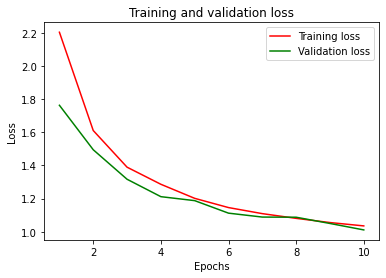

In [ ]:
# Visualise loss
loss = base_model_history.history['loss']
val_loss = base_model_history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, color='red', label='Training loss')
plt.plot(epochs, val_loss, color='green', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

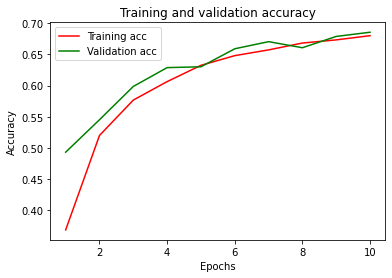

In [ ]:
acc = base_model_history.history['accuracy']
val_acc = base_model_history.history['val_accuracy']
plt.plot(epochs, acc, color='red', label='Training acc')
plt.plot(epochs, val_acc, color='green', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

## **Evaluate Model and Predict Using Test Data**

### **Evaluate Model Using Test Data**

In [ ]:
base_model.evaluate(test_dataflow,
steps=test_stepsize,
verbose=1
)

10547/10547 [==============================] - 39s 4ms/step - loss: 0.9137 - accuracy: 0.7293


[0.9136897325515747, 0.7293069362640381]

## **Save Model**

In [ ]:
# Optional step to save model locally
if not os.path.exists('/content/saved_model'):
    os.makedirs('/content/saved_model')

base_model.save('/content/saved_model/base_model.h5') 

# **Part 2: Transfer Learning Model**

## **Transfer Learning: DenseNet201**

### **Define Data Flows**

In [ ]:
# Create save directory
if not os.path.exists('/content/saved_data/combined'):
    os.makedirs('/content/saved_data/combined')


# Set batch size variable for training and validation batches
batch_size_comb = 25

# Define training flow
train_dataflow_comb = train_datagen_base.flow_from_directory(
    directory=train_dir,
    subset='training',
    target_size=(100,100),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=batch_size_base,
    )

# Define validation flow
val_dataflow_comb = train_datagen_base.flow_from_directory(
    directory=train_dir,
    subset='validation',
    target_size=(100,100),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=batch_size_base,
    )

# Define test flow
test_dataflow_comb = test_datagen_base.flow_from_directory(
    directory=test_dir,
    target_size=(100,100),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=1,
    shuffle=True,
)

Found 27000 images belonging to 44 classes.
Found 2976 images belonging to 44 classes.
Found 10547 images belonging to 44 classes.


#### **Define Step Sizes**

In [ ]:
train_stepsize_comb = train_dataflow_comb.n // train_dataflow_comb.batch_size
val_stepsize_comb = val_dataflow_comb.n // val_dataflow_comb.batch_size
test_stepsize_comb = test_dataflow_comb.n // test_dataflow_comb.batch_size

### **Define Imported Model**

In [ ]:
# Import Pre-Trained Model
from tensorflow.keras.applications import DenseNet201

# Define Model Processing Parameters
input_shape = (100, 100, 3)
num_classes=44
DN201_model = DenseNet201(input_shape=input_shape, weights='imagenet', include_top=False, classes=num_classes)

# Freeze weights
DN201_model.trainable =  False

# Summarise Model
DN201_model.summary()

### **Define Combined Model**

In [ ]:
# Add layers to Sequential model

from tensorflow.keras.layers import Flatten, Dense

combined_model = tf.keras.Sequential([
    DN201_model,
    Flatten(),
    Dense(44, activation='softmax')
])

# The below line freese the dense layer
# combined_model.layers[2].trainable = False

### **Compile Combined Model**

In [ ]:
# Define optimiser
optimizer = tf.keras.optimizers.Adam(0.0001)

# Define Loss Function 
loss = tf.keras.losses.CategoricalCrossentropy()

# Compile Model
combined_model.compile(loss=loss, optimizer=optimizer, metrics=['accuracy'])

# Model Summary
combined_model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
densenet201 (Model)          (None, 3, 3, 1920)        18321984  
_________________________________________________________________
flatten_6 (Flatten)          (None, 17280)             0         
_________________________________________________________________
dense_6 (Dense)              (None, 44)                760364    
Total params: 19,082,348
Trainable params: 760,364
Non-trainable params: 18,321,984
_________________________________________________________________


### **Fit Initial Pre-Trained Model**

In [ ]:
# Train the model using fit method
combined_model_history = combined_model.fit(train_dataflow_comb
                    ,steps_per_epoch= train_stepsize_base
                    ,validation_data=val_dataflow_comb
                    ,validation_steps=val_stepsize_base
                    ,epochs=10
                   )

Epoch 1/10
1080/1080 [==============================] - 105s 97ms/step - loss: 1.0262 - accuracy: 0.6993 - val_loss: 0.7417 - val_accuracy: 0.7539
Epoch 2/10
1080/1080 [==============================] - 101s 93ms/step - loss: 0.6320 - accuracy: 0.7968 - val_loss: 0.6434 - val_accuracy: 0.7886
Epoch 3/10
1080/1080 [==============================] - 101s 93ms/step - loss: 0.5577 - accuracy: 0.8180 - val_loss: 0.6348 - val_accuracy: 0.8027
Epoch 4/10
1080/1080 [==============================] - 101s 93ms/step - loss: 0.5143 - accuracy: 0.8296 - val_loss: 0.6481 - val_accuracy: 0.8084
Epoch 5/10
1080/1080 [==============================] - 101s 93ms/step - loss: 0.4870 - accuracy: 0.8365 - val_loss: 0.6244 - val_accuracy: 0.8007
Epoch 6/10
1080/1080 [==============================] - 101s 93ms/step - loss: 0.4702 - accuracy: 0.8419 - val_loss: 0.5989 - val_accuracy: 0.8134
Epoch 7/10
1080/1080 [==============================] - 101s 93ms/step - loss: 0.4595 - accuracy: 0.8447 - val_loss: 0

### **Visualize Model Performance Metrics**

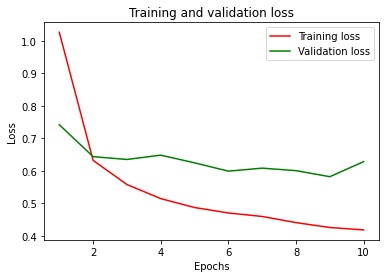

In [ ]:
# Visualise loss
loss = combined_model_history.history['loss']
val_loss = combined_model_history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, color='red', label='Training loss')
plt.plot(epochs, val_loss, color='green', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

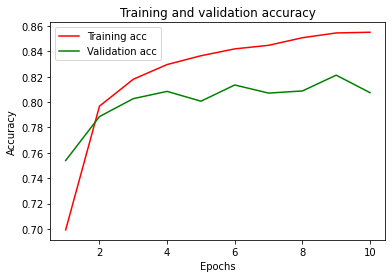

In [ ]:
acc = combined_model_history.history['accuracy']
val_acc = combined_model_history.history['val_accuracy']
plt.plot(epochs, acc, color='red', label='Training acc')
plt.plot(epochs, val_acc, color='green', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

### **Evaluate Pre-Trained Model**

In [ ]:
combined_model.evaluate(test_dataflow_comb,
steps=test_stepsize_base,
verbose=1
)

10547/10547 [==============================] - 327s 31ms/step - loss: 0.5282 - accuracy: 0.8334


[0.5282048583030701, 0.8334123492240906]

# **Part 3: Enhancement and Optimisation: Model Groups**

## **Define Data Sources**

###**Create Directory Variables**

In [ ]:
train_dir = '/content/kaggle/trn/trn'
test_dir = '/content/kaggle/tst/tst'

### **Define Data Generator**

In [ ]:
# Make train generator
train_datagen = ImageDataGenerator(
        rescale = 1./255,
        width_shift_range=0.05,
        height_shift_range=0.05, 
        shear_range=0.05, 
        zoom_range=0.05, 
        fill_mode='reflect',
        validation_split=0.1
        )

# Make test generator
test_datagen = ImageDataGenerator(rescale=1./255)

### **Define Data Flows**

In [ ]:
# Set batch size variable for training and validation batches
batch_size=25

# Define training flow
train_dataflow = train_datagen.flow_from_directory(
    directory=train_dir,
    subset='training',
    target_size=(100,100),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=batch_size,
    )

# Define validation flow
val_dataflow = train_datagen.flow_from_directory(
    directory=train_dir,
    subset='validation',
    target_size=(100,100),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=batch_size,
    )

# Define test flow
test_dataflow = test_datagen.flow_from_directory(
    directory=test_dir,
    target_size=(100,100),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=1,
    shuffle=False,
)

Found 27000 images belonging to 44 classes.
Found 2976 images belonging to 44 classes.
Found 10547 images belonging to 44 classes.


#### **Define Step Sizes**

In [ ]:
train_stepsize = train_dataflow.n // train_dataflow.batch_size
val_stepsize = val_dataflow.n // val_dataflow.batch_size
test_stepsize = test_dataflow.n // test_dataflow.batch_size

## **Transfer Learning: Enhanced DenseNet201 Model**

###**Import Pre-trained Model**

In [ ]:
# Import Pre-Trained Model
from tensorflow.keras.applications import DenseNet201

# Define Model Processing Parameters
input_shape = (100, 100, 3)
num_classes=44
DN201_model = DenseNet201(input_shape=input_shape, weights='imagenet', include_top=False, classes=num_classes)

# Summarise Model
DN201_model.summary()

74842112/74836368 [==============================] - 2s 0us/step
Model: "densenet201"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_8 (InputLayer)            [(None, 100, 100, 3) 0                                            
__________________________________________________________________________________________________
zero_padding2d_14 (ZeroPadding2 (None, 106, 106, 3)  0           input_8[0][0]                    
__________________________________________________________________________________________________
conv1/conv (Conv2D)             (None, 50, 50, 64)   9408        zero_padding2d_14[0][0]          
__________________________________________________________________________________________________
conv1/bn (BatchNormalization)   (None, 50, 50, 64)   256         conv1/conv[0][0]                 
_______________________

### **Add Layers to Combined Model**

In [ ]:
 # Add layers to Sequential model

from tensorflow.keras.layers import Flatten, Dense

enhanced_combined = tf.keras.Sequential([
    DN201_model,
    Flatten(),
    Dense(100, activation='relu'),
    Dense(44, activation='softmax')
])

### **Compile Combined Model**

In [ ]:
# Define optimiser
optimizer = tf.keras.optimizers.Adam(0.001)

# Define Loss Function 
loss = tf.keras.losses.CategoricalCrossentropy()

# Compile Model
enhanced_combined.compile(loss=loss, optimizer=optimizer, metrics=['accuracy'])

# Model Summary
enhanced_combined.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
densenet201 (Model)          (None, 3, 3, 1920)        18321984  
_________________________________________________________________
flatten_8 (Flatten)          (None, 17280)             0         
_________________________________________________________________
dense_9 (Dense)              (None, 100)               1728100   
_________________________________________________________________
dense_10 (Dense)             (None, 44)                4444      
Total params: 20,054,528
Trainable params: 19,825,472
Non-trainable params: 229,056
_________________________________________________________________


### **Fit Updated Pre-Trained Model**

In [ ]:
# Train the model using fit method
enhanced_combined = enhanced_combined.fit(train_dataflow
                    ,steps_per_epoch= train_stepsize
                    ,validation_data=val_dataflow
                    ,validation_steps=val_stepsize
                    ,epochs=10
                   )

Epoch 1/10
1019/1019 [==============================] - 142s 139ms/step - loss: 1.0157 - accuracy: 0.6983 - val_loss: 1.7388 - val_accuracy: 0.5171
Epoch 2/10
1019/1019 [==============================] - 138s 135ms/step - loss: 0.8988 - accuracy: 0.7094 - val_loss: 0.9983 - val_accuracy: 0.6851
Epoch 3/10
1019/1019 [==============================] - 137s 134ms/step - loss: 0.8502 - accuracy: 0.7219 - val_loss: 1.4130 - val_accuracy: 0.5848
Epoch 4/10
1019/1019 [==============================] - 138s 135ms/step - loss: 0.7963 - accuracy: 0.7469 - val_loss: 0.7864 - val_accuracy: 0.7524
Epoch 5/10
1019/1019 [==============================] - 138s 135ms/step - loss: 0.8039 - accuracy: 0.7359 - val_loss: 0.7492 - val_accuracy: 0.7613
Epoch 6/10
1019/1019 [==============================] - 137s 135ms/step - loss: 0.6684 - accuracy: 0.7754 - val_loss: 0.6631 - val_accuracy: 0.7848
Epoch 7/10
1019/1019 [==============================] - 137s 135ms/step - loss: 0.6953 - accuracy: 0.7784 - val_

### **Visualize Model Performance Metrics**

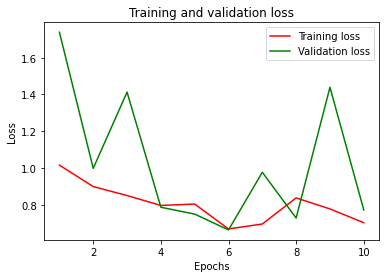

In [ ]:
# Visualise loss
loss = enhanced_combined.history['loss']
val_loss = enhanced_combined.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, color='red', label='Training loss')
plt.plot(epochs, val_loss, color='green', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

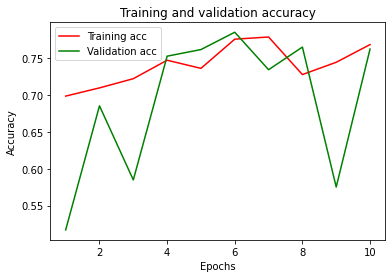

In [ ]:
acc = enhanced_combined.history['accuracy']
val_acc = enhanced_combined.history['val_accuracy']
plt.plot(epochs, acc, color='red', label='Training acc')
plt.plot(epochs, val_acc, color='green', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

## **Enhanced DenseNet201: Selected Unfrozen Layers**

### **Unfreeze Model Weights**

In [ ]:
# Reset Model Weights
DN201_model.trainable =  True

# Create frozen layers variable
frozen_layers = -50

# Set frozen layers as non-trainable
for layer in DN201_model.layers[:frozen_layers]:
    layer.trainable = False

# Check the trainable status of the individual layers
for layer in DN201_model.layers:
    print(layer, layer.trainable)

<tensorflow.python.keras.engine.input_layer.InputLayer object at 0x7f46ba5bbba8> False
<tensorflow.python.keras.layers.convolutional.ZeroPadding2D object at 0x7f46ba5bb588> False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f46a270cf60> False
<tensorflow.python.keras.layers.normalization_v2.BatchNormalization object at 0x7f46ba5bb940> False
<tensorflow.python.keras.layers.core.Activation object at 0x7f46ba5b11d0> False
<tensorflow.python.keras.layers.convolutional.ZeroPadding2D object at 0x7f46ba5b1358> False
<tensorflow.python.keras.layers.pooling.MaxPooling2D object at 0x7f46ba5b1a20> False
<tensorflow.python.keras.layers.normalization_v2.BatchNormalization object at 0x7f46a276c358> False
<tensorflow.python.keras.layers.core.Activation object at 0x7f47000f4fd0> False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f47000f4908> False
<tensorflow.python.keras.layers.normalization_v2.BatchNormalization object at 0x7f470041d0b8> False
<tensorflow.py

### **Add Layers to Combined Model**

In [ ]:
 # Add layers to Sequential model

from tensorflow.keras.layers import Flatten, Dense

enhanced_combined_frozen = tf.keras.Sequential([
    DN201_model,
    Flatten(),
    # Dense(44, activation='relu'),
    Dense(44, activation='softmax')
])

### **Compile Combined Model**

In [ ]:
# Define optimiser
optimizer = tf.keras.optimizers.Adam(0.001)

# Define Loss Function 
loss = tf.keras.losses.CategoricalCrossentropy()

# Compile Model
enhanced_combined_frozen.compile(loss=loss, optimizer=optimizer, metrics=['accuracy'])

# Model Summary
enhanced_combined_frozen.summary()

### **Fit Pre-Trained Model With Selected Frozen Weights**

In [ ]:
# Train the model using fit method
enhanced_combined_frozen = enhanced_combined_frozen.fit(train_dataflow
                    ,steps_per_epoch= train_stepsize
                    ,validation_data=val_dataflow
                    ,validation_steps=val_stepsize
                    ,epochs=10
                   )

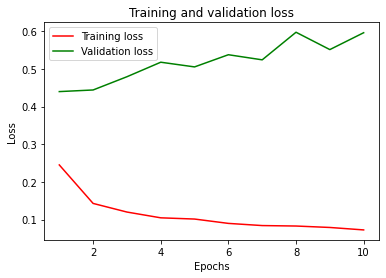

In [ ]:
# Visualise loss
loss = enhanced_combined_frozen.history['loss']
val_loss = enhanced_combined_frozen.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, color='red', label='Training loss')
plt.plot(epochs, val_loss, color='green', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

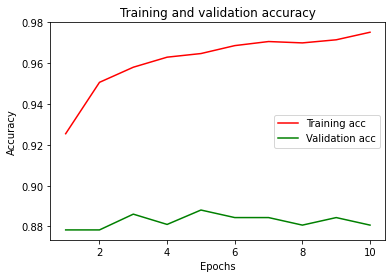

In [ ]:
acc = enhanced_combined_frozen.history['accuracy']
val_acc = enhanced_combined_frozen.history['val_accuracy']
plt.plot(epochs, acc, color='red', label='Training acc')
plt.plot(epochs, val_acc, color='green', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

### **Update Architecture: Increase Dense layer to 500 - Define and Compile**

In [ ]:
enhanced_combined_tuned = tf.keras.Sequential([
    DN201_model,
    Flatten(),
    Dense(500, activation='relu'),
    Dense(44, activation='softmax')
])    

# Define optimiser
optimizer = tf.keras.optimizers.Adam(0.001)

# Define Loss Function 
loss = tf.keras.losses.CategoricalCrossentropy()

# Compile Model
enhanced_combined_tuned.compile(loss=loss, optimizer=optimizer, metrics=['accuracy'])

# Model Summary
enhanced_combined_tuned.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
densenet201 (Model)          (None, 3, 3, 1920)        18321984  
_________________________________________________________________
flatten_11 (Flatten)         (None, 17280)             0         
_________________________________________________________________
dense_20 (Dense)             (None, 500)               8640500   
_________________________________________________________________
dense_21 (Dense)             (None, 44)                22044     
Total params: 26,984,528
Trainable params: 10,553,552
Non-trainable params: 16,430,976
_________________________________________________________________


### **Fit Pre-Trained Selected Frozen Weights and Dense 500**

In [ ]:
# Train the model using fit method
enhanced_combined_tuned_history = enhanced_combined_tuned.fit(train_dataflow
                    ,steps_per_epoch= train_stepsize
                    ,validation_data=val_dataflow
                    ,validation_steps=val_stepsize
                    ,epochs=10
                   )

Epoch 1/10
1080/1080 [==============================] - 94s 87ms/step - loss: 0.3615 - accuracy: 0.8876 - val_loss: 0.5223 - val_accuracy: 0.8582
Epoch 2/10
1080/1080 [==============================] - 90s 83ms/step - loss: 0.1992 - accuracy: 0.9326 - val_loss: 0.6356 - val_accuracy: 0.8474
Epoch 3/10
1080/1080 [==============================] - 90s 83ms/step - loss: 0.1643 - accuracy: 0.9421 - val_loss: 0.6612 - val_accuracy: 0.8615
Epoch 4/10
1080/1080 [==============================] - 90s 83ms/step - loss: 0.1529 - accuracy: 0.9458 - val_loss: 0.6561 - val_accuracy: 0.8649
Epoch 5/10
1080/1080 [==============================] - 90s 83ms/step - loss: 0.1431 - accuracy: 0.9509 - val_loss: 0.6772 - val_accuracy: 0.8504
Epoch 6/10
1080/1080 [==============================] - 89s 83ms/step - loss: 0.1215 - accuracy: 0.9564 - val_loss: 0.7087 - val_accuracy: 0.8568
Epoch 7/10
1080/1080 [==============================] - 89s 83ms/step - loss: 0.1176 - accuracy: 0.9602 - val_loss: 0.7446 -

### **Evaluate Model**

In [ ]:
enhanced_combined_tuned.evaluate(test_dataflow,
steps=test_stepsize,
verbose=1
)

10547/10547 [==============================] - 303s 29ms/step - loss: 0.6970 - accuracy: 0.8749


[0.6970081925392151, 0.8749407529830933]

### **Save Model**

In [ ]:
# Optional step to save model locally
if not os.path.exists('/content/saved_model'):
    os.makedirs('/content/saved_model')

enhanced_combined_tuned.save('/content/saved_model/enhanced_combined_tunedenhanced_model.h5') 

## **Model Group 3: Enhanced Architecture**

### **Define Model**

#### **Define Model Architecture**

##### **Import TF/Keras Layer Classes**

In [ ]:
from tensorflow.keras.layers import InputLayer, ZeroPadding2D, Conv2D, MaxPool2D, Flatten, Dense

##### **Define Layers**

In [ ]:
input1 = InputLayer(input_shape=(100, 100, 3))

# Convolutional layers with the right number of kernels, size of kernel and padding
conv_layer0 = Conv2D(64,  (3,3), padding='same')
conv_layer1 = Conv2D(128, (3,3), padding='same', activation='relu')
conv_layer2 = Conv2D(256, (3,3), padding='same', activation='relu')
conv_layer3 = Conv2D(512, (3,3), padding='same')
conv_layer4 = Conv2D(64,  (3,3), padding='same', activation='relu')
conv_layer5 = Conv2D(64,  (5,5), padding='same')
conv_layer6 = Conv2D(128, (5,5), padding='same', activation='relu')
conv_layer7 = Conv2D(256, (5,5), padding='same')
conv_layer8 = Conv2D(512, (7,7), padding='same', activation='relu')

# Zero Padding layers
zero_padding1 = ZeroPadding2D(padding=6)
zero_padding2 = ZeroPadding2D(padding=6)

# Max pooling layers
max_pool1 = MaxPool2D(pool_size=(2,2),padding='same')
max_pool2 = MaxPool2D(pool_size=(2,2),padding='same')
max_pool3 = MaxPool2D(pool_size=(2,2),padding='same')
max_pool4 = MaxPool2D(pool_size=(2,2),padding='same')
max_pool5 = MaxPool2D(pool_size=(2,2),padding='same')

# Flatten Layers
flatten1 = Flatten()

# Fully Connected Layers
fc_layer1 = Dense(500, activation='relu')
fc_layer2 = Dense(44, activation='softmax')

##### **Assemble Model**

In [ ]:
enhanced_model = tf.keras.Sequential([
input1,
# Block 1
zero_padding1,  # Adding zeroes
conv_layer0,    # No Activation
conv_layer1,    # Relu activated
zero_padding2,  # Adding zeroes
max_pool1,      # MaxPool

# Block 2
conv_layer2,    # Relu activated
conv_layer3,    # No Activation
conv_layer4,    # Relu activated
max_pool2,      # MaxPool

# Block 3
conv_layer5,    # No Activation
conv_layer6,    # Relu activated
max_pool3,      # MaxPool

# Block 4
conv_layer7,    # No Activation
conv_layer8,    # Relu activated
max_pool4,      # MaxPool

# Flatten 
flatten1,       # Flatten layer

# Fully Connected
fc_layer1,       # Fully-connected - Relu activated
fc_layer2       # Fully-connected - SoftMax activated
])

#### **Compile Model**

In [ ]:
# Define optimiser
optimizer = tf.keras.optimizers.Adam(0.000066)

# Define Loss Function 
loss = tf.keras.losses.CategoricalCrossentropy()

# Use compile method to state loss function, optimised and model performance metric
enhanced_model.compile(loss=loss, optimizer=optimizer, metrics=['accuracy'])

# Model Summary
enhanced_model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
zero_padding2d_12 (ZeroPaddi (None, 112, 112, 3)       0         
_________________________________________________________________
conv2d_54 (Conv2D)           (None, 112, 112, 64)      1792      
_________________________________________________________________
conv2d_55 (Conv2D)           (None, 112, 112, 128)     73856     
_________________________________________________________________
zero_padding2d_13 (ZeroPaddi (None, 124, 124, 128)     0         
_________________________________________________________________
max_pooling2d_30 (MaxPooling (None, 62, 62, 128)       0         
_________________________________________________________________
conv2d_56 (Conv2D)           (None, 62, 62, 256)       295168    
_________________________________________________________________
conv2d_57 (Conv2D)           (None, 62, 62, 512)      

### **Train Model**

In [ ]:
# Store weights for best performing epoch

# Create directory
if not os.path.exists('/content/training'):
    os.makedirs('/content/training')
    
# Define checkpoint file
checkpointer = tf.keras.callbacks.ModelCheckpoint(filepath='/content/training/best_weights.hdf5', 
                               monitor = 'val_accuracy',
                               verbose=1, 
                               save_best_only=True)

# Train the model using fit method
enhanced_model_history = enhanced_model.fit(train_dataflow
                        ,steps_per_epoch= train_stepsize
                        ,callbacks=[checkpointer]
                        ,validation_data=val_dataflow
                        ,validation_steps=val_stepsize
                        ,epochs=10
                        )

Epoch 1/10
1080/1080 [==============================] - ETA: 0s - loss: 2.2809 - accuracy: 0.5161
Epoch 00001: val_accuracy improved from -inf to 0.67866, saving model to /content/training/best_weights.hdf5
1080/1080 [==============================] - 129s 119ms/step - loss: 2.2809 - accuracy: 0.5161 - val_loss: 1.6810 - val_accuracy: 0.6787
Epoch 2/10
1080/1080 [==============================] - ETA: 0s - loss: 1.4447 - accuracy: 0.7358
Epoch 00002: val_accuracy improved from 0.67866 to 0.77311, saving model to /content/training/best_weights.hdf5
1080/1080 [==============================] - 128s 119ms/step - loss: 1.4447 - accuracy: 0.7358 - val_loss: 1.3144 - val_accuracy: 0.7731
Epoch 3/10
1080/1080 [==============================] - ETA: 0s - loss: 1.1869 - accuracy: 0.7936
Epoch 00003: val_accuracy improved from 0.77311 to 0.79025, saving model to /content/training/best_weights.hdf5
1080/1080 [==============================] - 128s 119ms/step - loss: 1.1869 - accuracy: 0.7936 - va

### **Visualise Model Training**

#### **Visualize Model Performance Metrics**

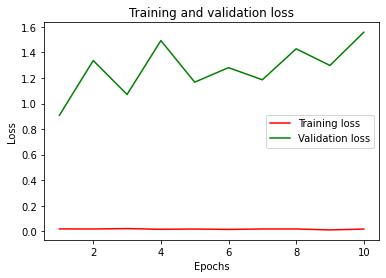

In [ ]:
# Visualise loss
loss = enhanced_model_history.history['loss']
val_loss = enhanced_model_history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, color='red', label='Training loss')
plt.plot(epochs, val_loss, color='green', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

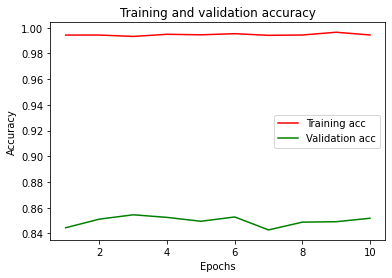

In [ ]:
acc = enhanced_model_history.history['accuracy']
val_acc = enhanced_model_history.history['val_accuracy']
plt.plot(epochs, acc, color='red', label='Training acc')
plt.plot(epochs, val_acc, color='green', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

### **Visualise Predictions and Intermediate Outputs**

##### **Save Model Objects**

In [ ]:
# Ensure model is loaded with the best weights
enhanced_model.load_weights('/content/training/best_weights.hdf5')

# Save final model for later use
enhanced_model.save('/content/training/enhanced_model_cnn.h5')

##### **Visualise Single Class Predictions**

This section allows the user to see class predictions for a single random image from the test set.

/content/kaggle/tst/tst/Apparel_Topwear_Tshirts/1164.jpg


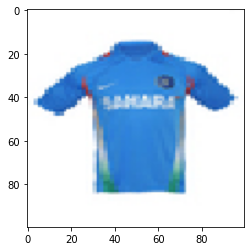

Predicted class is: [30] Apparel_Topwear_Tshirts


In [ ]:
# Define test_dataflow keys and values for reference
key_list = list(test_dataflow.class_indices.keys()) 
val_list = list(test_dataflow.class_indices.values()) 

# Select random unseen image from test set
rand_dir = random.choice(os.listdir('/content/kaggle/tst/tst/'))
rand_dir = "/content/kaggle/tst/tst/"+rand_dir+"/"
rand_image = random.choice(os.listdir(rand_dir))
# img_path = rand_dir+rand_image
img_path = '/content/kaggle/tst/tst/Apparel_Topwear_Tshirts/1164.jpg'
print(img_path)

img = tf.keras.preprocessing.image.load_img(img_path, target_size=(100,100))
img_tensor = tf.keras.preprocessing.image.img_to_array(img)
img_tensor = np.expand_dims(img_tensor, axis=0)
img_tensor /= 255.
plt.imshow(img_tensor[0])
plt.show()

# Predict Single Image
x = tf.keras.preprocessing.image.img_to_array(img)
x = np.expand_dims(x, axis=0)
images = np.vstack([x])
classes = np.argmax(enhanced_model.predict(images), axis=-1)
label = key_list[val_list.index(classes)]

print("Predicted class is:",classes,label)

##### **Visualise Layers of a Single Channel**

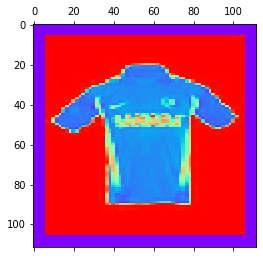

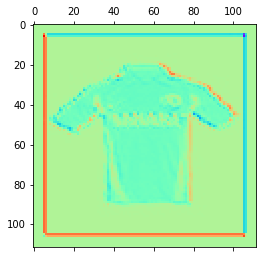

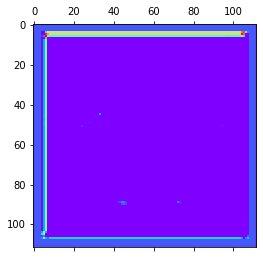

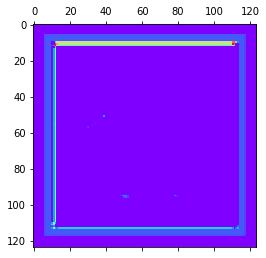

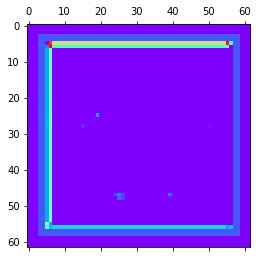

In [ ]:
# Extract layer outputs
layer_outputs = [layer.output for layer in enhanced_model.layers[:16]] 

# Define model to generate these outputs
activation_model = tf.keras.Model(inputs=enhanced_model.input, outputs=layer_outputs)

# Visualise the first 5 layers of the first channel

activations = activation_model.predict(img_tensor) 

first_layer_activation = activations[0]
second_layer_activation = activations[1]
third_layer_activation = activations[2]
fourth_layer_activation = activations[3]
fifth_layer_activation = activations[4]

plt.matshow(first_layer_activation[0, :, :, 0], cmap='rainbow')
plt.matshow(second_layer_activation[0, :, :, 0], cmap='rainbow')
plt.matshow(third_layer_activation[0, :, :, 0], cmap='rainbow')
plt.matshow(fourth_layer_activation[0, :, :, 0], cmap='rainbow')
plt.matshow(fifth_layer_activation[0, :, :, 0], cmap='rainbow')

##### **Visualise every channel  intermediate activation**

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:29: UserWarning: Attempting to set identical bottom == top == -0.5 results in singular transformations; automatically expanding.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in true_divide


MemoryError: ignored

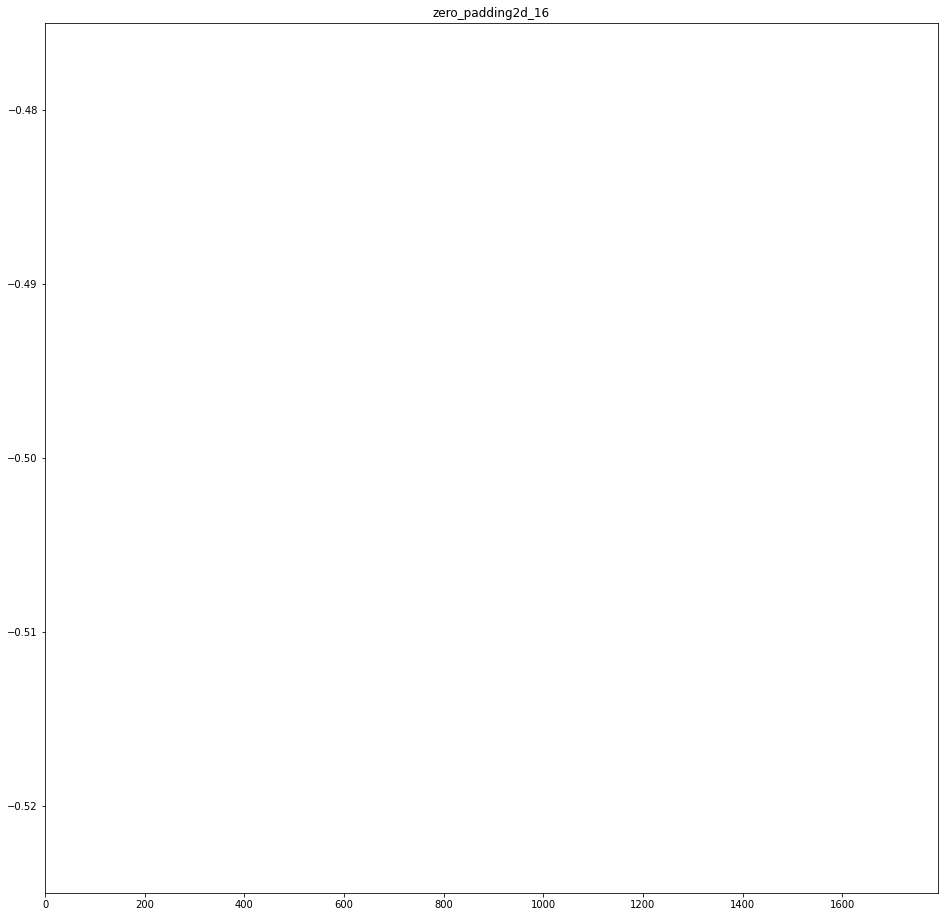

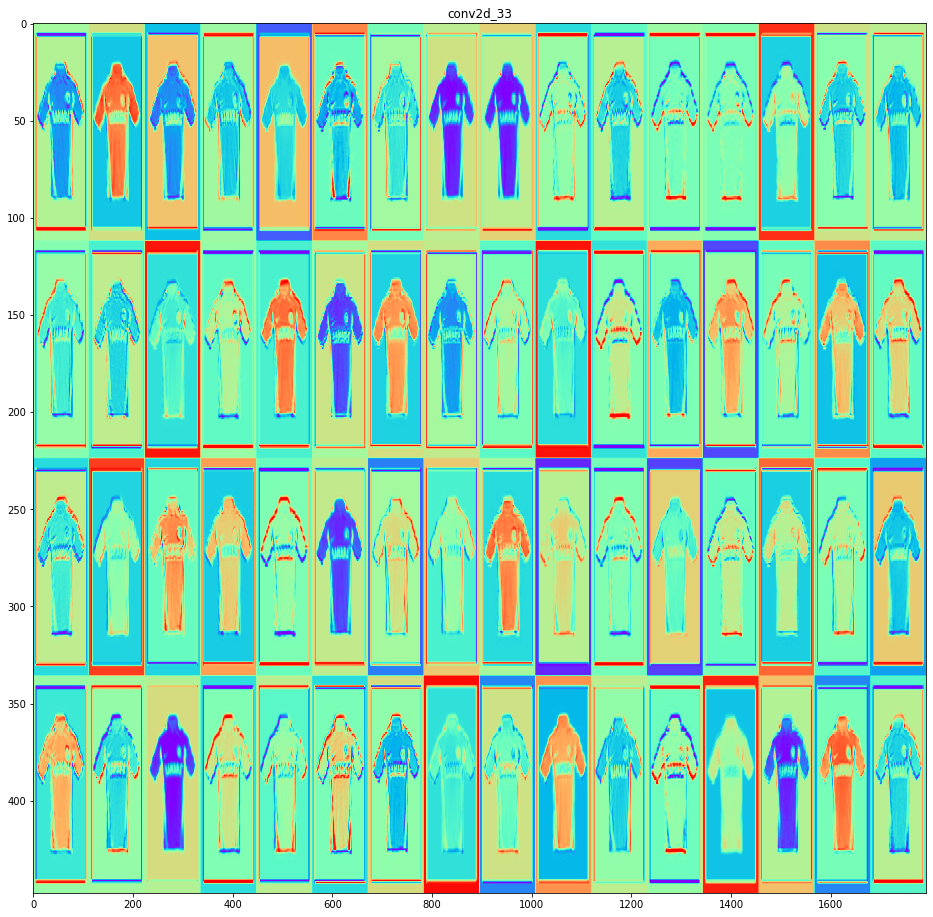

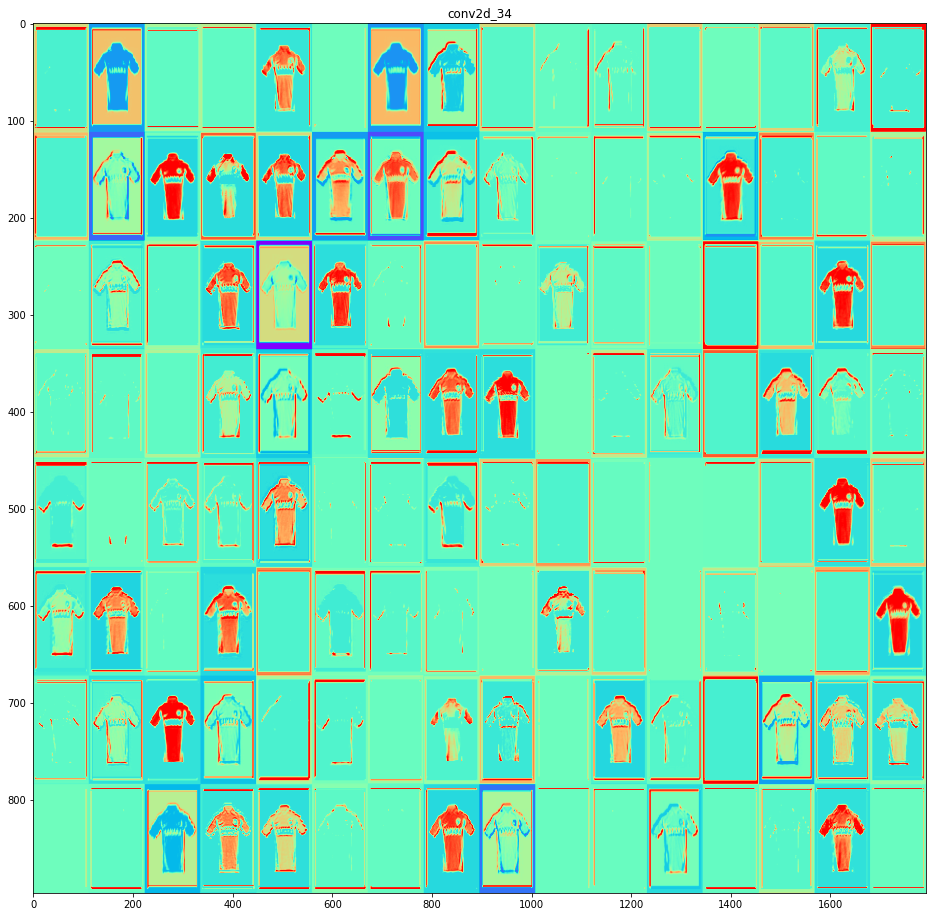

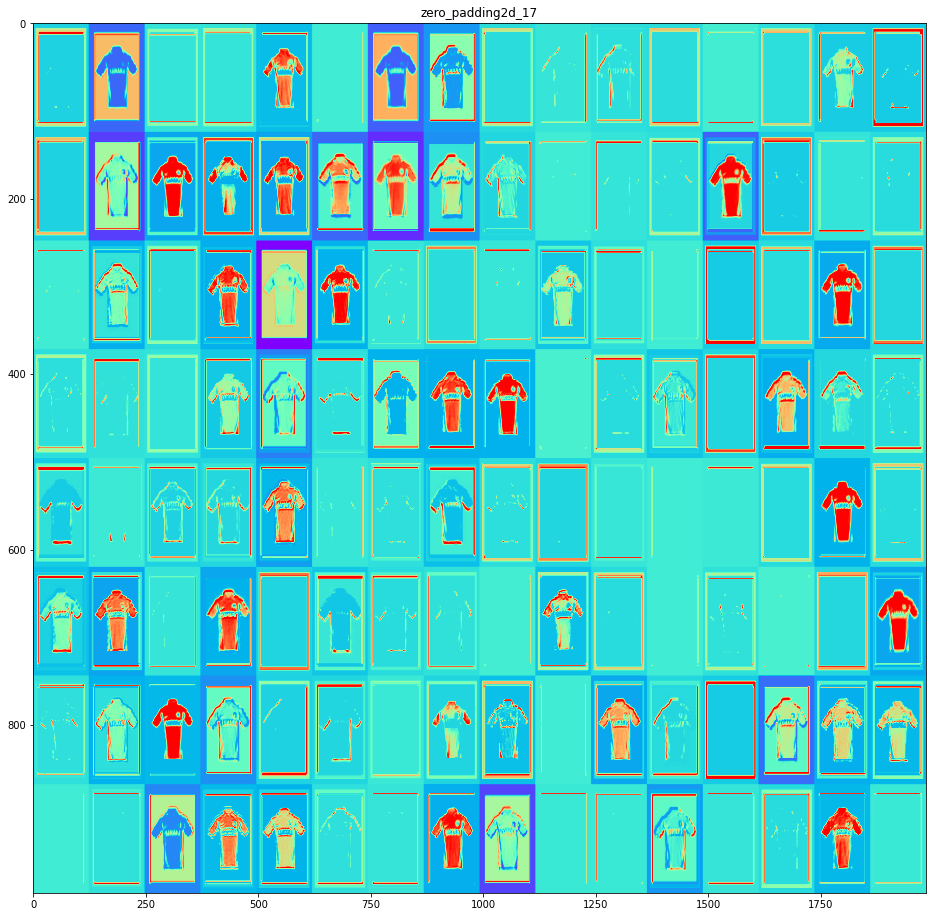

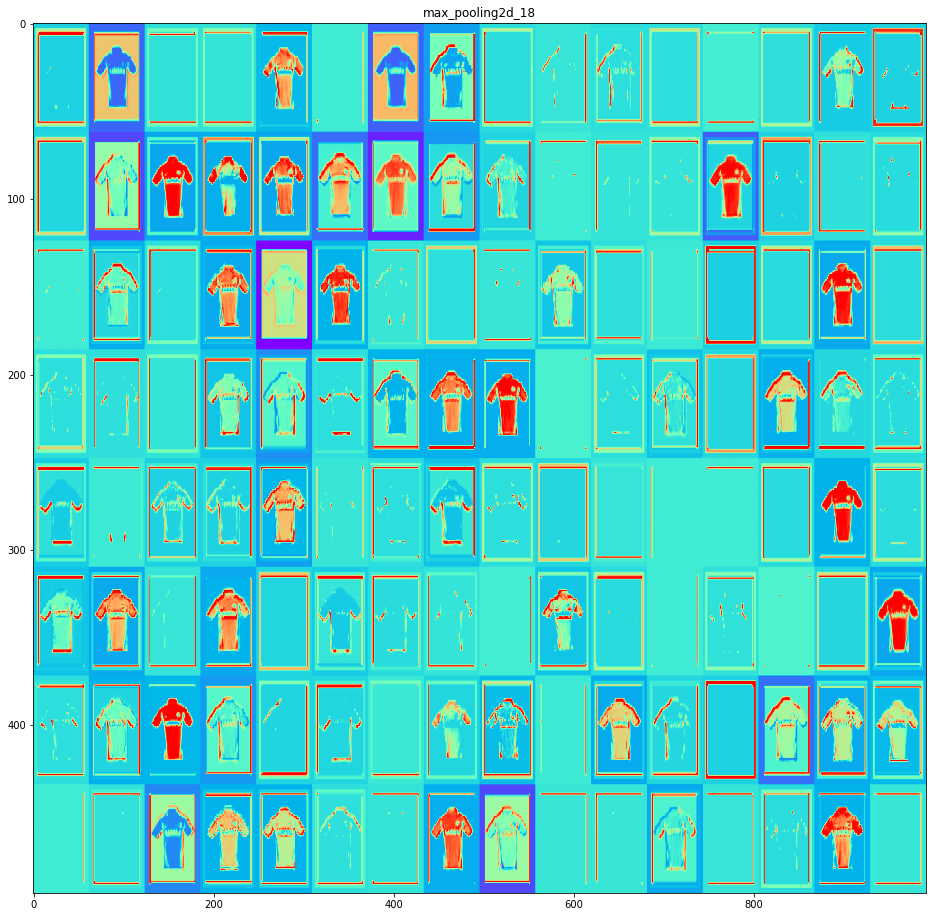

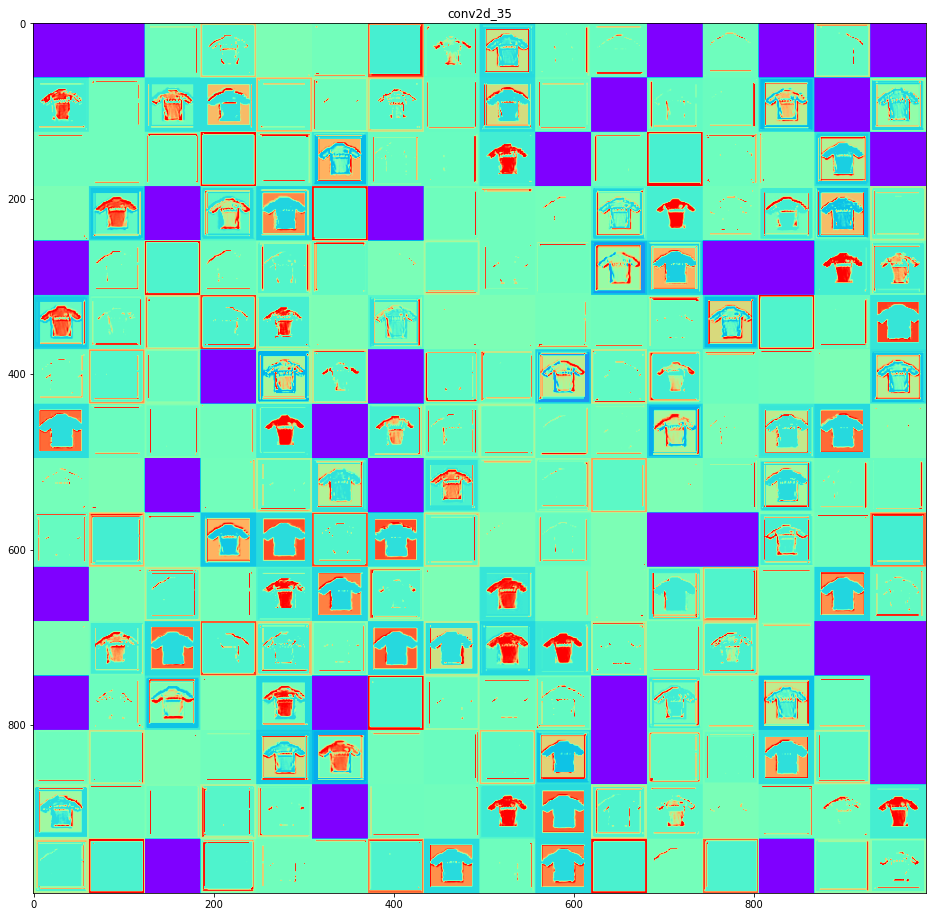

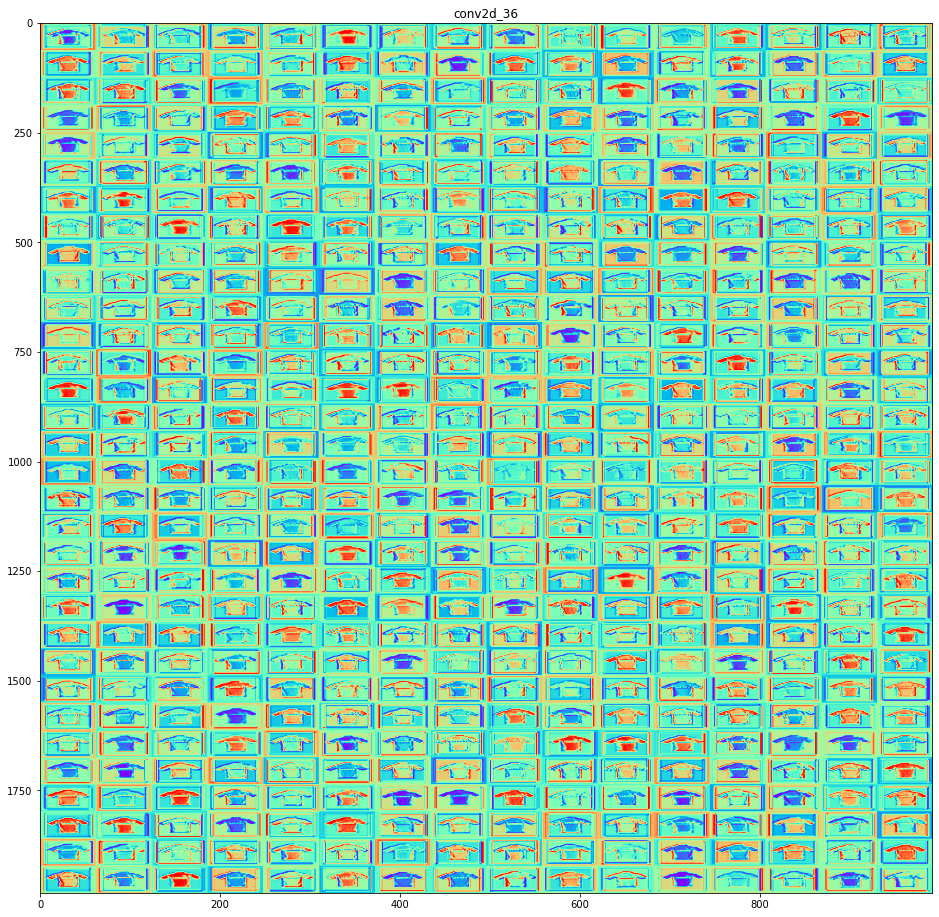

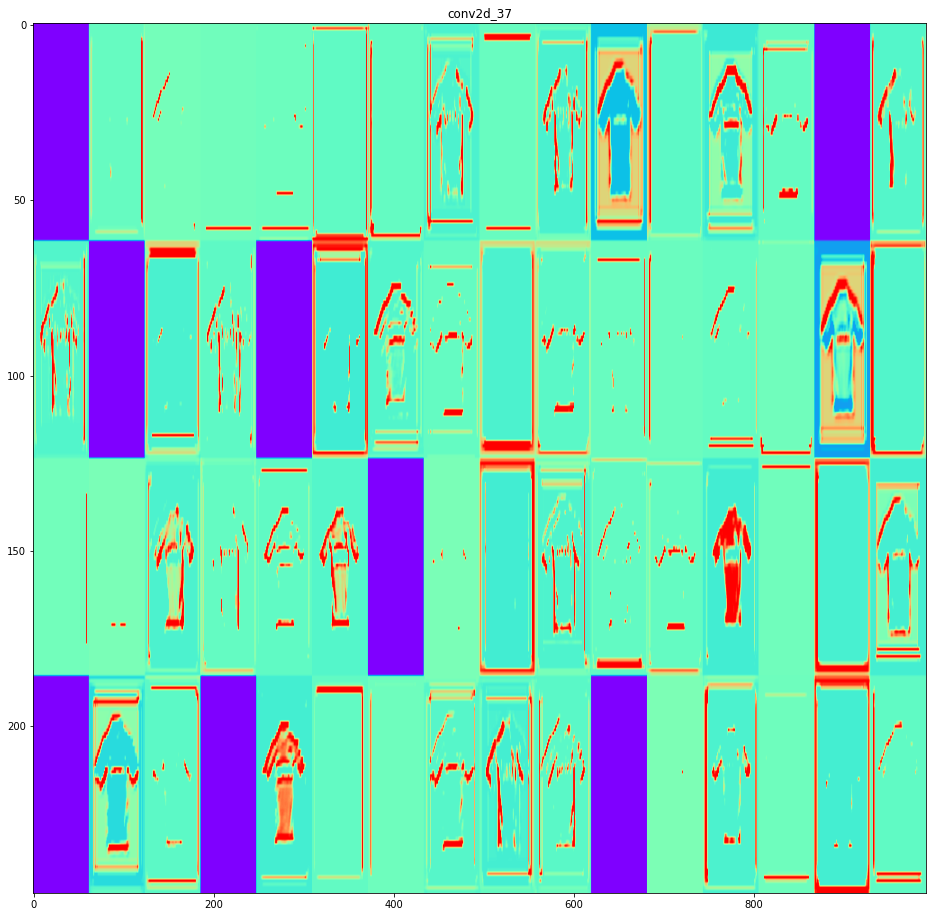

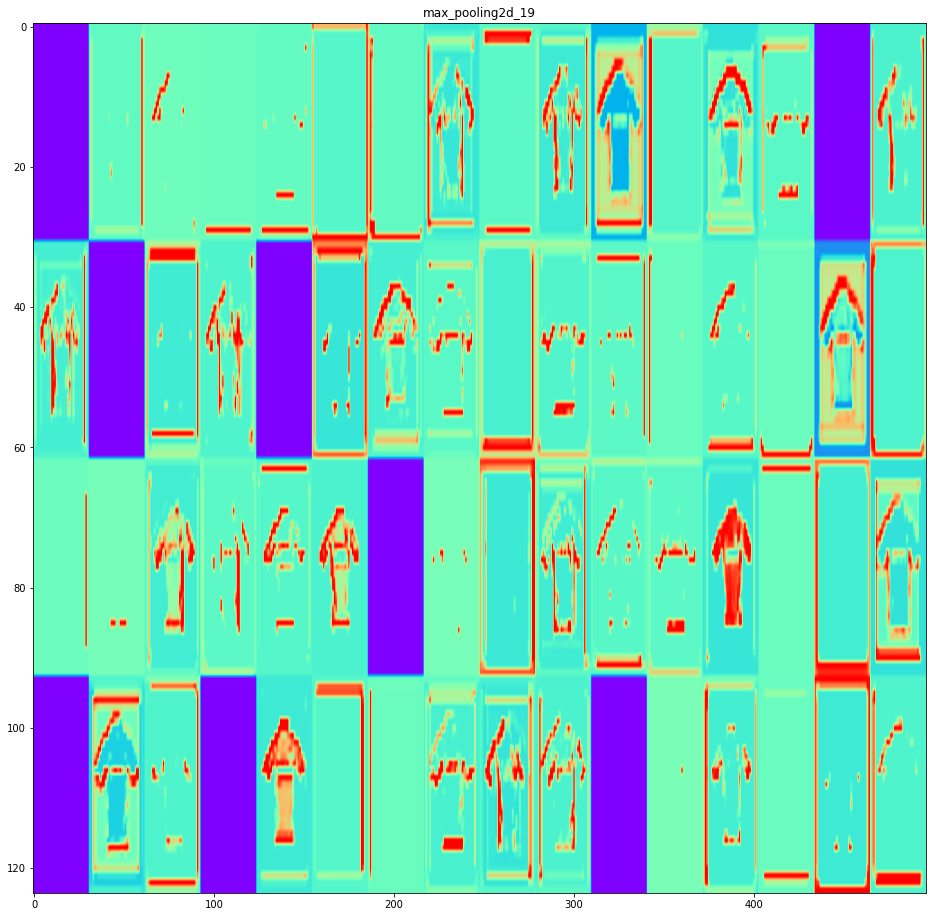

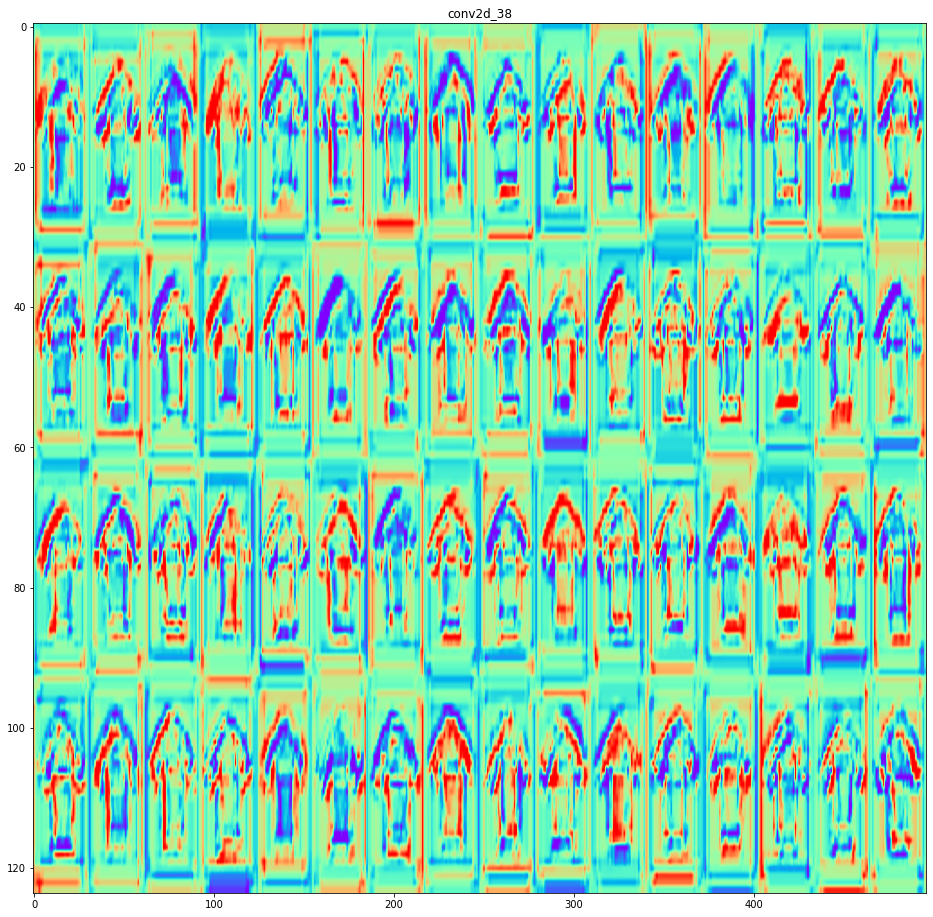

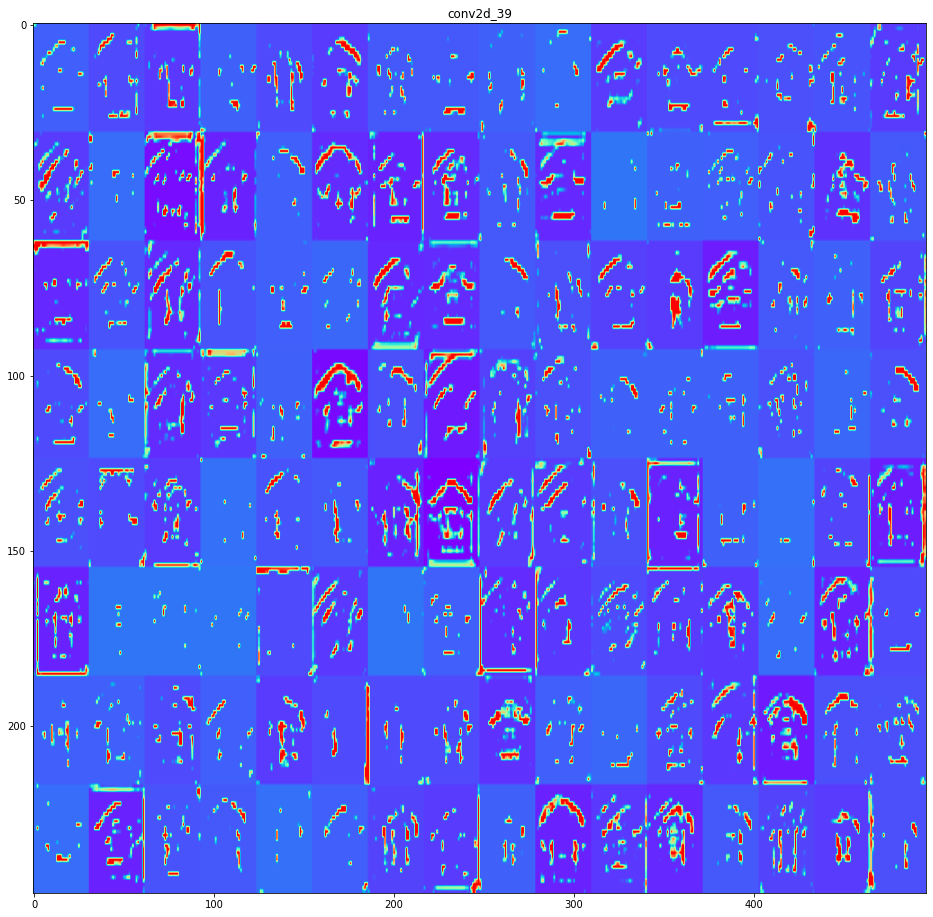

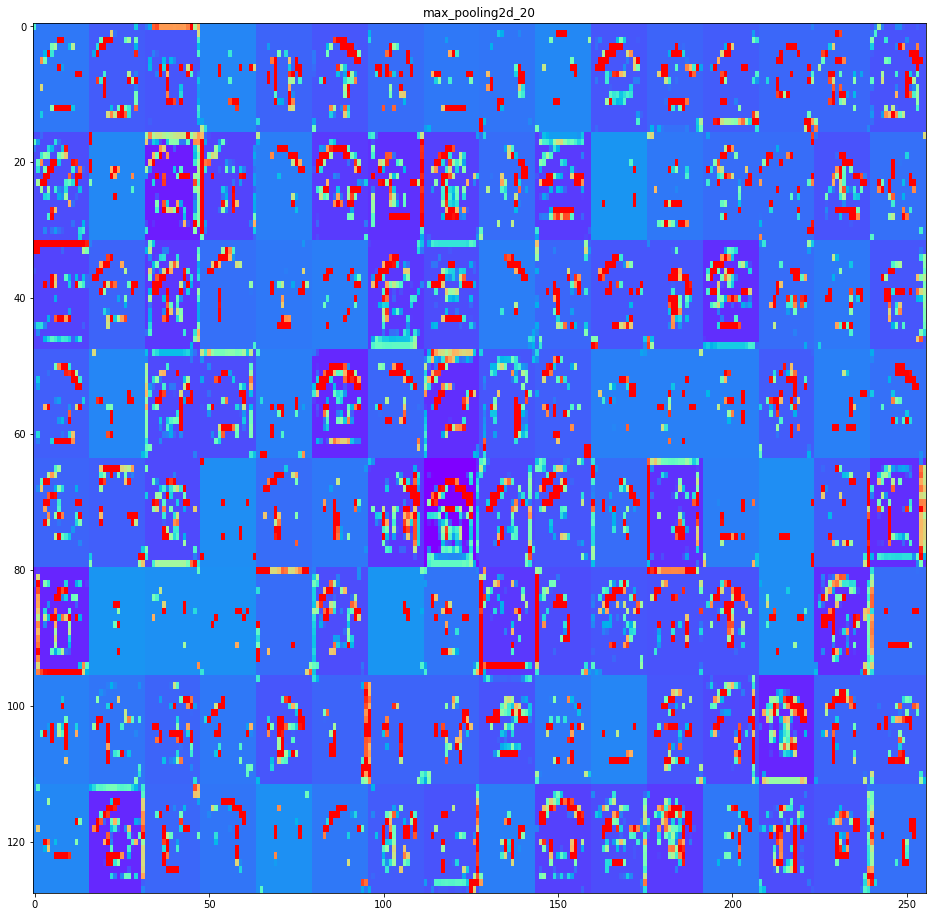

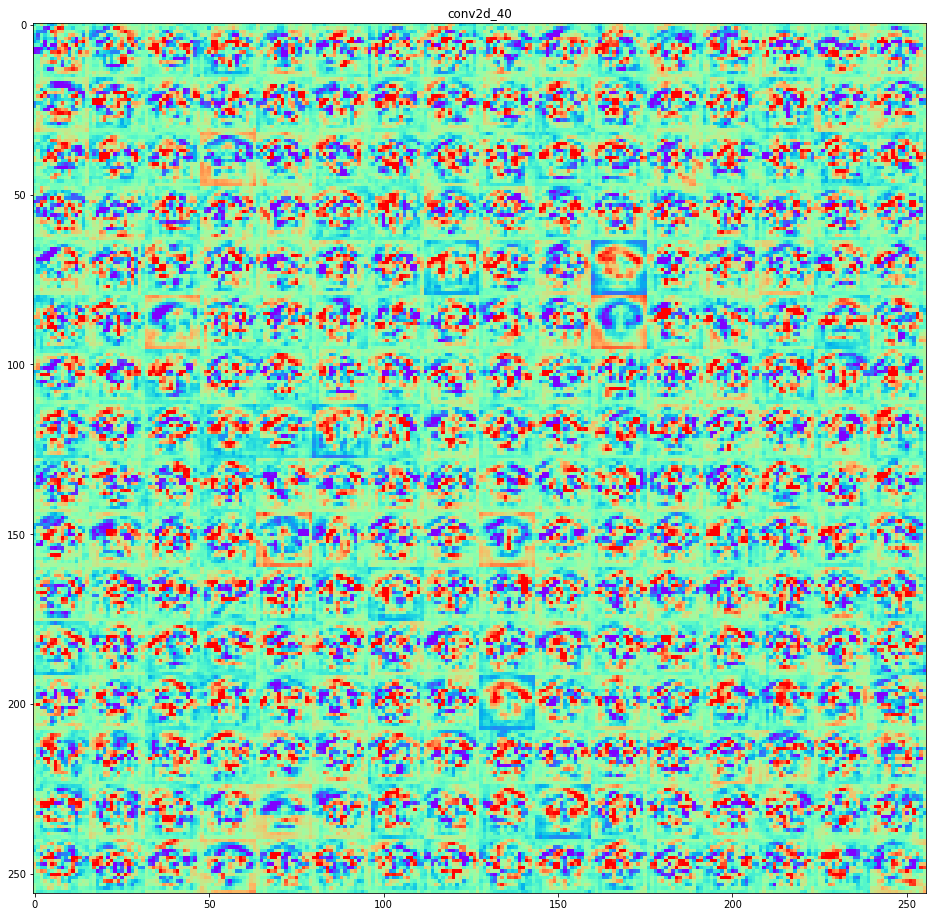

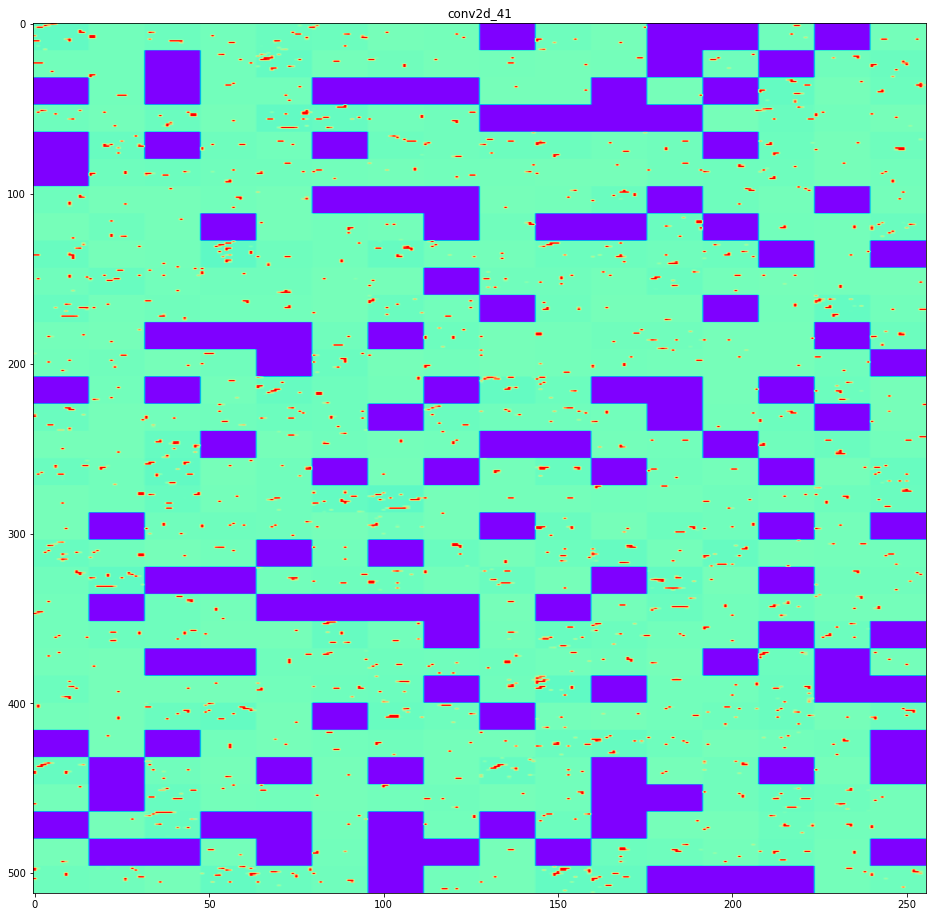

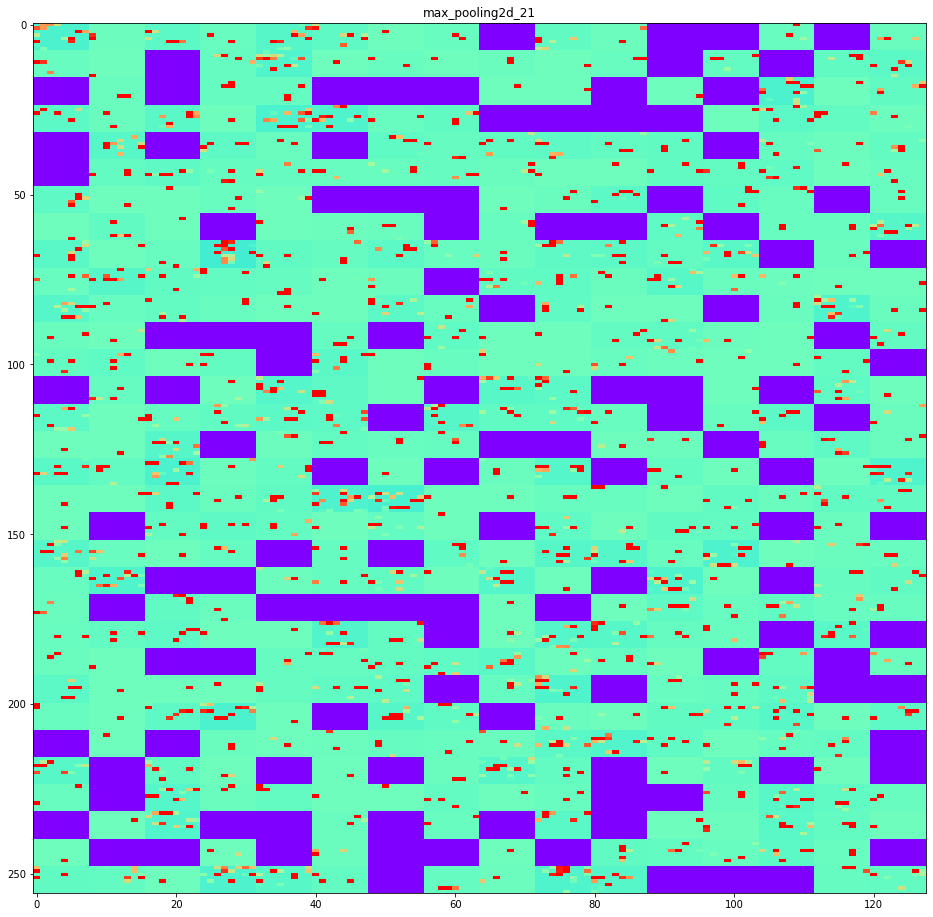

In [ ]:
layer_names = []
for layer in enhanced_model.layers[:16]:
    layer_names.append(layer.name) # Names of the layers, so you can have them as part of your plot
    
images_per_row = 16

for layer_name, layer_activation in zip(layer_names, activations):          # Displays the feature maps
    n_features = layer_activation.shape[-1]                                 # Number of features in the feature map
    size = layer_activation.shape[1]                                        #The feature map has shape (1, size, size, n_features).
    n_cols = n_features // images_per_row                                   # Tiles the activation channels in this matrix
    display_grid = np.zeros((size * n_cols, images_per_row * size))
    for col in range(n_cols): # Tiles each filter into a big horizontal grid
        for row in range(images_per_row):
            channel_image = layer_activation[0,
                                             :, :,
                                             col * images_per_row + row]
            channel_image -= channel_image.mean()                           # Post-processes the feature to make it visually palatable
            channel_image /= channel_image.std()
            channel_image *= 64
            channel_image += 128
            channel_image = np.clip(channel_image, 0, 255).astype('uint8')
            display_grid[col * size : (col + 1) * size,                     # Displays the grid
                         row * size : (row + 1) * size] = channel_image
    scale = 1. / size
    plt.figure(figsize=(scale * display_grid.shape[1],
                        scale * display_grid.shape[1]))
    plt.title(layer_name)
    plt.grid(False)
    fig = plt.imshow(display_grid, aspect='auto', cmap='rainbow')

### **Evaluate Model and Predict Using Test Data**

#### **Evaluate Model Using Test Data**

In [ ]:
enhanced_model.evaluate(test_dataflow,
steps=test_stepsize,
verbose=1
)

10547/10547 [==============================] - 75s 7ms/step - loss: 0.6812 - accuracy: 0.8795


[0.681185781955719, 0.8794918060302734]

### **Make and Save Predictions**

In [ ]:
# Create results directory
if not os.path.exists('/content/results'):
    os.makedirs('/content/results')

test_dataflow.reset()
pred=enhanced_model.predict(test_dataflow,
steps=test_stepsize,
verbose=1)

# Create prediction
predicted_class_indices = np.argmax(enhanced_model.predict(test_dataflow), axis=-1)

labels = (train_dataflow.class_indices)
labels = dict((v,k) for k,v in labels.items())
predictions = [labels[k] for k in predicted_class_indices]

filenames=test_dataflow.filenames
results=pd.DataFrame({"Filename":filenames,
                      "Predictions":predictions})
results.to_csv('/content/results/base_model_results.csv',index=False)

10547/10547 [==============================] - 59s 6ms/step


### **Save Model**

In [ ]:
# Optional step to save model locally
if not os.path.exists('/content/saved_model'):
    os.makedirs('/content/saved_model')

enhanced_model.save('/content/saved_model/enhanced_model.h5') 